<a href="https://colab.research.google.com/github/VuDucCong18/Work-Project/blob/main/IS460_Project_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context

Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes price of roughly 327 billion dollars and total costs with undiagnosed diabetes and prediabetes approaching $400 billion dollars annually.

# Diabete Prediction


The objective of the BRFSS is to collect uniform, state-specific data on preventive health practices and risk
behaviors that are linked to chronic diseases, injuries, and preventable infectious diseases in the adult population.
Factors assessed by the BRFSS include tobacco use, health care coverage, HIV/AIDS knowledge or prevention,
physical activity, and fruit and vegetable consumption. Data are collected from a random sample of adults (one per
household) through a telephone survey.

The Behavioral Risk Factor Surveillance System (BRFSS) is the nation's premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.


In [ ]:
#Allow Google Collaborate to access into my folder to retrieve the CVS file of Diabetes Dataset 2015 -> Approximately take around 1 minute
from google.colab import drive
drive.mount('/content/drive')

#Import all the revelant libraries that can be used for date processing, modeling and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Define the path to your file
# Ensure: You have added "IS460 Project" Folder as shortcut to your "My Drive" folder
file_path = '/content/drive/My Drive/IS460 Project/Diabetes dataset/2015.csv'

# Load the CSV file into a pandas DataFrame
raw_diabetes_df = pd.read_csv(file_path)

# Check the first few rows of the dataset to ensure it loaded correctly
raw_diabetes_df.head()



Mounted at /content/drive


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


With 330 columns, representing 330 variables. We have to scale down to variables that are more likely to affect the status of having diabetes with estimatedly not too many missing values(blank), which means the datas are generally well-recorded insteady of being empty

# Data Cleaning and Processing ✉

In [ ]:
# proposed new columns
selected_new_columns = [
    '_AGEG5YR', 'SEX', 'INCOME2', 'EDUCA','_RACE',
    'SMOKDAY2', 'ALCDAY5', 'EXERANY2','EXEROFT1',
    'DIABETE3', '_BMI5', '_BMI5CAT',
    '_RFHYPE5', 'CHCKIDNY', '_TOTINDA', 'GENHLTH',
    "BPHIGH4", "BPMEDS", "BLOODCHO", "CVDINFR4",
    "CVDCRHD4", "CVDSTRK3", "HAVARTH3",
    "CHCOCNCR", "FVGREEN","MENTHLTH"
]

# Select the relevant columns from the raw dataset
selected_diabetes_variables_df = raw_diabetes_df[selected_new_columns]

# Drop rows where DIABETE3 is 2 (temporary diabetic), 7 (don't know), or 9 (refused to answer)
selected_diabetes_variables_df = selected_diabetes_variables_df[
    ~selected_diabetes_variables_df['DIABETE3'].isin([2, 7, 9])
]

# Create the new 'diabetic_type' column
def assign_diabetic_type(row):
    if row['DIABETE3'] == 1:
        return 'diabetic'
    elif row['DIABETE3'] == 4:
        return 'pre-diabetic'
    else:
        return 'non-diabetic'

selected_diabetes_variables_df['diabetic_type'] = selected_diabetes_variables_df.apply(assign_diabetic_type, axis=1)

# Drop the original DIABETE3 column
selected_diabetes_variables_df = selected_diabetes_variables_df.drop(columns=['DIABETE3'])

# View the updated DataFrame
selected_diabetes_variables_df.head()

,_AGEG5YR,SEX,INCOME2,EDUCA,_RACE,SMOKDAY2,ALCDAY5,EXERANY2,EXEROFT1,_BMI5,...,BPMEDS,BLOODCHO,CVDINFR4,CVDCRHD4,CVDSTRK3,HAVARTH3,CHCOCNCR,FVGREEN,MENTHLTH,diabetic_type
0,9.0,2.0,3.0,4.0,1.0,3.0,888.0,2.0,NaN,4018.0,...,1.0,1.0,2.0,2.0,2.0,1.0,2.0,310.0,18.0,non-diabetic
1,7.0,2.0,1.0,6.0,1.0,1.0,888.0,1.0,212.0,2509.0,...,NaN,1.0,2.0,2.0,2.0,2.0,2.0,202.0,88.0,non-diabetic
2,11.0,2.0,99.0,4.0,1.0,NaN,NaN,NaN,NaN,2204.0,...,NaN,1.0,7.0,2.0,1.0,1.0,1.0,NaN,88.0,non-diabetic
3,9.0,2.0,8.0,4.0,1.0,NaN,888.0,2.0,NaN,2819.0,...,1.0,1.0,2.0,2.0,2.0,1.0,1.0,301.0,30.0,non-diabetic
4,9.0,2.0,77.0,5.0,1.0,NaN,888.0,2.0,NaN,2437.0,...,NaN,1.0,2.0,2.0,2.0,1.0,2.0,204.0,88.0,non-diabetic


# Variable Document Description
There are 26 variables(columns) are categorised into different factors that potentially contribute of a person having dibetes

**1. Demographic and Socioeconomic Factors**

AGEG5YR: Age group in 5-year intervals

SEX: Respondent’s sex

EDUCA: Highest level of education completed

INCOME2: Household income category

_RACE: Race/ethnicity categories

**2. Health-Related Factors**

GENHLTH: General health status reported by respondent

BPHIGH4: Ever told you had high blood pressure

BPMEDS: Currently taking medicine for high blood pressure

BLOODCHO: Ever told you had high cholesterol

CVDINFR4: Ever had a heart attack

CVDCRHD4: Ever had coronary heart disease

CVDSTRK3: Ever had a stroke

HAVARTH3: Ever told you had arthritis

CHCKIDNY: Ever told you had kidney disease

CHCOCNCR: Ever told you had any other type of cancer

_RFHYPE5: High Blood Pressure Calculated Variable

**3. Lifestyle and Behavioral Factors**

SMOKDAY2: Currently smoking status

ALCDAY5: Frequency of alcohol consumption

EXERANY2: Engages in any physical activity or exercise

EXEROFT1: Frequency of physical activity or exercise

FVGREEN,Frequency of eating dark green vegetables

MENTHLTH: Number of Days Mental Health Not Good

_TOTINDA: Leisure Time Physical Activity Calculated Variable

**4. Diabetes-Related Features**

DIABETE3: Ever told you had diabetes

**5. Anthropometric Data**

_BMI5: Body mass index (BMI) calculated from weight and height

_BMI5CAT: Body mass index category



In [ ]:
# Let's have a quick look into the datasets to see the number of records for each columns
selected_diabetes_variables_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437057 entries, 0 to 441455
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   _AGEG5YR       437057 non-null  float64
 1   SEX            437057 non-null  float64
 2   INCOME2        433793 non-null  float64
 3   EDUCA          437057 non-null  float64
 4   _RACE          437057 non-null  float64
 5   SMOKDAY2       182648 non-null  float64
 6   ALCDAY5        421307 non-null  float64
 7   EXERANY2       401984 non-null  float64
 8   EXEROFT1       291208 non-null  float64
 9   _BMI5          401334 non-null  float64
 10  _BMI5CAT       401334 non-null  float64
 11  _RFHYPE5       437057 non-null  float64
 12  CHCKIDNY       437057 non-null  float64
 13  _TOTINDA       437057 non-null  float64
 14  GENHLTH        437055 non-null  float64
 15  BPHIGH4        437056 non-null  float64
 16  BPMEDS         176758 non-null  float64
 17  BLOODCHO       437057 non-null  fl

In [ ]:
#Drop columns have too many blank value which is lesser than 400000 records
selected_diabetes_variables_df = selected_diabetes_variables_df.dropna(thresh=400000, axis=1)

In [ ]:
selected_diabetes_variables_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 437057 entries, 0 to 441455
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   _AGEG5YR       437057 non-null  float64
 1   SEX            437057 non-null  float64
 2   INCOME2        433793 non-null  float64
 3   EDUCA          437057 non-null  float64
 4   _RACE          437057 non-null  float64
 5   ALCDAY5        421307 non-null  float64
 6   EXERANY2       401984 non-null  float64
 7   _BMI5          401334 non-null  float64
 8   _BMI5CAT       401334 non-null  float64
 9   _RFHYPE5       437057 non-null  float64
 10  CHCKIDNY       437057 non-null  float64
 11  _TOTINDA       437057 non-null  float64
 12  GENHLTH        437055 non-null  float64
 13  BPHIGH4        437056 non-null  float64
 14  BLOODCHO       437057 non-null  float64
 15  CVDINFR4       437057 non-null  float64
 16  CVDCRHD4       437057 non-null  float64
 17  CVDSTRK3       437057 non-null  fl

When looking at the number of records for each columns, we realised that they are inconsistent. This is due to each variable contains missing values. Hence, we will drop the record if the value is blank.

In addition, we will also drop down values such as "7", "77","777": which are "dont know" & "9","99", "999": which are "refused to answer" and value "14 for column _AGEG5YR due to similar reason"

In [ ]:
# Step 1: Drop records where any value is missing (NaN)
cleaned_diabetes_df = selected_diabetes_variables_df.dropna()

# Step 2: Define the values to be dropped
values_to_drop = [7, 77, 777, 9, 99, 999]

# Step 3: Replace these specific values with NaN, then drop rows containing them
cleaned_diabetes_df = cleaned_diabetes_df.replace(values_to_drop, pd.NA).dropna()

# Step 4: Remove rows where _AGEG5YR is equal to 14
cleaned_diabetes_df = cleaned_diabetes_df[cleaned_diabetes_df['_AGEG5YR'] != 14]

# Display the cleaned DataFrame
cleaned_diabetes_df.info()
# After cleaning well, we realise that now, each records have no missing values.

<class 'pandas.core.frame.DataFrame'>
Index: 186593 entries, 5 to 441452
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   _AGEG5YR       186593 non-null  object 
 1   SEX            186593 non-null  float64
 2   INCOME2        186593 non-null  object 
 3   EDUCA          186593 non-null  object 
 4   _RACE          186593 non-null  object 
 5   ALCDAY5        186593 non-null  object 
 6   EXERANY2       186593 non-null  object 
 7   _BMI5          186593 non-null  float64
 8   _BMI5CAT       186593 non-null  float64
 9   _RFHYPE5       186593 non-null  object 
 10  CHCKIDNY       186593 non-null  object 
 11  _TOTINDA       186593 non-null  object 
 12  GENHLTH        186593 non-null  object 
 13  BPHIGH4        186593 non-null  object 
 14  BLOODCHO       186593 non-null  object 
 15  CVDINFR4       186593 non-null  object 
 16  CVDCRHD4       186593 non-null  object 
 17  CVDSTRK3       186593 non-null  ob

# PCA
- PCA searches for linear combinations of variables that capture maximum variance, extracting orthogonal factors in the process.

- Aim is to reduce dimensionality of datasets to visualise them in lower dimensionality

- Reference: https://www.geeksforgeeks.org/principal-component-analysis-with-python/ & lab code



Distributing the dataset into two components X and Y

In [ ]:
# let column 22 be the Target variable (DIABETE3)
y = cleaned_diabetes_df.iloc[:, 22].values

# let remaining columns be the feature_columns
# The original feature_columns list had indices that were out of bounds
# for the cleaned_diabetes_df DataFrame.
# Assuming you want to select all columns except the 22nd (target variable)
# as features, we adjust the feature_columns list:
feature_columns = list(range(0, 22)) + list(range(23, cleaned_diabetes_df.shape[1]))
# This ensures we select columns 0-21 and then 23 to the last column.

X = cleaned_diabetes_df.iloc[:, feature_columns].values

In [ ]:
y

array(['non-diabetic', 'non-diabetic', 'non-diabetic', ...,
       'non-diabetic', 'diabetic', 'non-diabetic'], dtype=object)

In [ ]:
feature_columns

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

Visualising Correlation between variables

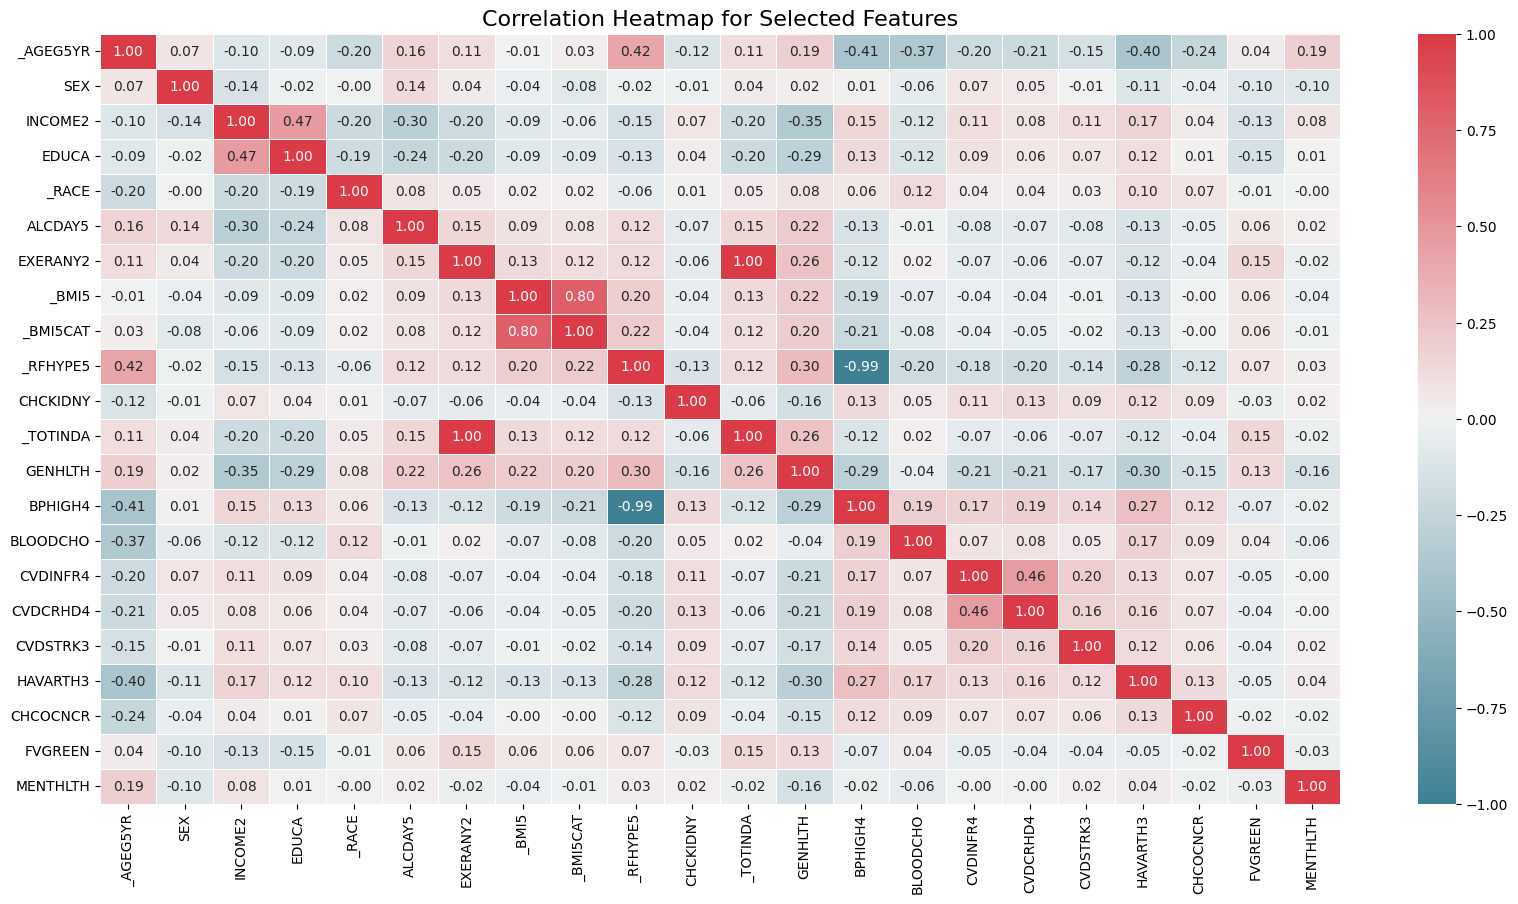

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = cleaned_diabetes_df.iloc[:, feature_columns].corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=-1, vmax=1,
            fmt=".2f",
            linewidths=0.5)

plt.title("Correlation Heatmap for Selected Features", fontsize=16)
plt.show()


From heatmap above, we see that there are some columns that are correlated with each other, meaning applying PCA would be suitable in reducing features that are redundant

Feature Scaling / Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
X_scaled = StandardScaler().fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=cleaned_diabetes_df.columns[feature_columns])

print("Transformed X variables:")
X_scaled.head()


Transformed X variables:


,_AGEG5YR,SEX,INCOME2,EDUCA,_RACE,ALCDAY5,EXERANY2,_BMI5,_BMI5CAT,_RFHYPE5,...,GENHLTH,BPHIGH4,BLOODCHO,CVDINFR4,CVDCRHD4,CVDSTRK3,HAVARTH3,CHCOCNCR,FVGREEN,MENTHLTH
0,0.904887,0.899055,0.149043,-1.881320,-0.406455,1.044696,-0.586904,-0.229878,0.073133,1.221840,...,-0.488157,-1.211048,-0.371799,0.250942,0.257003,0.208168,-1.417625,0.337858,-1.273543,0.652205
1,0.634434,-1.112279,1.042795,1.016661,-0.406455,1.044696,-0.586904,-0.425556,0.073133,1.221840,...,-0.488157,-1.211048,-0.371799,0.250942,0.257003,0.208168,0.705405,0.337858,-0.378764,0.652205
2,0.904887,0.899055,-0.744709,-0.915326,-0.406455,-0.884880,-0.586904,-0.458670,0.073133,1.221840,...,0.442762,-1.211048,-0.371799,0.250942,0.257003,0.208168,-1.417625,0.337858,0.610655,0.652205
3,0.093530,-1.112279,-1.191585,-0.915326,-0.406455,1.044696,1.703857,-0.598655,-1.139967,-0.818438,...,-0.488157,0.806992,-0.371799,0.250942,0.257003,0.208168,0.705405,0.337858,-0.395971,0.652205
4,1.445791,-1.112279,1.042795,1.016661,-0.406455,-0.887693,-0.586904,-0.506837,-1.139967,-0.818438,...,0.442762,0.806992,-0.371799,0.250942,0.257003,0.208168,-1.417625,0.337858,0.524619,0.652205


Applying PCA function

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()

x_pca = pca.fit_transform(X_scaled)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.287995,-1.285160,-0.314340,-0.765696,2.172725,-0.433740,0.749991,-0.814689,0.523897,0.325225,...,-1.054299,-0.233824,0.295165,-0.912875,0.200963,1.261291,-0.330945,-0.177197,0.012075,1.590122e-16
1,-0.145298,-1.987899,0.523896,0.377706,0.355645,-1.578617,0.123193,-0.434249,-0.070500,0.351175,...,0.787115,-1.392136,-0.477899,0.094704,-0.046629,-0.012283,0.319559,-0.257739,0.002346,-3.518585e-17
2,1.391011,-1.238930,-0.298987,-0.579360,1.502050,-0.717576,-0.267679,0.590301,0.800047,0.349100,...,-1.073970,1.299624,0.214863,0.291068,-0.071794,0.155944,-0.227702,-0.384330,0.008668,-5.441982e-16
3,0.037171,2.098817,-1.526095,1.393297,-0.065938,-0.834927,1.231512,-0.146971,0.118602,0.286027,...,-0.306596,-1.477164,1.028373,-0.184722,0.182142,-0.763420,-0.361872,0.396342,-0.017793,-1.116987e-16
4,-1.049080,-1.545544,-0.746831,0.835008,-0.378796,0.088157,0.507369,1.349140,0.394794,0.381310,...,-1.391562,-0.301532,-1.172623,0.532577,-0.177155,-0.022718,0.763498,0.548654,-0.040155,-3.084107e-16


PCA variance ratio

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.74364035e-01, 1.00747734e-01, 7.93439252e-02, 6.89280943e-02,
       6.17896971e-02, 5.55321125e-02, 5.00294332e-02, 4.64191171e-02,
       4.33201267e-02, 4.06363817e-02, 3.98112371e-02, 3.78916389e-02,
       3.60443813e-02, 3.35393792e-02, 3.07123947e-02, 2.57235351e-02,
       2.40229643e-02, 2.24190618e-02, 1.94339205e-02, 8.89695074e-03,
       3.93880114e-04, 9.48160770e-18])

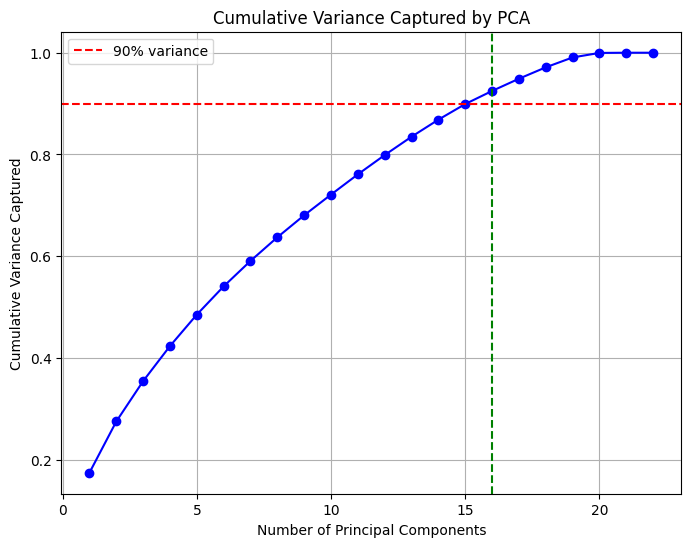

PCA that 90% variance: 16


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

cumulative_variance = np.cumsum(explained_variance)
x = np.arange(1,len(cumulative_variance)+1)

plt.figure(figsize=(8,6))

plt.plot(x,cumulative_variance,marker='o', linestyle='-', color='b')

# Highlight the 90% threshold
plt.axhline(y=0.9, color='r', linestyle='--', label='90% variance')
plt.axvline(x=np.argmax(cumulative_variance >= 0.9) + 1, color='g', linestyle='--')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Captured')
plt.title('Cumulative Variance Captured by PCA')
plt.grid(True)
plt.legend()

plt.show()

# Finding the number of components to capture 90% variance
num_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
print(f'PCA that 90% variance: {num_components_90}')


### What's Next?

Option 1 : Retain the first 16 components and drop the rest , then use the reduced feature set for further modeling or analysis.

In [ ]:
X_reduced = pca.transform(X)[:,:26]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Option 2: Loading scores

Analyze the PCA loadings (to interpret the principal components): To understand which original features contribute most to each component. These loadings indicate how much each original feature contributes to the principal components. Then you can then choose to retain the most important variables.

In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, len(pca.components_)+1)],
                        index=cleaned_diabetes_df.columns[feature_columns])
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
_AGEG5YR,0.276797,-0.300001,-0.192718,0.142872,0.150209,0.002815,0.241962,0.105392,0.061693,0.014205,...,-0.108541,-0.009444,0.043589,-0.110390,0.032472,-0.132559,0.791051,0.047857,-0.010598,4.765937e-18
SEX,0.032009,0.045586,-0.171652,-0.012447,0.433239,0.429739,-0.045946,-0.263804,0.138695,0.061370,...,0.264729,0.593727,0.030807,0.116662,-0.030051,0.181107,0.026349,-0.037690,0.007795,3.327175e-17
INCOME2,-0.230697,-0.278647,0.153031,0.346376,-0.167301,0.021204,-0.058689,-0.051862,-0.058266,0.017845,...,0.104111,-0.076504,-0.230689,-0.065347,0.027095,0.767060,0.151426,0.025857,0.000123,2.736228e-16
EDUCA,-0.203962,-0.282529,0.098151,0.295447,-0.109535,0.169695,-0.165035,-0.120009,-0.060842,0.013772,...,0.257381,-0.013976,-0.503432,0.248117,-0.136285,-0.540561,0.042091,-0.015813,-0.000341,1.180778e-17
_RACE,-0.002449,0.274133,0.020190,-0.281583,0.053183,-0.194294,0.099862,-0.316287,-0.301750,-0.151628,...,0.169107,0.155948,-0.354190,-0.175185,-0.012440,0.028641,0.156379,0.014596,0.000269,1.490812e-16
ALCDAY5,0.189008,0.140104,-0.117110,-0.180811,0.206428,0.080986,0.317593,-0.053431,0.071451,0.177425,...,0.431189,-0.569748,-0.293658,-0.088516,0.010426,0.084831,-0.048111,-0.003020,0.000941,2.199738e-17
EXERANY2,0.252816,0.385128,-0.085890,0.504557,-0.074447,-0.031639,-0.035925,-0.119116,-0.022757,-0.021737,...,-0.008600,-0.012553,0.004525,-0.039961,0.002555,-0.019923,-0.020461,-0.004378,0.000100,-7.071068e-01
_BMI5,0.197051,0.074408,0.612004,-0.031924,-0.040861,0.193594,0.140166,-0.000514,0.006797,-0.012557,...,0.024873,0.092052,0.029003,-0.037786,-0.004386,-0.041541,0.035199,0.706541,-0.002056,-2.343495e-16
_BMI5CAT,0.198635,0.048044,0.617889,-0.025107,-0.057215,0.156906,0.162087,0.009175,-0.000198,-0.016876,...,0.010235,0.065052,0.032706,-0.069716,0.018417,-0.024395,0.098848,-0.703981,-0.000756,3.083034e-16
_RFHYPE5,0.360702,-0.264113,0.092551,-0.020868,0.161754,-0.365802,-0.286047,-0.136155,-0.020656,-0.022007,...,0.085048,0.028740,-0.015432,-0.021808,-0.012665,0.022059,-0.089266,0.002280,0.710056,7.305877e-16


Extracting the top 10 features for each principal component and storing the unique ones in a set

End result: There are still 22 features. Therefore, we learnt that we cant further reduce the dimensions


In [ ]:
# Number of top features to extract per principal component (e.g., top 10)
top_n = 10

# Set the number of principal components to limit to (e.g., top 26)
n_components = 26

# Initialize a set to store unique top features across all PCs
unique_top_features = set()

# Loop through each of the first 26 principal components (or as many PCs as there are, if less than 26)
for i in range(min(n_components, loadings.shape[1])):
    # Sort the loadings for each PC in descending order
    sorted_loadings = loadings.iloc[:, i].abs().sort_values(ascending=False)

    # Extract the top n features
    top_features = sorted_loadings.index[:top_n].tolist()

    # Add these top features to set
    unique_top_features.update(top_features)

# Output the number of unique features
len(unique_top_features)


22

# Pre-diabetic Clustering: Varrya

**Total: Both Males & Females **

Step 1: Get only the Prediabetic rows & only the columns chosen for clustering

In [ ]:
cleaned_diabetes_df['diabetic_type']

# Filter for rows where 'diabetic_type' is 'pre-diabetic'
pre_diabetic_df = cleaned_diabetes_df[cleaned_diabetes_df['diabetic_type'] == 'pre-diabetic']

# Display the filtered rows
pre_diabetic_df
# pre_diabetic_df.info()

#Clustering we will only be keeping the following variables: FVGREEN, EXEROFT1, ALCDAY5, BPHIGH4, _BMI5, MENTHLTH, EDUCA, INCOME2, _AGE5YR, SEX

pre_diabetic_df = pre_diabetic_df[['FVGREEN', 'EXERANY2', 'ALCDAY5', 'BPHIGH4', '_BMI5', 'MENTHLTH', 'EDUCA', 'INCOME2', '_AGEG5YR', 'SEX']]
pre_diabetic_df

,FVGREEN,EXERANY2,ALCDAY5,BPHIGH4,_BMI5,MENTHLTH,EDUCA,INCOME2,_AGEG5YR,SEX
134,202.0,1.0,888.0,1.0,2657.0,30.0,4.0,3.0,10.0,2.0
669,202.0,2.0,888.0,1.0,2592.0,30.0,4.0,3.0,6.0,2.0
1011,320.0,2.0,888.0,1.0,3101.0,88.0,6.0,8.0,11.0,1.0
1094,302.0,2.0,888.0,1.0,2829.0,88.0,3.0,2.0,12.0,1.0
1111,320.0,2.0,220.0,3.0,3862.0,1.0,6.0,5.0,11.0,2.0
...,...,...,...,...,...,...,...,...,...,...
441131,303.0,2.0,888.0,1.0,2456.0,88.0,3.0,1.0,11.0,2.0
441167,101.0,1.0,888.0,1.0,3450.0,88.0,5.0,4.0,4.0,2.0
441239,203.0,2.0,201.0,3.0,2446.0,88.0,6.0,4.0,10.0,2.0
441427,555.0,2.0,888.0,3.0,2918.0,88.0,6.0,4.0,6.0,2.0


Step 2: Check for highly skewed variables and Transform them

In [ ]:
pre_diabetic_df.skew()

#Try:  Yeo-Johnson Transformation
from sklearn.preprocessing import PowerTransformer

# Create a Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation
pre_diabetic_df[['YJ_BMI5']] = pt.fit_transform(pre_diabetic_df[['_BMI5']])
#Check for skew after transformation
pre_diabetic_df.skew()

#Results: EXERANY2 still skewed, since like transformation has not much effect

#Choose the Yeo-Johnson Transformation as it leads to most difference in decreasing skewness

#Drop original variables

pre_diabetic_df_transformed = pre_diabetic_df.drop(['_BMI5'], axis=1)
print(pre_diabetic_df_transformed)

       FVGREEN EXERANY2 ALCDAY5 BPHIGH4 MENTHLTH EDUCA INCOME2 _AGEG5YR  SEX  \
134      202.0      1.0   888.0     1.0     30.0   4.0     3.0     10.0  2.0   
669      202.0      2.0   888.0     1.0     30.0   4.0     3.0      6.0  2.0   
1011     320.0      2.0   888.0     1.0     88.0   6.0     8.0     11.0  1.0   
1094     302.0      2.0   888.0     1.0     88.0   3.0     2.0     12.0  1.0   
1111     320.0      2.0   220.0     3.0      1.0   6.0     5.0     11.0  2.0   
...        ...      ...     ...     ...      ...   ...     ...      ...  ...   
441131   303.0      2.0   888.0     1.0     88.0   3.0     1.0     11.0  2.0   
441167   101.0      1.0   888.0     1.0     88.0   5.0     4.0      4.0  2.0   
441239   203.0      2.0   201.0     3.0     88.0   6.0     4.0     10.0  2.0   
441427   555.0      2.0   888.0     3.0     88.0   6.0     4.0      6.0  2.0   
441429   201.0      2.0   888.0     1.0     88.0   5.0     2.0      6.0  2.0   

         YJ_BMI5  
134    -0.505692  
6

In [ ]:
# pre_diabetic_df.skew()

# #Seeing as _BMI5 is a highly skewed variable with skew > 1, we will transform it

# pre_diabetic_df['Log_BMI5'] = np.log(pre_diabetic_df['_BMI5'])
# pre_diabetic_df

# #Check for skew after transforming _BMI5 to Log_BMI5
# pre_diabetic_df.skew()

# #Drop the original _BMI5
# pre_diabetic_df_transformed = pre_diabetic_df.drop(['_BMI5'], axis = 1)
# pre_diabetic_df_transformed



,FVGREEN,EXERANY2,ALCDAY5,BPHIGH4,MENTHLTH,EDUCA,INCOME2,_AGEG5YR,SEX,Log_BMI5
134,202.0,1.0,888.0,1.0,30.0,4.0,3.0,10.0,2.0,7.884953
669,202.0,2.0,888.0,1.0,30.0,4.0,3.0,6.0,2.0,7.860185
1011,320.0,2.0,888.0,1.0,88.0,6.0,8.0,11.0,1.0,8.039480
1094,302.0,2.0,888.0,1.0,88.0,3.0,2.0,12.0,1.0,7.947679
1111,320.0,2.0,220.0,3.0,1.0,6.0,5.0,11.0,2.0,8.258940
...,...,...,...,...,...,...,...,...,...,...
441131,303.0,2.0,888.0,1.0,88.0,3.0,1.0,11.0,2.0,7.806289
441167,101.0,1.0,888.0,1.0,88.0,5.0,4.0,4.0,2.0,8.146130
441239,203.0,2.0,201.0,3.0,88.0,6.0,4.0,10.0,2.0,7.802209
441427,555.0,2.0,888.0,3.0,88.0,6.0,4.0,6.0,2.0,7.978654


Step 3: Standardization - Scaling the Columns

In [ ]:
# Prepare to use a package for standardization
from sklearn.preprocessing import StandardScaler

# Scales data using z = (x - u) / s

# Create a StandardScaler object that will perform the scaling
scaler = StandardScaler()

# Give the dataset to the scaler, so that it can perform statistical analysis on the dataset
scaler.fit(pre_diabetic_df_transformed)


#1. Print the mean and variance attributes from the scaler object after calling fit()
scaler.mean_

# Show variance of original variables, before scaling
scaler.var_

#2. Scale the variables using the Transform() function
pre_diabetic_df_scaled_np = scaler.transform(pre_diabetic_df_transformed)
pre_diabetic_df_scaled_np

# Create a new dataset, using the scaled dataset, with the same column names as the transformed dataset
pre_diabetic_df_prepared = pd.DataFrame(pre_diabetic_df_scaled_np, columns = pre_diabetic_df_transformed.columns)
pre_diabetic_df_prepared

#Check: Means should tend to Zero, Std Dev should tend to One
pre_diabetic_df_prepared.describe()



,FVGREEN,EXERANY2,ALCDAY5,BPHIGH4,MENTHLTH,EDUCA,INCOME2,_AGEG5YR,SEX,YJ_BMI5
count,3.138000e+03,3.138000e+03,3.138000e+03,3.138000e+03,3.138000e+03,3.138000e+03,3.138000e+03,3.138000e+03,3.138000e+03,3.138000e+03
mean,9.510132e-17,2.309604e-16,-1.222731e-16,6.340088e-17,2.490749e-17,-6.340088e-17,-1.856740e-16,-7.019383e-17,1.132159e-16,1.132159e-17
std,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00,1.000159e+00
min,-1.297882e+00,-7.121830e-01,-1.400001e+00,-7.669497e-01,-1.710499e+00,-3.351042e+00,-1.783788e+00,-2.711535e+00,-1.173573e+00,-4.951496e+00
25%,-4.591186e-01,-7.121830e-01,-1.108225e+00,-7.669497e-01,-1.121743e+00,-6.230318e-01,-8.808154e-01,-4.214978e-01,-1.173573e+00,-6.507278e-01
50%,-4.342048e-01,-7.121830e-01,8.512545e-01,-7.669497e-01,6.999386e-01,2.863049e-01,2.215707e-02,2.327986e-01,8.520989e-01,-2.552425e-03
75%,4.377775e-01,1.404134e+00,8.512545e-01,1.186531e+00,6.999386e-01,1.195642e+00,4.736433e-01,8.870949e-01,8.520989e-01,6.568532e-01
max,2.472403e+00,1.404134e+00,8.512545e-01,2.163271e+00,6.999386e-01,1.195642e+00,1.376616e+00,1.214243e+00,8.520989e-01,4.277669e+00


Step 4: Modeling using KMeans

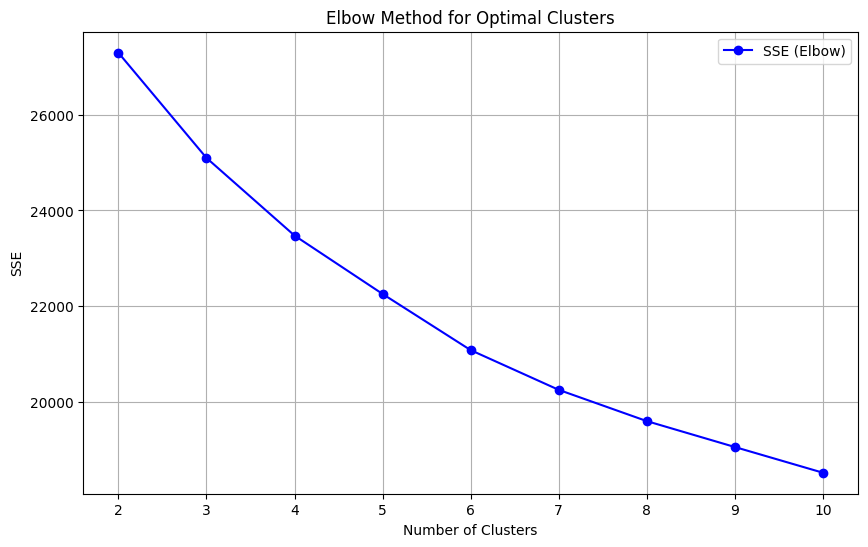

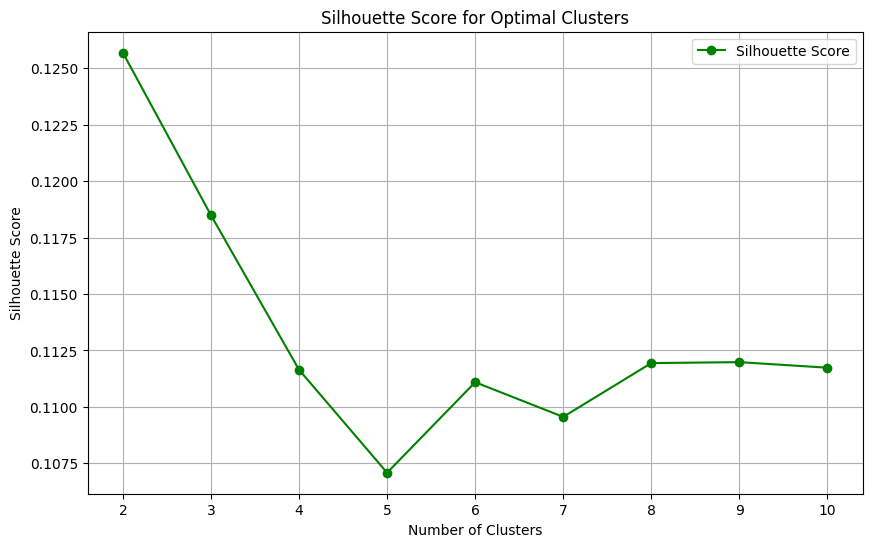

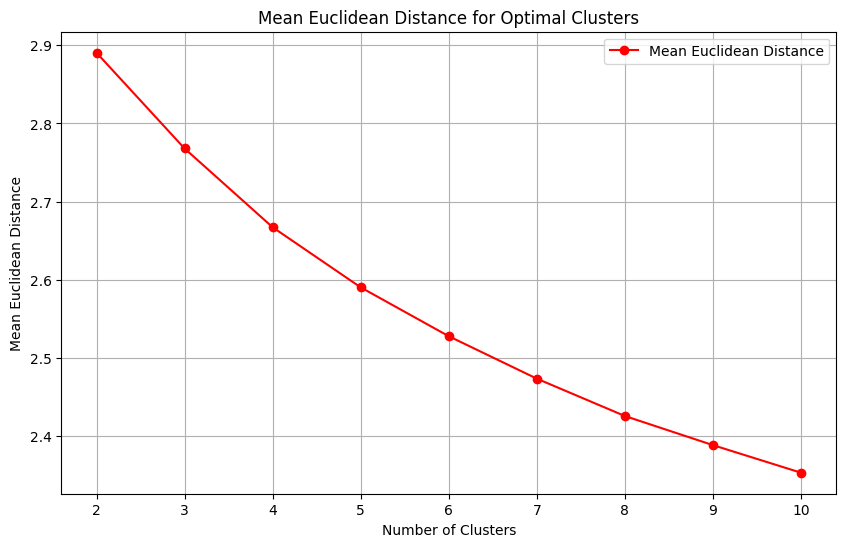

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import os

# Set environment variable to avoid memory leak with K-means clustering
os.environ["OMP_NUM_THREADS"] = '1'


# Step 2: Define a range of possible clusters for evaluation
range_n_clusters = list(range(2, 11))  # Adjusted to match the range from your initial code (2 to 11)

# Step 3: Calculate SSE, Silhouette Score, and Mean Euclidean Distance
SSE = []
silhouette_avg = []
euclidean_distances = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, max_iter=300, tol=0.0001, n_init=10, random_state=99)
    cluster_labels = kmeans.fit_predict(pre_diabetic_df_prepared)

    # Inertia (Elbow Method)
    SSE.append(kmeans.inertia_)

    # Silhouette Score
    silhouette_avg.append(silhouette_score(pre_diabetic_df_prepared, cluster_labels))

    # Mean Euclidean Distance calculation for all clusters
    centers = kmeans.cluster_centers_
    distances = cdist(pre_diabetic_df_prepared, centers, 'euclidean')
    euclidean_distances.append(np.mean(np.min(distances, axis=1)))

# Step 4: Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, SSE, 'bo-', label='SSE (Elbow)')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, 'go-', label='Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Plot Mean Euclidean Distance
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, euclidean_distances, 'ro-', label='Mean Euclidean Distance')
plt.title('Mean Euclidean Distance for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Euclidean Distance')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#2. Performing Clustering with the selected k=4 from the elbow, silhouette & euclidean curves
#Perform clustering with n_clusters = 4, random_state = 99.

# Run k-means clustering with 4 clusters
model = KMeans(n_clusters = 4, max_iter=300, tol=0.0001, n_init=10, random_state=99)
model.fit(pre_diabetic_df_prepared)

# Print the SSE, number of interations run, and the centroids
print("Attributes of the clustering solution for k=4:")
print("SSE :", round(model.inertia_, 1))
print("Num of iterations :" , model.n_iter_)
print("\nCluster centers :" , model.cluster_centers_)

# Therefore the clustering solution converged: as 16 iterations < max_iter which is 300

between_ss = SSE[0] - model.inertia_
improvement = (between_ss / SSE[0])*100
print('The improvement of SSE due to clustering (k=4) is: ' + str(round(improvement,2)) + '%')

Attributes of the clustering solution for k=4:
SSE : 23475.2
Num of iterations : 19

Cluster centers : [[-0.05352633 -0.71218299  0.52562815 -0.27013856  0.13856354 -0.46024932
  -0.54526634  0.47189945  0.32942566 -0.19394504]
 [-0.14913779 -0.3898011  -0.69558481  0.02051555  0.37716881  0.67736673
   0.86992185  0.26466584 -0.53753275 -0.2409634 ]
 [-0.09290888 -0.15309127 -0.06081245  0.64512865 -0.79309667  0.08144619
  -0.09126329 -1.3891565   0.23815958  0.43860522]
 [ 0.32788079  1.40413351  0.37935901 -0.26679579  0.01760895 -0.44384617
  -0.45777398  0.29419366  0.14067005  0.15952512]]
The improvement of SSE due to clustering (k=4) is: 14.02%


From the above figures, we see that it is at k = 4 clusters where we have achieved the maximum reduction in SSE & Euclidean distance. As for silhouette scores, though the highest silhouette score occurs at k = 2, choosing only 2 clusters may result in overly generalised clustering. Hence, we are choosing to go with 4 clusters, as justified by the Elbow plot & Euclidean distance.  

Step 5: Silhouette Score

In [ ]:
# Prepare to use silhouette score
from sklearn.metrics import silhouette_score

# Calculate silhouette score of the model
silhouette_score(pre_diabetic_df_prepared, model.labels_)

0.11164781609836064

Step 6: Cluster Profiling

In [ ]:
# Add a new "cluster" column to the original dataset,
# to indicate in which cluster each record belongs to
pre_diabetic_df['cluster'] = model.labels_
pre_diabetic_df

# Show all possible "cluster" values, and how often each one occurs
pre_diabetic_df['cluster'].value_counts()

,count
cluster,
1,962
0,813
3,746
2,617


Step 7: Heatmap generation

In [ ]:
#Cluster Profiling
# Show cluster centroids
model.cluster_centers_


array([[-0.05352633, -0.71218299,  0.52562815, -0.27013856,  0.13856354,
        -0.46024932, -0.54526634,  0.47189945,  0.32942566, -0.19394504],
       [-0.14913779, -0.3898011 , -0.69558481,  0.02051555,  0.37716881,
         0.67736673,  0.86992185,  0.26466584, -0.53753275, -0.2409634 ],
       [-0.09290888, -0.15309127, -0.06081245,  0.64512865, -0.79309667,
         0.08144619, -0.09126329, -1.3891565 ,  0.23815958,  0.43860522],
       [ 0.32788079,  1.40413351,  0.37935901, -0.26679579,  0.01760895,
        -0.44384617, -0.45777398,  0.29419366,  0.14067005,  0.15952512]])

    FVGREEN  EXERANY2   ALCDAY5   BPHIGH4  MENTHLTH     EDUCA   INCOME2  \
0 -0.053526 -0.712183  0.525628 -0.270139  0.138564 -0.460249 -0.545266   
1 -0.149138 -0.389801 -0.695585  0.020516  0.377169  0.677367  0.869922   
2 -0.092909 -0.153091 -0.060812  0.645129 -0.793097  0.081446 -0.091263   
3  0.327881  1.404134  0.379359 -0.266796  0.017609 -0.443846 -0.457774   

   _AGEG5YR       SEX   YJ_BMI5  
0  0.471899  0.329426 -0.193945  
1  0.264666 -0.537533 -0.240963  
2 -1.389156  0.238160  0.438605  
3  0.294194  0.140670  0.159525  


<Axes: >

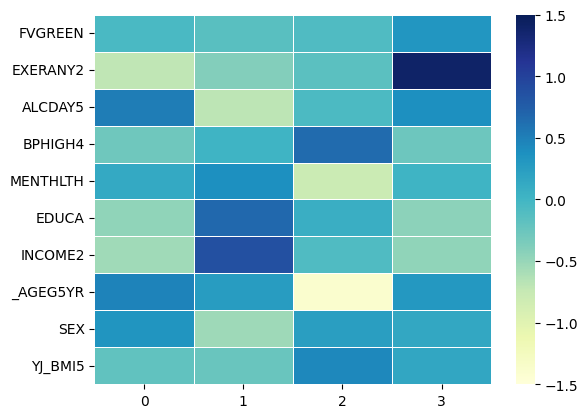

In [ ]:
# Create a DataFrame of cluster centroids.
clust_means = pd.DataFrame(model.cluster_centers_, columns=pre_diabetic_df_prepared.columns)
print(clust_means)

#Generate heatmap

# Prepare to generate heatmap
import seaborn as sns
# Show heatmap of clusters.
# "clust_means.T" means that we will transpose the 'clust_means' DataFrame,
# so that the rows become columns, and the columns become rows.
# Each column is a cluster centroid,
# each row is a variable in the dataset,
# and the average value is represented as a color
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu", vmin=-1.5, vmax=1.5)

What does the Heatmap tell us about the Prediabetes clusters?

Cluster 1: High physical activity but higher alcohol intake, and lower income. 962 observations
Cluster 0: Balanced overall, with moderate lifestyle and health indicators. 813 observations.
Cluster 3: Low physical activity, high BMI, and elevated blood pressure. 746 observations.
Cluster 2: Older age, moderate mental health challenges, and lower fruit/vegetable intake. 617 observations.


Overall, these insights suggest targeted areas for lifestyle interventions: encouraging more physical activity for Clusters 0 and 3, promoting dietary improvements in Cluster 2, and addressing alcohol intake in Cluster 1.




*Separate clustering for Males & Females*

In [ ]:
cleaned_diabetes_df['diabetic_type']

# Filter for rows where 'diabetic_type' is 'pre-diabetic'
pre_diabetic_df = cleaned_diabetes_df[cleaned_diabetes_df['diabetic_type'] == 'pre-diabetic']

# Display the filtered rows
pre_diabetic_df
# pre_diabetic_df.info()

#Clustering we will only be keeping the following variables: FVGREEN, EXEROFT1, ALCDAY5, BPHIGH4, _BMI5, MENTHLTH, EDUCA, INCOME2, _AGE5YR, SEX

pre_diabetic_df = pre_diabetic_df[['FVGREEN', 'EXERANY2', 'ALCDAY5', 'BPHIGH4', '_BMI5', 'MENTHLTH', 'EDUCA', 'INCOME2', '_AGEG5YR', 'SEX']]
pre_diabetic_df

# Convert all columns in the DataFrame to numeric types
pre_diabetic_df = pre_diabetic_df.apply(pd.to_numeric, errors='coerce')


#Now get 2 separate dataframes for Male & Female
#Male
pre_diabetic_df_male = pre_diabetic_df[pre_diabetic_df['SEX'] == 1.0]
pre_diabetic_df_male = pre_diabetic_df_male.drop(['SEX'], axis = 1.0)
print(pre_diabetic_df_male)

#Female
pre_diabetic_df_female = pre_diabetic_df[pre_diabetic_df['SEX'] == 2.0]
pre_diabetic_df_female = pre_diabetic_df_female.drop(['SEX'], axis = 1.0)
print(pre_diabetic_df_female)

        FVGREEN  EXERANY2  ALCDAY5  BPHIGH4   _BMI5  MENTHLTH  EDUCA  INCOME2  \
1011      320.0       2.0    888.0      1.0  3101.0      88.0    6.0      8.0   
1094      302.0       2.0    888.0      1.0  2829.0      88.0    3.0      2.0   
1396      330.0       1.0    888.0      1.0  2421.0      88.0    6.0      8.0   
1610      302.0       2.0    888.0      1.0  2909.0       3.0    3.0      4.0   
1881      202.0       1.0    201.0      3.0  2726.0      88.0    5.0      4.0   
...         ...       ...      ...      ...     ...       ...    ...      ...   
439835    203.0       2.0    205.0      1.0  2695.0      30.0    3.0      1.0   
440048    555.0       2.0    888.0      1.0  2647.0      88.0    4.0      3.0   
440346    555.0       2.0    888.0      1.0  3160.0      88.0    5.0      2.0   
440380    204.0       1.0    202.0      1.0  2780.0      88.0    6.0      8.0   
440542    201.0       2.0    888.0      3.0  2744.0      14.0    6.0      1.0   

        _AGEG5YR  
1011    

Step 2: Check for skew and transform variables

In [ ]:
print(pre_diabetic_df_male.skew())
print(pre_diabetic_df_female.skew())



# Try 3: Yeo-Johnson Transformation
from sklearn.preprocessing import PowerTransformer

# Create a Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation on the Prediabetic Males Dataframe
pre_diabetic_df_male[['YJ_MENTHLTH', 'YJ_BMI5']] = pt.fit_transform(pre_diabetic_df_male[['MENTHLTH', '_BMI5']])
# Check for skew after transformation
print(pre_diabetic_df_male.skew())

# Results: YJ_MENTHLTH still slightly skewed

# Choose the Yeo-Johnson Transformation as it leads to the most difference in decreasing skewness


# Drop original variables
pre_diabetic_df_male = pre_diabetic_df_male.drop(['MENTHLTH', '_BMI5'], axis=1)
print(pre_diabetic_df_male)


# Apply the transformation on the Prediabetic Females Dataframe
pre_diabetic_df_female[['YJ_FVGREEN', 'YJ_BMI5']] = pt.fit_transform(pre_diabetic_df_female[['FVGREEN', '_BMI5']])
# Check for skew after transformation
print(pre_diabetic_df_female.skew())

# Results: No more skewed variables, including YJ_FVGREEN and YJ_BMI5

# Choose the Yeo-Johnson Transformation as it leads to the most difference in decreasing skewness


# Drop original variables
pre_diabetic_df_female = pre_diabetic_df_female.drop(['FVGREEN', '_BMI5'], axis=1)
print(pre_diabetic_df_female)

FVGREEN     0.946269
EXERANY2    0.744428
ALCDAY5     0.090787
BPHIGH4     0.659919
_BMI5       1.213597
MENTHLTH   -1.233232
EDUCA      -0.529583
INCOME2    -0.400284
_AGEG5YR   -0.859453
dtype: float64
FVGREEN     1.031912
EXERANY2    0.655767
ALCDAY5    -0.678887
BPHIGH4     0.600992
_BMI5       1.564238
MENTHLTH   -0.519901
EDUCA      -0.487828
INCOME2     0.105496
_AGEG5YR   -0.724523
dtype: float64
FVGREEN        0.946269
EXERANY2       0.744428
ALCDAY5        0.090787
BPHIGH4        0.659919
_BMI5          1.213597
MENTHLTH      -1.233232
EDUCA         -0.529583
INCOME2       -0.400284
_AGEG5YR      -0.859453
YJ_MENTHLTH   -1.180382
YJ_BMI5       -0.017740
dtype: float64
        FVGREEN  EXERANY2  ALCDAY5  BPHIGH4  EDUCA  INCOME2  _AGEG5YR  \
1011      320.0       2.0    888.0      1.0    6.0      8.0      11.0   
1094      302.0       2.0    888.0      1.0    3.0      2.0      12.0   
1396      330.0       1.0    888.0      1.0    6.0      8.0      10.0   
1610      302.0      

In [ ]:
# print(pre_diabetic_df['MENTHLTH'].isna().sum())
# print(pre_diabetic_df_female['MENTHLTH'].isna().sum())

# print(pre_diabetic_df['MENTHLTH'].unique())
# print(pre_diabetic_df_female['MENTHLTH'].unique())



# print((pre_diabetic_df['MENTHLTH'] < 0).sum())  # Check for zero values in the smaller dataset
# print((pre_diabetic_df_female['MENTHLTH'] < 0).sum())  # Check for zero values in the larger dataset
# print((pre_diabetic_df_male['MENTHLTH'] < 0).sum())  # Check for zero values in the larger dataset

# print(pre_diabetic_df['MENTHLTH'].apply(type).unique())  # Check data types in smaller dataset
# print(pre_diabetic_df_female['MENTHLTH'].apply(type).unique())  # Check data types in larger dataset
# print(pre_diabetic_df_male['MENTHLTH'].apply(type).unique())


# print(pre_diabetic_df['MENTHLTH'].describe())  # Summary statistics of the smaller dataset
# print(pre_diabetic_df_male['MENTHLTH'].describe())  # Summary statistics of the larger dataset
# print(pre_diabetic_df_female['MENTHLTH'].describe())


# try:
#     test_log = np.log(pre_diabetic_df_female['MENTHLTH'])
#     print(test_log)
# except Exception as e:
#     print(f"Error: {e}")


#comment from here

# print(pre_diabetic_df_male.skew())
# print(pre_diabetic_df_female.skew())

# # #Seeing as _BMI5, MENTHLTH are highly skewed variables for the male df with skews > abs val of 1, we will transform them

# # # Convert the column to numeric, forcing any non-numeric values to NaN
# # pre_diabetic_df_male['_BMI5'] = pd.to_numeric(pre_diabetic_df_male['_BMI5'], errors='coerce')
# # pre_diabetic_df_male['MENTHLTH'] = pd.to_numeric(pre_diabetic_df_male['MENTHLTH'], errors='coerce')

# # # Fill any NaN values with a small number (since log of NaN is undefined) or a relevant value based on your analysis
# # pre_diabetic_df_male['_BMI5'].fillna(0, inplace=True)
# # pre_diabetic_df_male['MENTHLTH'].fillna(0, inplace=True)

# # # Now apply np.log1p() safely
# # pre_diabetic_df_male['Log_BMI5'] = np.log1p(pre_diabetic_df_male['_BMI5'])
# # pre_diabetic_df_male['Log_MENTHLTH'] = np.log1p(pre_diabetic_df_male['MENTHLTH'])


# pre_diabetic_df_male['Log_BMI5'] = np.log(pre_diabetic_df_male['_BMI5'])

# pre_diabetic_df_male['Log_MENTHLTH'] = np.log(pre_diabetic_df_male['MENTHLTH'])

# pre_diabetic_df_male = pre_diabetic_df_male.drop(['_BMI5', 'MENTHLTH'], axis=1)
# pre_diabetic_df_male
# print(pre_diabetic_df_male)



# # Check for skew after transforming _BMI5 to Log_BMI5


# # Seeing as _BMI5, FVGREEN are highly skewed variables for the female df with skews > abs val of 1, we will transform them
# pre_diabetic_df_female['Log_BMI5'] = np.log(pre_diabetic_df_female['_BMI5'])
# pre_diabetic_df_female['Log_FVGREEN'] = np.log(pre_diabetic_df_female['FVGREEN'])
# pre_diabetic_df_female

# # #Check for skew after transforming _BMI5 to Log_BMI5
# pre_diabetic_df_female.skew()

# # #Drop the original _BMI5
# pre_diabetic_df_female = pre_diabetic_df_female.drop(['_BMI5', 'FVGREEN'], axis=1)
# pre_diabetic_df_female
# # pre_diabetic_df_transformed




FVGREEN     0.946269
EXERANY2    0.744428
ALCDAY5     0.090787
BPHIGH4     0.659919
_BMI5       1.213597
MENTHLTH   -1.233232
EDUCA      -0.529583
INCOME2    -0.400284
_AGEG5YR   -0.859453
dtype: float64
FVGREEN     1.031912
EXERANY2    0.655767
ALCDAY5    -0.678887
BPHIGH4     0.600992
_BMI5       1.564238
MENTHLTH   -0.519901
EDUCA      -0.487828
INCOME2     0.105496
_AGEG5YR   -0.724523
dtype: float64
        FVGREEN  EXERANY2  ALCDAY5  BPHIGH4  EDUCA  INCOME2  _AGEG5YR  \
1011      320.0       2.0    888.0      1.0    6.0      8.0      11.0   
1094      302.0       2.0    888.0      1.0    3.0      2.0      12.0   
1396      330.0       1.0    888.0      1.0    6.0      8.0      10.0   
1610      302.0       2.0    888.0      1.0    3.0      4.0      13.0   
1881      202.0       1.0    201.0      3.0    5.0      4.0      13.0   
...         ...       ...      ...      ...    ...      ...       ...   
439835    203.0       2.0    205.0      1.0    3.0      1.0       8.0   
440048  

,EXERANY2,ALCDAY5,BPHIGH4,MENTHLTH,EDUCA,INCOME2,_AGEG5YR,Log_BMI5,Log_FVGREEN
134,1.0,888.0,1.0,30.0,4.0,3.0,10.0,7.884953,5.308268
669,2.0,888.0,1.0,30.0,4.0,3.0,6.0,7.860185,5.308268
1111,2.0,220.0,3.0,1.0,6.0,5.0,11.0,8.258940,5.768321
1118,1.0,888.0,1.0,88.0,6.0,5.0,13.0,8.099251,5.799093
1226,1.0,202.0,4.0,3.0,5.0,6.0,3.0,8.512984,5.758902
...,...,...,...,...,...,...,...,...,...
441131,2.0,888.0,1.0,88.0,3.0,1.0,11.0,7.806289,5.713733
441167,1.0,888.0,1.0,88.0,5.0,4.0,4.0,8.146130,4.615121
441239,2.0,201.0,3.0,88.0,6.0,4.0,10.0,7.802209,5.313206
441427,2.0,888.0,3.0,88.0,6.0,4.0,6.0,7.978654,6.318968


,266032
EXERANY2,1.000000
ALCDAY5,201.000000
BPHIGH4,1.000000
MENTHLTH,30.000000
EDUCA,6.000000
INCOME2,8.000000
_AGEG5YR,8.000000
Log_BMI5,8.237215
Log_FVGREEN,5.723585


Step 3: Standardisation - Scaling the variables

In [ ]:
# Prepare to use a package for standardization
from sklearn.preprocessing import StandardScaler

# Scales data using z = (x - u) / s

# Create a StandardScaler object that will perform the scaling
scalerM = StandardScaler()
scalerF = StandardScaler()

# Give the dataset to the scaler, so that it can perform statistical analysis on the dataset
scalerM.fit(pre_diabetic_df_male)
scalerF.fit(pre_diabetic_df_female)


#1. Print the mean and variance attributes from the scaler object after calling fit()
scalerM.mean_
scalerF.mean_

# Show variance of original variables, before scaling
scalerM.var_
scalerF.var_

#2. Scale the variables using the Transform() function
pre_diabetic_df_scaled_M = scalerM.transform(pre_diabetic_df_male)
pre_diabetic_df_scaled_M

pre_diabetic_df_scaled_F = scalerF.transform(pre_diabetic_df_female)
pre_diabetic_df_scaled_F


# Create a new dataset, using the scaled dataset, with the same column names as the transformed dataset
pre_diabetic_df_prepared_M = pd.DataFrame(pre_diabetic_df_scaled_M, columns = pre_diabetic_df_male.columns)
pre_diabetic_df_prepared_M

pre_diabetic_df_prepared_F = pd.DataFrame(pre_diabetic_df_scaled_F, columns = pre_diabetic_df_female.columns)
pre_diabetic_df_prepared_F

#Check: Means should tend to Zero, Std Dev should tend to One
print(pre_diabetic_df_prepared_M.describe())
print(pre_diabetic_df_prepared_F.describe())



            FVGREEN      EXERANY2       ALCDAY5       BPHIGH4         EDUCA  \
count  1.320000e+03  1.320000e+03  1.320000e+03  1.320000e+03  1.320000e+03   
mean   8.074349e-17  2.180074e-16 -4.306320e-17 -8.074349e-17  8.612639e-17   
std    1.000379e+00  1.000379e+00  1.000379e+00  1.000379e+00  1.000379e+00   
min   -1.348263e+00 -6.950871e-01 -1.159319e+00 -7.596539e-01 -2.476850e+00   
25%   -5.389593e-01 -6.950871e-01 -8.748490e-01 -7.596539e-01 -6.819326e-01   
50%    2.543189e-01 -6.950871e-01 -7.959861e-01 -7.596539e-01  2.155261e-01   
75%    3.264351e-01  1.438669e+00  1.057292e+00  1.143085e+00  1.112985e+00   
max    2.289598e+00  1.438669e+00  1.057292e+00  2.094454e+00  1.112985e+00   

            INCOME2      _AGEG5YR   YJ_MENTHLTH       YJ_BMI5  
count  1.320000e+03  1.320000e+03  1.320000e+03  1.320000e+03  
mean  -1.022751e-16  2.745279e-16 -1.211152e-17  1.345725e-17  
std    1.000379e+00  1.000379e+00  1.000379e+00  1.000379e+00  
min   -2.124547e+00 -2.846790e+0

Step 4: Modelling using Kmeans

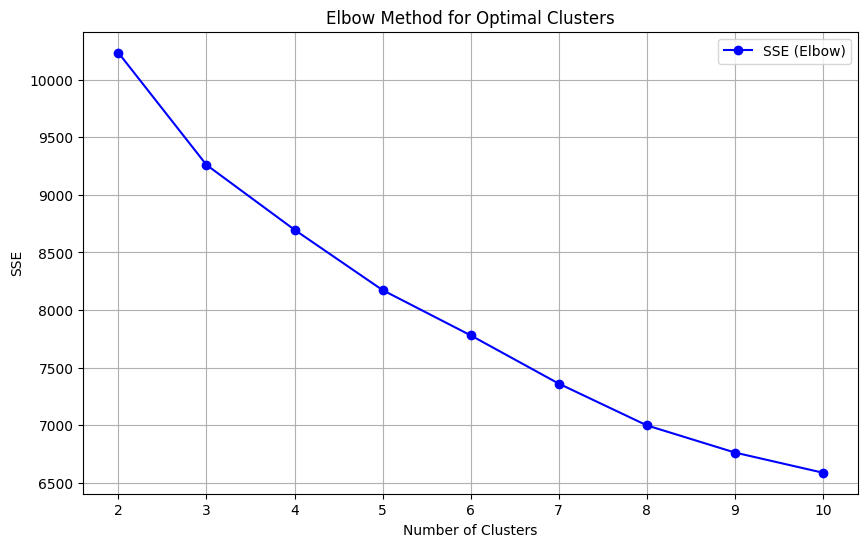

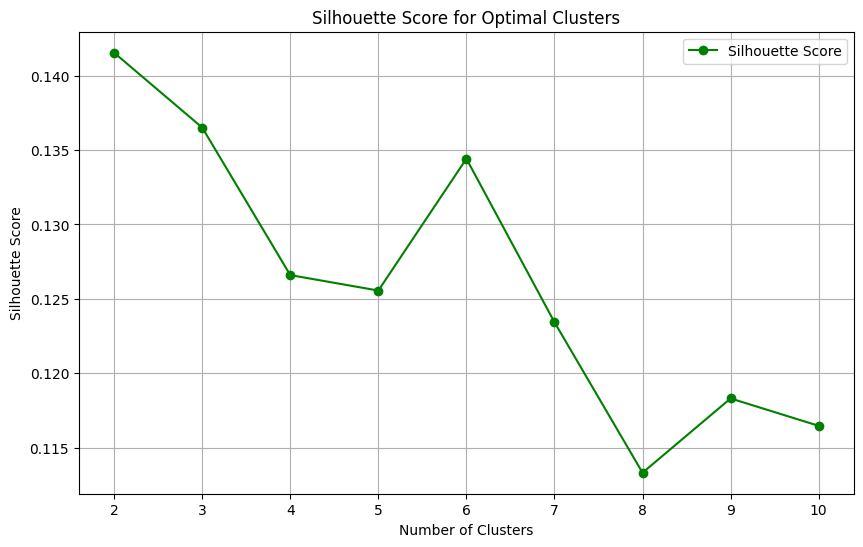

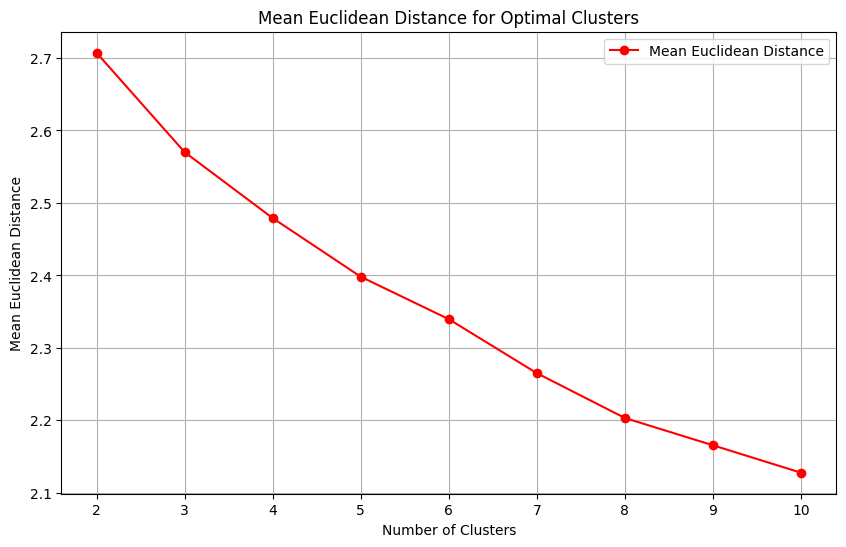

In [ ]:
# Prediabetic Males Elbow Curve, Silhouette Score & Euclidean distance to decide Optimal k

# Required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# Step 2: Define a range of possible clusters for evaluation
range_n_clusters = list(range(2, 11))  # You can adjust the range if needed

# Step 3: Initialize lists for storing evaluation metrics
SSE_M = []
silhouette_avg = []
euclidean_distances = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pre_diabetic_df_prepared_M)

    # Inertia (SSE for Elbow Method)
    SSE_M.append(kmeans.inertia_)

    # Silhouette Score
    silhouette_avg.append(silhouette_score(pre_diabetic_df_prepared_M, cluster_labels))

    # Mean Euclidean distance to cluster centers
    centers = kmeans.cluster_centers_
    distances = cdist(pre_diabetic_df_prepared_M, centers, 'euclidean')
    euclidean_distances.append(np.mean(np.min(distances, axis=1)))

# Step 4: Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, SSE_M, 'bo-', label='SSE (Elbow)')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, 'go-', label='Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Plot Mean Euclidean Distance
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, euclidean_distances, 'ro-', label='Mean Euclidean Distance')
plt.title('Mean Euclidean Distance for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Euclidean Distance')
plt.legend()
plt.grid(True)
plt.show()

For Prediabetic Males, the optimal number of clusters appears to be 4, as indicated by the Elbow Method (where the SSE reduction slows) and supported by reasonable silhouette scores and compactness in the Mean Euclidean Distance plot.



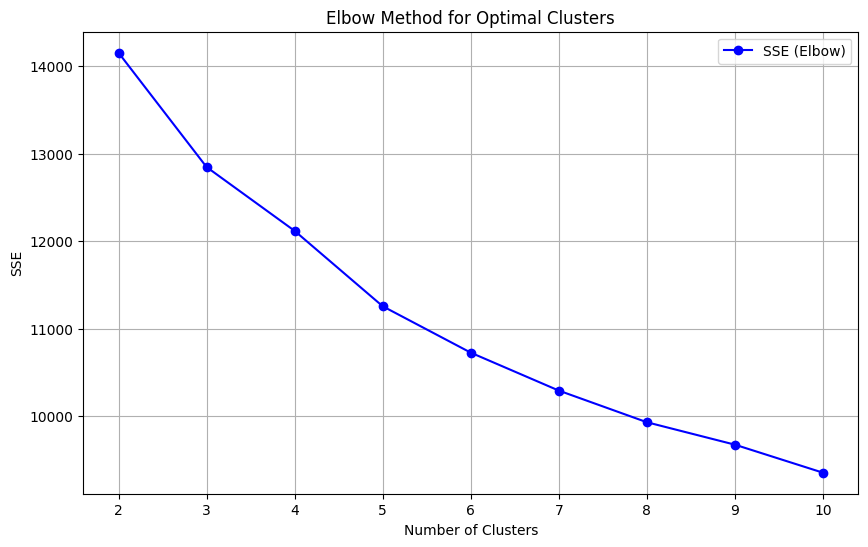

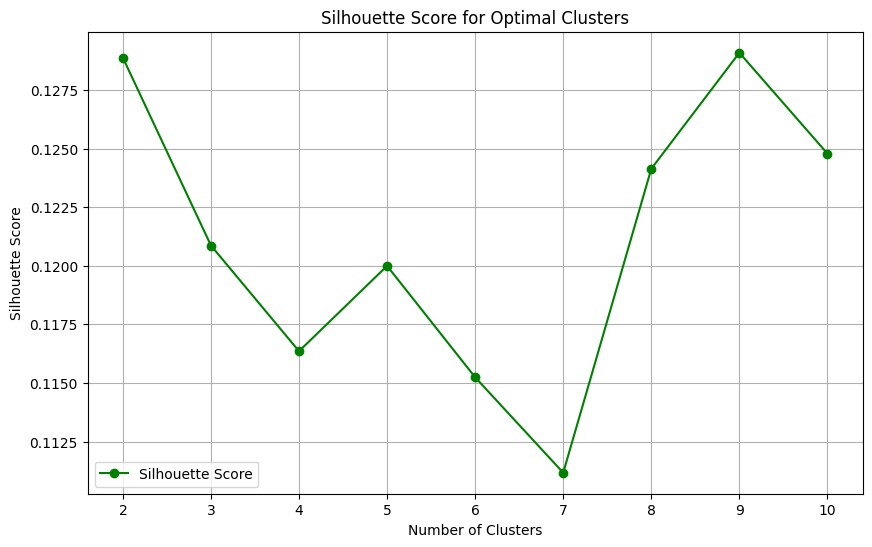

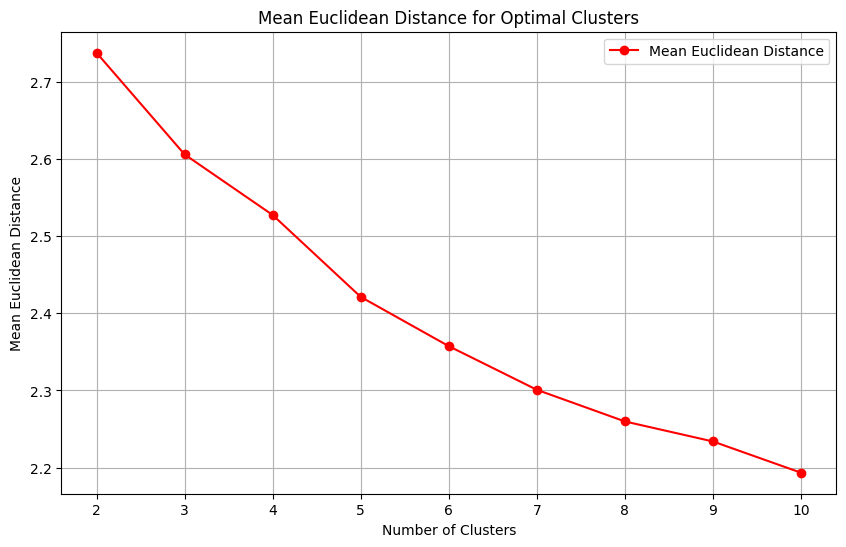

In [ ]:
# Prediabetic Females Elbow Curve, Silhouette Score & Euclidean distance to decide Optimal k

# Required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# Step 2: Define a range of possible clusters for evaluation
range_n_clusters = list(range(2, 11))  # You can adjust the range if needed

# Step 3: Initialize lists for storing evaluation metrics
SSE_F = []
silhouette_avg = []
euclidean_distances = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pre_diabetic_df_prepared_F)

    # Inertia (SSE for Elbow Method)
    SSE_F.append(kmeans.inertia_)

    # Silhouette Score
    silhouette_avg.append(silhouette_score(pre_diabetic_df_prepared_F, cluster_labels))

    # Mean Euclidean distance to cluster centers
    centers = kmeans.cluster_centers_
    distances = cdist(pre_diabetic_df_prepared_F, centers, 'euclidean')
    euclidean_distances.append(np.mean(np.min(distances, axis=1)))

# Step 4: Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, SSE_F, 'bo-', label='SSE (Elbow)')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, 'go-', label='Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Plot Mean Euclidean Distance
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, euclidean_distances, 'ro-', label='Mean Euclidean Distance')
plt.title('Mean Euclidean Distance for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Euclidean Distance')
plt.legend()
plt.grid(True)
plt.show()

For Prediabetic Females, both the Elbow method and Mean Euclidean distance method align to show the optimal number of clusters to be 4 clusters, as there are diminishing returns on reducing SSE beyond this point. The Silhouette Score shows a local peak at 7 clusters, however for consistency, we will choose 4 clusters.

In [ ]:
#2. Performing Clustering with the selected k=3 from the elbow curve for Prediabetic Males
#Perform clustering with n_clusters = 3, random_state = 99.

# Run k-means clustering with 4 clusters
model_M = KMeans(n_clusters = 4, max_iter=300, tol=0.0001, n_init=10, random_state=99)
model_M.fit(pre_diabetic_df_prepared_M)

# Print the SSE, number of interations run, and the centroids
print("Attributes of the clustering solution for k=4 for Prediabetic Males:")
print("SSE :", round(model_M.inertia_, 1))
print("Num of iterations :" , model_M.n_iter_)
print("\nCluster centers :" , model_M.cluster_centers_)

# Therefore the clustering solution converged: as 13 iterations < max_iter which is 300

between_ss_M = SSE_M[0] - model_M.inertia_
improvement_M = (between_ss_M / SSE_M[0])*100
print('The improvement of SSE due to clustering (k=3) is: ' + str(round(improvement_M,2)) + '%')



#2. Performing Clustering with the selected k=3 from the elbow curve for Prediabetic Females
#Perform clustering with n_clusters = 4, random_state = 99.

# Run k-means clustering with 4 clusters
model_F = KMeans(n_clusters = 4, max_iter=300, tol=0.0001, n_init=10, random_state=99)
model_F.fit(pre_diabetic_df_prepared_F)

# Print the SSE, number of interations run, and the centroids
print("\n\nAttributes of the clustering solution for k=4 for Prediabetic Females:")
print("SSE :", round(model_F.inertia_, 1))
print("Num of iterations :" , model_F.n_iter_)
print("\nCluster centers :" , model_F.cluster_centers_)

# Therefore the clustering solution converged: as 26 iterations < max_iter which is 300

between_ss_F = SSE_F[0] - model_F.inertia_
improvement_F = (between_ss_F / SSE_F[0])*100
print('The improvement of SSE due to clustering (k=4) is: ' + str(round(improvement_F,2)) + '%')

Attributes of the clustering solution for k=4 for Prediabetic Males:
SSE : 8589.1
Num of iterations : 35

Cluster centers : [[ 0.05092304  0.15382648  0.22452725 -0.02310999 -0.2669786  -0.47067548
  -0.58769086 -1.71459251  0.16992106]
 [-0.09094028 -0.22643273 -0.42194044 -0.75965389  0.59120643  0.68515307
   0.32589911  0.42431283  0.01217526]
 [-0.41876565 -0.29913242 -0.27643756  1.28693415  0.45916604  0.42159651
  -0.08802924  0.37358948 -0.32718529]
 [ 0.39351836  0.3629736   0.49887377 -0.20403331 -0.79318781 -0.70666767
   0.17481901  0.56597165  0.11870831]]
The improvement of SSE due to clustering (k=3) is: 16.07%


Attributes of the clustering solution for k=4 for Prediabetic Females:
SSE : 11857.2
Num of iterations : 19

Cluster centers : [[-0.42123134 -0.81551017  0.05446903  0.33033956  0.80041338  1.0187951
   0.26391334 -0.25454139 -0.34724889]
 [-0.17590574 -0.15059387  0.8023282  -0.59766014  0.15424054  0.04854126
  -1.39978087 -0.01167544  0.47201352]
 [ 1.379910

Step 5: Silhouette Scores

In [ ]:
# Prepare to use silhouette score
from sklearn.metrics import silhouette_score

# Calculate silhouette score of the model for Prediabetic Males
print(silhouette_score(pre_diabetic_df_prepared_M, model_M.labels_))

# Calculate silhouette score of the model for Prediabetic Femles
print(silhouette_score(pre_diabetic_df_prepared_F, model_F.labels_))

0.12045590420571807
0.12052054112791184


Step 6: Cluster Profiling

In [ ]:
# Add a new "cluster" column to the original prediabetic male dataframe,
# to indicate in which cluster each record belongs to
pre_diabetic_df_male['cluster'] = model_M.labels_
pre_diabetic_df_male

# Show all possible "cluster" values, and how often each one occurs
print(pre_diabetic_df_male['cluster'].value_counts())

# Add a new "cluster" column to the original prediabetic female dataframe,
# to indicate in which cluster each record belongs to
pre_diabetic_df_female['cluster'] = model_F.labels_
pre_diabetic_df_female

# Show all possible "cluster" values, and how often each one occurs
print(pre_diabetic_df_female['cluster'].value_counts())

cluster
1    387
3    363
2    291
0    279
Name: count, dtype: int64
cluster
3    549
2    467
0    430
1    372
Name: count, dtype: int64


Step 7: Heatmap Generation

In [ ]:
#Cluster Profiling for Prediabetic Males
# Show cluster centroids

model_M.cluster_centers_


# Create a DataFrame of cluster centroids for Prediabetic Males
clust_means_M = pd.DataFrame(model_M.cluster_centers_, columns=pre_diabetic_df_prepared_M.columns)
print(clust_means_M)


#Cluster Profiling for Prediabetic Females
# Show cluster centroids
model_F.cluster_centers_


# # Create a DataFrame of cluster centroids for Prediabetic Females
# model_F = pd.DataFrame(model_F)
# model_F = model_F.iloc[:, :-1]

clust_means_F = pd.DataFrame(model_F.cluster_centers_, columns=pre_diabetic_df_prepared_F.columns)
print(clust_means_F)

    FVGREEN  EXERANY2   ALCDAY5   BPHIGH4     EDUCA   INCOME2  _AGEG5YR  \
0  0.050923  0.153826  0.224527 -0.023110 -0.266979 -0.470675 -0.587691   
1 -0.090940 -0.226433 -0.421940 -0.759654  0.591206  0.685153  0.325899   
2 -0.418766 -0.299132 -0.276438  1.286934  0.459166  0.421597 -0.088029   
3  0.393518  0.362974  0.498874 -0.204033 -0.793188 -0.706668  0.174819   

   YJ_MENTHLTH   YJ_BMI5  
0    -1.714593  0.169921  
1     0.424313  0.012175  
2     0.373589 -0.327185  
3     0.565972  0.118708  
   EXERANY2   ALCDAY5   BPHIGH4  MENTHLTH     EDUCA   INCOME2  _AGEG5YR  \
0 -0.421231 -0.815510  0.054469  0.330340  0.800413  1.018795  0.263913   
1 -0.175906 -0.150594  0.802328 -0.597660  0.154241  0.048541 -1.399781   
2  1.379911  0.339305 -0.277841  0.030730 -0.452872 -0.414258  0.325517   
3 -0.724685  0.452158 -0.349975  0.120096 -0.346201 -0.478472  0.464881   

   YJ_FVGREEN   YJ_BMI5  
0   -0.254541 -0.347249  
1   -0.011675  0.472014  
2    0.306992  0.091842  
3   -0.05

Axes(0.125,0.11;0.62x0.77)


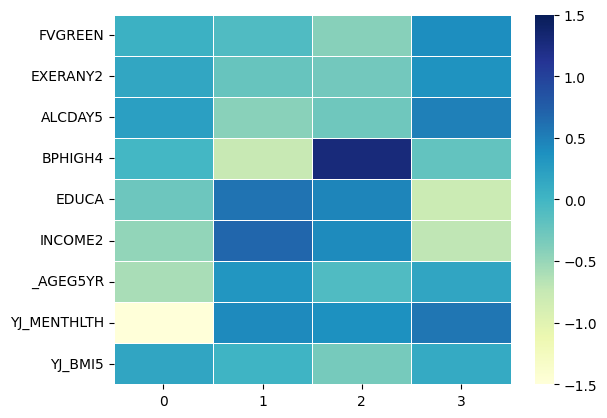

In [ ]:
#Generate heatmap for Prediabetic Males

# Prepare to generate heatmap
import seaborn as sns
# Show heatmap of clusters.
# "clust_means.T" means that we will transpose the 'clust_means' DataFrame,
# so that the rows become columns, and the columns become rows.
# Each column is a cluster centroid,
# each row is a variable in the dataset,
# and the average value is represented as a color
print(sns.heatmap(clust_means_M.T,  linewidths=.5, cmap="YlGnBu", vmin=-1.5, vmax=1.5))

Heatmap Interpretation for Prediabetic Males:

Prediabetic Males

Cluster 1: Higher blood pressure and lower physical activity, both critical areas for prediabetes management. The largest cluster with 387 observations.
Cluster 3: Older, lower-income individuals with higher BMI and mental health challenges, indicating a group at greater risk for diabetes complications. The second largest cluster with 363 observations.
Cluster 2: Higher education and moderate lifestyle habits, possibly more health-conscious. Second smallest cluster with 291 observations.
Cluster 0: Generally healthy, with fewer mental health and physical health challenges. Smallest cluster with 279 observations.




Overall, it seems that a higher percentage of males that are affected by prediabetes are affected by health concerns such as high blood pressure, low physical activity, higher BMI and mental health challenges. Lower income and increasing insulin resistance with age may have a part to play in this too.

<Axes: >

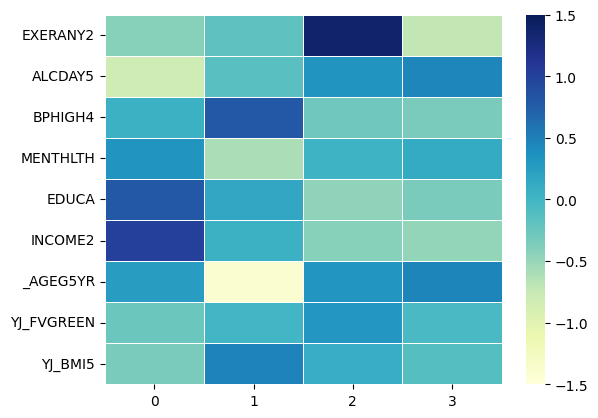

In [ ]:
#Generate heatmap for Prediabetic Females

# Prepare to generate heatmap
import seaborn as sns
# Show heatmap of clusters.
# "clust_means.T" means that we will transpose the 'clust_means' DataFrame,
# so that the rows become columns, and the columns become rows.
# Each column is a cluster centroid,
# each row is a variable in the dataset,
# and the average value is represented as a color
sns.heatmap(clust_means_F.T,  linewidths=.5, cmap="YlGnBu",vmin=-1.5,vmax=1.5)


Heatmap Interpretation (for Prediabetic Females):

Cluster 3 (549 observations): High exercise, lower education, moderate mental health challenges, lower income.
Cluster 2 (467 observations): Higher income, moderate blood pressure, low alcohol use.
Cluster 0 (430 observations): Educated, moderate BMI, lower income.
Cluster 1 (372 observations): Low exercise, higher BMI, more mental health challenges, older.

Overall, it seems that there is a highest proportions of women affected by prediabetes in this dataset have it in spite of high exercise, high income, moderate blood pressure & BMI and low alcohol intake. Lower education too seems to be a repeating factor within these clusters.

This may signal women having a higher innate susceptibility to prediabetes. Studies seem to support this by saying that changing hormones may affect the way womens' bodies use insulin.

# Non-Diabetic Clustering (Whole) : Si Yu

## Step 1: Select variables for clustering, also split df into male and female

In [ ]:
# List of columns to include in the new DataFrame
columns_to_include = [
    'FVGREEN', 'EXERANY2', 'ALCDAY5', 'BPHIGH4', '_BMI5',
    'MENTHLTH', 'EDUCA', 'INCOME2', '_AGEG5YR', 'SEX','diabetic_type'
]

# Create a new DataFrame with only the specified columns
clustering_df = cleaned_diabetes_df[columns_to_include]

#Create DataFrame for non-diabetic
non_diabetic_df = clustering_df[clustering_df['diabetic_type'] == 'non-diabetic']
non_diabetic_df=non_diabetic_df.drop(['diabetic_type'], axis = 1)

# Convert all columns in the DataFrame to numeric types
non_diabetic_df = non_diabetic_df.apply(pd.to_numeric, errors='coerce')

# Create a DataFrame for males where SEX == 1
clustering_male_non_diabetic_df = non_diabetic_df[non_diabetic_df['SEX'] == 1]

# Create a DataFrame for females where SEX == 2
clustering_female_non_diabetic_df = non_diabetic_df[non_diabetic_df['SEX'] == 2]

# Display the first few rows of both DataFrames
print("Male DataFrame:")
print(clustering_male_non_diabetic_df.head())

print("\nFemale DataFrame:")
print(clustering_female_non_diabetic_df.info())

non_diabetic_df.describe()


Male DataFrame:
    FVGREEN  EXERANY2  ALCDAY5  BPHIGH4   _BMI5  MENTHLTH  EDUCA  INCOME2  \
9     205.0       1.0    888.0      1.0  2522.0      88.0    6.0      8.0   
19    203.0       2.0    888.0      3.0  2407.0      88.0    4.0      3.0   
23    555.0       2.0    888.0      3.0  3067.0      88.0    2.0      3.0   
29    555.0       1.0    888.0      1.0  1438.0      15.0    3.0      2.0   
43    305.0       2.0    225.0      3.0  2800.0      10.0    6.0      8.0   

    _AGEG5YR  SEX  
9       10.0  1.0  
19       8.0  1.0  
23      12.0  1.0  
29      10.0  1.0  
43       4.0  1.0  

Female DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 88435 entries, 5 to 441452
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FVGREEN   88435 non-null  float64
 1   EXERANY2  88435 non-null  float64
 2   ALCDAY5   88435 non-null  float64
 3   BPHIGH4   88435 non-null  float64
 4   _BMI5     88435 non-null  float64
 5  

,FVGREEN,EXERANY2,ALCDAY5,BPHIGH4,_BMI5,MENTHLTH,EDUCA,INCOME2,_AGEG5YR,SEX
count,159437.000000,159437.000000,159437.000000,159437.000000,159437.000000,159437.000000,159437.000000,159437.000000,159437.000000,159437.000000
mean,246.680589,1.234983,492.613672,2.314946,2747.318157,64.475642,5.000521,5.810245,7.298670,1.554670
std,114.847345,0.423990,353.828386,0.960585,635.229008,36.216207,1.014419,2.210953,3.733069,0.497004
min,101.000000,1.000000,101.000000,1.000000,1205.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,201.000000,1.000000,202.000000,1.000000,2349.000000,21.000000,4.000000,4.000000,4.000000,1.000000
50%,204.000000,1.000000,220.000000,3.000000,2652.000000,88.000000,5.000000,6.000000,8.000000,2.000000
75%,310.000000,1.000000,888.000000,3.000000,3013.000000,88.000000,6.000000,8.000000,11.000000,2.000000
max,555.000000,2.000000,888.000000,4.000000,9765.000000,88.000000,6.000000,8.000000,13.000000,2.000000


## Step 2: Check for highly skewed variables and transformed them

In [ ]:
non_diabetic_df.skew()

# #Seeing as FVGREEN, EXERANY2, _BMI5 are highly skewed variables with skew > 1, we will transform it.


# non_diabetic_df['Log_FVGREEN'] = np.log(non_diabetic_df['FVGREEN'])
# non_diabetic_df['Log_EXERANY2'] = np.log(non_diabetic_df['EXERANY2'])
# non_diabetic_df['Log_BMI5'] = np.log(non_diabetic_df['_BMI5'])

# #Check for skew after log transformation
# non_diabetic_df.skew()

# #Since Log_EXERANY2 is still skewed, we will try other transformation

# #Try 1: RobustScaler

# from sklearn.preprocessing import RobustScaler

# # Create a RobustScaler
# scaler = RobustScaler()

# # Apply the scaling
# non_diabetic_df[['RS_FVGREEN', 'RS_EXERANY2', 'RS_BMI5']] = scaler.fit_transform(non_diabetic_df[['FVGREEN', 'EXERANY2', '_BMI5']])
# #Check for skew after transformation
# non_diabetic_df.skew()

# #Results: All variables are still skewed

# #Try 2: Winsorizing (capping extreme values)
# from scipy.stats.mstats import winsorize

# # Apply Winsorizing with limits, e.g., capping 5% of extreme values
# non_diabetic_df['Winsorized_FVGREEN'] = winsorize(non_diabetic_df['FVGREEN'], limits=[0.05, 0.05])
# non_diabetic_df['Winsorized_EXERANY2'] = winsorize(non_diabetic_df['EXERANY2'], limits=[0.05, 0.05])
# non_diabetic_df['Winsorized_BMI5'] = winsorize(non_diabetic_df['_BMI5'], limits=[0.05, 0.05])
# #Check for skew after transformation
# non_diabetic_df.skew()

# #Results: Winsorized_FVGREEN,Winsorized_EXERANY2 are still skewed

#Try 3:  Yeo-Johnson Transformation
from sklearn.preprocessing import PowerTransformer

# Create a Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation
non_diabetic_df[['YJ_FVGREEN', 'YJ_EXERANY2', 'YJ_BMI5']] = pt.fit_transform(non_diabetic_df[['FVGREEN', 'EXERANY2', '_BMI5']])
#Check for skew after transformation
non_diabetic_df.skew()

#Results: EXERANY2 still skewed, since like transformation has not much effect

#Choose the Yeo-Johnson Transformation as it leads to most difference in decreasing skewness

#Drop original variables
non_diabetic_df_transformed = non_diabetic_df.drop(['FVGREEN', 'EXERANY2', '_BMI5'], axis=1)
print(non_diabetic_df_transformed)

        ALCDAY5  BPHIGH4  MENTHLTH  EDUCA  INCOME2  _AGEG5YR  SEX  YJ_FVGREEN  \
5         888.0      1.0      88.0    3.0      6.0      11.0  2.0   -1.579986   
9         888.0      1.0      88.0    6.0      8.0      10.0  1.0   -0.209633   
15        202.0      1.0      88.0    4.0      4.0      11.0  2.0    0.760370   
19        888.0      3.0      88.0    4.0      3.0       8.0  1.0   -0.230010   
22        888.0      1.0      88.0    5.0      1.0      10.0  2.0   -0.240258   
...         ...      ...       ...    ...      ...       ...  ...         ...   
441446    888.0      1.0      88.0    2.0      1.0      12.0  1.0   -0.230010   
441447    203.0      3.0      88.0    5.0      1.0       6.0  1.0   -0.230010   
441448    218.0      1.0      14.0    6.0      8.0       3.0  1.0   -0.230010   
441449    888.0      3.0      88.0    6.0      5.0       3.0  2.0    0.760370   
441452    888.0      3.0      88.0    5.0      2.0       2.0  2.0    0.636666   

        YJ_EXERANY2   YJ_BM

## Step 3: Deciding the optimal clusters with Elbow, Silhouette and Euclidean Distance Plots

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_clustering_df = scaler.fit_transform(non_diabetic_df_transformed)

# Create a new dataset, using the scaled dataset, with the same column names as the transformed dataset
non_diabetic_df_prepared = pd.DataFrame(scaled_clustering_df, columns = non_diabetic_df_transformed.columns)


# Step 2: Define a range of possible clusters for evaluation
range_n_clusters = list(range(2, 11))  # You can adjust the range

# Step 3: Elbow Method, Silhouette Score, and Euclidean distance calculation
SSE = []
silhouette_avg = []
euclidean_distances = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_clustering_df)

    # Inertia (Elbow Method)
    SSE.append(kmeans.inertia_)

    # Silhouette Score
    silhouette_avg.append(silhouette_score(scaled_clustering_df, cluster_labels))

    # Euclidean distance calculation for all clusters
    centers = kmeans.cluster_centers_
    distances = cdist(scaled_clustering_df, centers, 'euclidean')
    euclidean_distances.append(np.mean(np.min(distances, axis=1)))

# Step 4: Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, SSE, 'bo-', label='SSE (Elbow)')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend()
plt.show()

# Step 5: Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, 'go-', label='Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

# Step 6: Plot Mean Euclidean Distance
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, euclidean_distances, 'ro-', label='Mean Euclidean Distance')
plt.title('Mean Euclidean Distance for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Euclidean Distance')
plt.legend()
plt.show()





KeyboardInterrupt: 

## Choosing Optimal Clusters

Elbow Method: The elbow in the inertia plot is somewhat visible around 4 or 5 clusters. This suggests that adding more clusters after this point does not significantly reduce the inertia, meaning 4 or 5 clusters could be optimal from the inertia perspective.

Silhouette Score: The silhouette score is highest at 2 clusters, but the score decreases sharply as the number of clusters increases. However, around 4 clusters, the silhouette score becomes more stable, though not very high. This might suggest that 4 clusters balance cluster separation and compactness better than others.

Hence, we choose 4 clusters.

## Step 4: Clustering with chosen number of clusters

In [ ]:
# Step 1: Choose the optimal number of clusters based on the results
optimal_n_clusters = 4

# Step 2: Perform KMeans clustering with the optimal number of clusters

model = KMeans(n_clusters = optimal_n_clusters, max_iter=300, tol=0.0001, n_init=10, random_state=99)
model.fit(scaled_clustering_df)

# Print the SSE, number of interations run, and the centroids
print("Attributes of the clustering solution for k=3:")
print("SSE :", round(model.inertia_, 1))
print("Num of iterations :" , model.n_iter_)
print("\nCluster centers :" , model.cluster_centers_)

# Therefore the clustering solution converged: as 31 iterations < max_iter which is 300

between_ss = SSE[0] - model.inertia_
improvement = (between_ss / SSE[0])*100
print('The improvement of SSE due to clustering (k=3) is: ' + str(round(improvement,2)) + '%')

non_diabetic_df_transformed['Cluster'] = kmeans.fit_predict(scaled_clustering_df)

print(f"Optimal number of clusters: {optimal_n_clusters}")
print(non_diabetic_df_transformed.head())

Attributes of the clustering solution for k=3:
SSE : 1166457.4
Num of iterations : 14

Cluster centers : [[-0.31605967  0.30718479 -1.56878924  0.30482598  0.21236346 -0.56694399
   0.09874402 -0.07863456 -0.368953   -0.10366811]
 [ 0.62723504 -0.42666764  0.31623872 -0.65993528 -0.74979352  0.47343834
   0.19820389  0.11010558 -0.55422077  0.06677413]
 [ 0.37974441 -0.28085705  0.04045747 -0.50673    -0.49424579  0.26939162
   0.09143883  0.31298294  1.80433513  0.21886551]
 [-0.44625607  0.26503513  0.64711076  0.54620361  0.64872392 -0.14389488
  -0.23544147 -0.2061404  -0.46668894 -0.11040109]]
The improvement of SSE due to clustering (k=3) is: 14.9%
Optimal number of clusters: 4
    ALCDAY5  BPHIGH4  MENTHLTH  EDUCA  INCOME2  _AGEG5YR  SEX  YJ_FVGREEN  \
5     888.0      1.0      88.0    3.0      6.0      11.0  2.0   -1.579986   
9     888.0      1.0      88.0    6.0      8.0      10.0  1.0   -0.209633   
15    202.0      1.0      88.0    4.0      4.0      11.0  2.0    0.760370   

## Step 5: Clusters Profiling

In [ ]:
# Add a new "cluster" column to the original dataset to indicate in which cluster each record belongs to
non_diabetic_df['cluster'] = model.labels_

# Show all possible "cluster" values and how often each one occurs
cluster_counts = non_diabetic_df['cluster'].value_counts()
print("Cluster Counts:\n", cluster_counts)

# Calculate the proportion of males in each cluster
# Assuming 'sex' column is coded as 1 for male and 2 for female
proportion_males = non_diabetic_df.groupby('cluster').agg(
    total=('SEX', 'count'),
    males=('SEX', lambda x: (x == 1).sum())  # Count of males
).reset_index()

# Calculate the proportion of males in each cluster
proportion_males['proportion_males'] = proportion_males['males'] / proportion_males['total']

# Show the result
print("Proportion of Males in Each Cluster:\n", proportion_males)


Cluster Counts:
 cluster
3    57460
1    37133
2    32833
0    32011
Name: count, dtype: int64
Proportion of Males in Each Cluster:
    cluster  total  males  proportion_males
0        0  32011  12682          0.396176
1        1  37133  12897          0.347319
2        2  32833  13135          0.400055
3        3  57460  32288          0.561921


Cluster 3 is the largest group, accounting for 36.04% of the records. Cluster 0 accounts for 20.10%, cluster 1 accounts for 23.29%, cluster 2 accounts for 20.59%

## Step 6: Heatmap Generation

    ALCDAY5   BPHIGH4  MENTHLTH     EDUCA   INCOME2  _AGEG5YR       SEX  \
0 -0.316060  0.307185 -1.568789  0.304826  0.212363 -0.566944  0.098744   
1  0.627235 -0.426668  0.316239 -0.659935 -0.749794  0.473438  0.198204   
2  0.379744 -0.280857  0.040457 -0.506730 -0.494246  0.269392  0.091439   
3 -0.446256  0.265035  0.647111  0.546204  0.648724 -0.143895 -0.235441   

   YJ_FVGREEN  YJ_EXERANY2   YJ_BMI5  
0   -0.078635    -0.368953 -0.103668  
1    0.110106    -0.554221  0.066774  
2    0.312983     1.804335  0.218866  
3   -0.206140    -0.466689 -0.110401  


<Axes: >

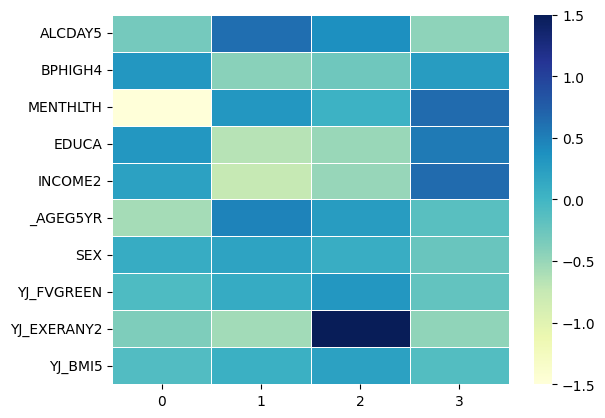

In [ ]:
#Cluster Profiling
# Show cluster centroids
model.cluster_centers_
# Create a DataFrame of cluster centroids.
clust_means = pd.DataFrame(model.cluster_centers_, columns=non_diabetic_df_prepared.columns)
print(clust_means)

#Generate heatmap

# Prepare to generate heatmap
import seaborn as sns
# Show heatmap of clusters.
# "clust_means.T" means that we will transpose the 'clust_means' DataFrame,
# so that the rows become columns, and the columns become rows.
# Each column is a cluster centroid,
# each row is a variable in the dataset,
# and the average value is represented as a color
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu", vmin=-1.5,vmax=1.5)

## Cluster Interpretation

**Cluster 0:** Consists of individuals who drink slightly **less than average alcohol** (ALCDAY5) and are somewhat **more likely to have high blood pressure** (BPHIGH4). They experience far fewer days of poor mental health (MENTHLTH) compared to others, indicating very **good mental health** overall. This cluster also features a **higher than average education level** (EDUCA) and a **household income that is slightly above average** (INCOME2). The individuals in this group are **younger than average** (_AGEG5YR) and have a slightly **lower intake of green vegetables** (YJ_FVGREEN) while being **less physically active**, engaging in less exercise (YJ_EXERANY2). Finally, their body mass index (BMI) is slightly below average (YJ_BMI5), indicating a **healthier weight**.

**Cluster 1:** Comprises **older** individuals who **consume significantly more alcohol** (ALCDAY5) compared to other groups, yet they are **less likely to experience high blood pressure** (BPHIGH4). They report experiencing **more poor mental health days** (MENTHLTH), though the level of distress remains moderate when compared to other clusters. This group generally exhibits **lower educational attainment** (EDUCA) and has a **household income that is below average** (INCOME2). They **consume slightly more green vegetables** (YJ_FVGREEN) but **engage in less physical activity** (YJ_EXERANY2), which could contribute to their overall health profile. Additionally, their **body mass index (BMI) is slightly above average** (YJ_BMI5).

**Cluster 2:** Comprised of **older** individuals who **drink alcohol moderately** (ALCDAY5) and are **less likely to have high blood pressure** (BPHIGH4). Their **mental health (MENTHLTH) is close to average**, indicating a generally stable state. This cluster is characterized by **lower education levels** (EDUCA) and **below-average household income** (INCOME2). Notably, individuals in Cluster 2 **consume more green vegetables** (YJ_FVGREEN) and are significantly **more physically active** (YJ_EXERANY2) compared to other clusters. However, their **body mass index (BMI) is slightly higher than average** (YJ_BMI5).

**Cluster 3:** Consists of **slightly younger** individuals who drink the **least alcohol** (ALCDAY5) among the groups studied. Despite their low alcohol consumption, they are somewhat **more likely to experience high blood pressure** (BPHIGH4). This cluster faces **significant mental health challenges**, as indicated by their high number of poor mental health days (MENTHLTH). Individuals in Cluster 3 exhibit **higher educational attainment** (EDUCA) and have a **higher household income** (INCOME2). However, this group **consumes fewer green vegetables** (YJ_FVGREEN) and is **less physically active**, engaging in less exercise (YJ_EXERANY2). Their body mass index **(BMI) is slightly below average** (YJ_BMI5), suggesting that while they may maintain a healthier weight

# Non-Diabetic Clustering (Female)

## Step 1: Check for skewness and transform accordingly

In [ ]:
clustering_female_non_diabetic_df.skew()

# #Seeing as FVGREEN, EXERANY2, _BMI5 are highly skewed variables with skew > 1, we will transform it.


# clustering_female_non_diabetic_df['Log_FVGREEN'] = np.log(clustering_female_non_diabetic_df['FVGREEN'])
# clustering_female_non_diabetic_df['Log_EXERANY2'] = np.log(clustering_female_non_diabetic_df['EXERANY2'])
# clustering_female_non_diabetic_df['Log_BMI5'] = np.log(clustering_female_non_diabetic_df['_BMI5'])

# #Check for skew after log transformation
# clustering_female_non_diabetic_df.skew()

# #Since Log_EXERANY2 is still skewed, we will try other transformation

# # Try 1: RobustScaler
# from sklearn.preprocessing import RobustScaler

# # Create a RobustScaler
# scaler = RobustScaler()

# # Apply the scaling
# clustering_female_non_diabetic_df[['RS_FVGREEN', 'RS_EXERANY2', 'RS_BMI5']] = scaler.fit_transform(clustering_female_non_diabetic_df[['FVGREEN', 'EXERANY2', '_BMI5']])
# # Check for skew after transformation
# print(clustering_female_non_diabetic_df.skew())

# # Results: All variables are still skewed

# # Try 2: Winsorizing (capping extreme values)
# from scipy.stats.mstats import winsorize

# # Apply Winsorizing with limits, e.g., capping 5% of extreme values
# clustering_female_non_diabetic_df['Winsorized_FVGREEN'] = winsorize(clustering_female_non_diabetic_df['FVGREEN'], limits=[0.05, 0.05])
# clustering_female_non_diabetic_df['Winsorized_EXERANY2'] = winsorize(clustering_female_non_diabetic_df['EXERANY2'], limits=[0.05, 0.05])
# clustering_female_non_diabetic_df['Winsorized_BMI5'] = winsorize(clustering_female_non_diabetic_df['_BMI5'], limits=[0.05, 0.05])
# # Check for skew after transformation
# print(clustering_female_non_diabetic_df.skew())

# # Results: Winsorized_FVGREEN, Winsorized_EXERANY2 are still skewed

# Try 3: Yeo-Johnson Transformation
from sklearn.preprocessing import PowerTransformer

# Create a Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation
clustering_female_non_diabetic_df[['YJ_FVGREEN', 'YJ_EXERANY2', 'YJ_BMI5']] = pt.fit_transform(clustering_female_non_diabetic_df[['FVGREEN', 'EXERANY2', '_BMI5']])
# Check for skew after transformation
print(clustering_female_non_diabetic_df.skew())

# Results: EXERANY2 still skewed, since like all transformation has not much effect

# Choose the Yeo-Johnson Transformation as it leads to most difference in decreasing skewness

#Drop original variables
non_diabetic_df_transformed = clustering_female_non_diabetic_df.drop(['FVGREEN', 'EXERANY2', '_BMI5'], axis=1)
print(non_diabetic_df_transformed)

FVGREEN        1.058318
EXERANY2       1.156096
ALCDAY5       -0.022545
BPHIGH4       -0.631939
_BMI5          2.415927
MENTHLTH      -0.739387
EDUCA         -0.694998
INCOME2       -0.417694
_AGEG5YR      -0.157854
SEX            0.000000
YJ_FVGREEN    -0.012564
YJ_EXERANY2    1.156096
YJ_BMI5       -0.011320
dtype: float64
        ALCDAY5  BPHIGH4  MENTHLTH  EDUCA  INCOME2  _AGEG5YR  SEX  YJ_FVGREEN  \
5         888.0      1.0      88.0    3.0      6.0      11.0  2.0   -1.493472   
15        202.0      1.0      88.0    4.0      4.0      11.0  2.0    0.857745   
22        888.0      1.0      88.0    5.0      1.0      10.0  2.0   -0.129297   
32        888.0      1.0      88.0    4.0      4.0      11.0  2.0    0.765971   
34        888.0      3.0      30.0    6.0      2.0       4.0  2.0    2.131072   
...         ...      ...       ...    ...      ...       ...  ...         ...   
441426    202.0      3.0      88.0    6.0      2.0       5.0  2.0   -0.139580   
441428    888.0      3.0 

<ipython-input-62-5a59c5f30efa>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_female_non_diabetic_df[['YJ_FVGREEN', 'YJ_EXERANY2', 'YJ_BMI5']] = pt.fit_transform(clustering_female_non_diabetic_df[['FVGREEN', 'EXERANY2', '_BMI5']])
<ipython-input-62-5a59c5f30efa>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_female_non_diabetic_df[['YJ_FVGREEN', 'YJ_EXERANY2', 'YJ_BMI5']] = pt.fit_transform(clustering_female_non_diabetic_df[['FVGREEN', 'EXERANY2', '_BMI5']])
<ipython-input-62-5a

## Step 2: Deciding the optimal clusters with Elbow, Silhouette and Euclidean Distance Plots

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_clustering_df = scaler.fit_transform(non_diabetic_df_transformed)
# Create a new dataset, using the scaled dataset, with the same column names as the transformed dataset
non_diabetic_df_prepared = pd.DataFrame(scaled_clustering_df, columns = non_diabetic_df_transformed.columns)

# Step 2: Define a range of possible clusters for evaluation
range_n_clusters = list(range(2, 11))  # You can adjust the range

# Step 3: Elbow Method, Silhouette Score, and Euclidean distance calculation
SSE = []
silhouette_avg = []
euclidean_distances = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_clustering_df)

    # Inertia (Elbow Method)
    SSE.append(kmeans.inertia_)

    # Silhouette Score
    silhouette_avg.append(silhouette_score(scaled_clustering_df, cluster_labels))

    # Euclidean distance calculation for all clusters
    centers = kmeans.cluster_centers_
    distances = cdist(scaled_clustering_df, centers, 'euclidean')
    euclidean_distances.append(np.mean(np.min(distances, axis=1)))

# Step 4: Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, SSE, 'bo-', label='SSE (Elbow)')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend()
plt.show()

# Step 5: Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, 'go-', label='Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

# Step 6: Plot Mean Euclidean Distance
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, euclidean_distances, 'ro-', label='Mean Euclidean Distance')
plt.title('Mean Euclidean Distance for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Euclidean Distance')
plt.legend()
plt.show()





KeyboardInterrupt: 

From the elbow method in the upper plot, the SSE (Sum of Squared Errors) significantly drops up to 4 clusters, after which the rate of decrease slows down, indicating that 4 clusters might be an optimal choice.

The silhouette score plot in the lower graph shows that the highest score occurs at 2 clusters, but it dips sharply afterward, with small improvements around 6 clusters.

Considering both metrics, 4 clusters seem to be a good balance between compactness (SSE) and the silhouette score

## Step 4: Clustering with chosen number of clusters

In [ ]:
# Step 1: Choose the optimal number of clusters based on the results
optimal_n_clusters = 4

# Step 2: Perform KMeans clustering with the optimal number of clusters

model = KMeans(n_clusters = optimal_n_clusters, max_iter=300, tol=0.0001, n_init=10, random_state=99)
model.fit(scaled_clustering_df)

# Print the SSE, number of interations run, and the centroids
print("Attributes of the clustering solution for k=4:")
print("SSE :", round(model.inertia_, 1))
print("Num of iterations :" , model.n_iter_)
print("\nCluster centers :" , model.cluster_centers_)

# Therefore the clustering solution converged: as 32 iterations < max_iter which is 300

between_ss = SSE[0] - model.inertia_
improvement = (between_ss / SSE[0])*100
print('The improvement of SSE due to clustering (k=4) is: ' + str(round(improvement,2)) + '%')

non_diabetic_df_transformed['Cluster'] = kmeans.fit_predict(scaled_clustering_df)

print(f"Optimal number of clusters: {optimal_n_clusters}")
print(non_diabetic_df_transformed.head())

Attributes of the clustering solution for k=4:
SSE : 549254.1
Num of iterations : 32

Cluster centers : [[-0.4573505   0.43139603  0.71008802  0.58168103  0.6660866  -0.2469455
   0.         -0.30159819 -0.44075873 -0.26689981]
 [ 0.44094649 -0.37748793  0.04663124 -0.53891119 -0.54924941  0.33586443
   0.          0.35353857  1.73308293  0.29580993]
 [ 0.53254483 -0.57044996  0.31648438 -0.60011254 -0.63573573  0.55711208
   0.          0.14698964 -0.57700643  0.16608765]
 [-0.38046769  0.40098938 -1.4305832   0.37364647  0.30351043 -0.61071741
   0.         -0.07458285 -0.35470652 -0.09137566]]
The improvement of SSE due to clustering (k=4) is: 16.69%
Optimal number of clusters: 4
    ALCDAY5  BPHIGH4  MENTHLTH  EDUCA  INCOME2  _AGEG5YR  SEX  YJ_FVGREEN  \
5     888.0      1.0      88.0    3.0      6.0      11.0  2.0   -1.493472   
15    202.0      1.0      88.0    4.0      4.0      11.0  2.0    0.857745   
22    888.0      1.0      88.0    5.0      1.0      10.0  2.0   -0.129297   


## Step 5: Clusters Profiling

In [ ]:
# Add a new "cluster" column to the original dataset to indicate in which cluster each record belongs to
clustering_female_non_diabetic_df['cluster'] = model.labels_
clustering_female_non_diabetic_df

# Show all possible "cluster" values, and how often each one occurs
clustering_female_non_diabetic_df['cluster'].value_counts()

<ipython-input-65-c090d69b9554>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_female_non_diabetic_df['cluster'] = model.labels_


,count
cluster,
0,27937
2,22483
3,19441
1,18574


Cluster 0 is the largest among the records, accounting for 31.59%. Cluster 1 accounts for 21.00%, Cluster 2 accounts for 25.42%, Cluster 3 accounts for 21.98%

## Step 6: Heatmap Generation

    ALCDAY5   BPHIGH4  MENTHLTH     EDUCA   INCOME2  _AGEG5YR  SEX  \
0 -0.457350  0.431396  0.710088  0.581681  0.666087 -0.246945  0.0   
1  0.440946 -0.377488  0.046631 -0.538911 -0.549249  0.335864  0.0   
2  0.532545 -0.570450  0.316484 -0.600113 -0.635736  0.557112  0.0   
3 -0.380468  0.400989 -1.430583  0.373646  0.303510 -0.610717  0.0   

   YJ_FVGREEN  YJ_EXERANY2   YJ_BMI5  
0   -0.301598    -0.440759 -0.266900  
1    0.353539     1.733083  0.295810  
2    0.146990    -0.577006  0.166088  
3   -0.074583    -0.354707 -0.091376  


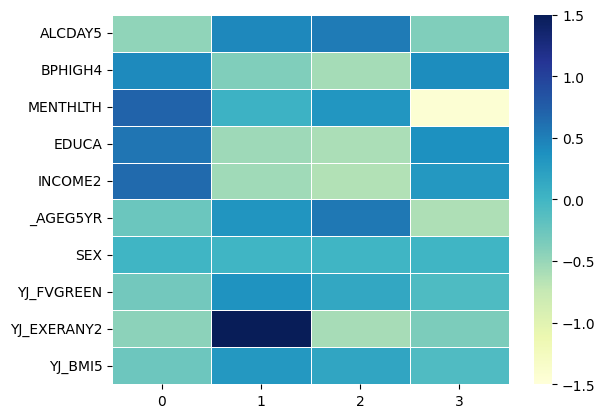

In [ ]:
# Cluster Profiling
# Show cluster centroids
model.cluster_centers_

# Create a DataFrame of cluster centroids.
clust_means = pd.DataFrame(model.cluster_centers_, columns=non_diabetic_df_prepared.columns)
print(clust_means)

# Prepare to generate heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Show heatmap of clusters with color bar scaled to -1.5 to 1.5
  # Optionally, adjust the size of the plot
sns.heatmap(clust_means.T, linewidths=.5, cmap="YlGnBu", vmin=-1.5, vmax=1.5)

plt.show()


## Cluster Interpretation

### **Cluster 0:**
In Cluster 0, individuals exhibit **slightly lower alcohol consumption (ALCDAY5)** compared to average levels and are **more likely to have high blood pressure (BPHIGH4)**, indicating potential cardiovascular concerns. They experience **more days of poor mental health (MENTHLTH)**, suggesting challenges in mental well-being. This group has **above-average education levels (EDUCA)** and a **higher household income (INCOME2)**, indicating a stable socioeconomic status. The individuals in this cluster are **slightly younger (_AGEG5YR)** compared to others, which may play a role in their health profile. They show a **lower intake of green vegetables (YJ_FVGREEN)** and engage in **less physical activity (YJ_EXERANY2)**, which could negatively impact overall health. Their **BMI (YJ_BMI5)** is slightly below average, indicating a generally healthy weight.

### **Cluster 1:**
Cluster 1 individuals demonstrate **higher alcohol consumption (ALCDAY5)**, which could pose health risks. They are **less likely to have high blood pressure (BPHIGH4)**, suggesting a lower risk of hypertension. This group reports **average days of poor mental health (MENTHLTH)**, indicating moderate mental health. The group has **lower educational attainment (EDUCA)** and **below-average household income (INCOME2)**, which may influence their health and lifestyle negatively. The individuals are **older (_AGEG5YR)**, which could contribute to their overall health challenges. They consume **more green vegetables (YJ_FVGREEN)** and are **more physically active (YJ_EXERANY2)** than average. Their **BMI (YJ_BMI5)** is slightly above average, indicating a potential need for weight management.

### **Cluster 2:**
Individuals in Cluster 2 exhibit **moderate alcohol consumption (ALCDAY5)** and are **less likely to have high blood pressure (BPHIGH4)**, which is a positive indicator. They report **fewer days of poor mental health (MENTHLTH)**, suggesting relatively good mental health. This cluster has **lower education levels (EDUCA)** and **below-average household income (INCOME2)**, possibly influencing lifestyle choices. Members are **older (_AGEG5YR)**, potentially affecting their physical activity and health. They show a **moderate intake of green vegetables (YJ_FVGREEN)** and **engage in less physical activity (YJ_EXERANY2)**. Their **BMI (YJ_BMI5)** is slightly above average, suggesting some risk in weight management.

### **Cluster 3:**
In Cluster 3, individuals have **lower alcohol consumption (ALCDAY5)**, reflecting low-risk behavior. They are **more likely to have high blood pressure (BPHIGH4)**, which is a potential concern. This cluster experiences **significantly fewer days of poor mental health (MENTHLTH)**, indicating strong mental well-being. They have **above-average education levels (EDUCA)** and a **higher household income (INCOME2)**, suggesting better financial stability. Members are **younger (_AGEG5YR)**, contributing to more favorable health outcomes. However, they consume **fewer green vegetables (YJ_FVGREEN)** and engage in **less physical activity (YJ_EXERANY2)**, which could impact long-term health. Their **BMI (YJ_BMI5)** is slightly below average, indicating a generally healthy weight.

# Non-Diabetic Clustering (Male)

## Step 1: Check for skewness and transform accordingly

In [ ]:
# Check skewness of the DataFrame
clustering_male_non_diabetic_df.skew()

# # Seeing as EXERANY2, _BMI5, and MENTHLTH are highly skewed variables with skew > 1, we will transform them.

# # Transforming skewed variables
# clustering_male_non_diabetic_df['Log_EXERANY2'] = np.log(clustering_male_non_diabetic_df['EXERANY2'])
# clustering_male_non_diabetic_df['Log_BMI5'] = np.log(clustering_male_non_diabetic_df['_BMI5'])
# clustering_male_non_diabetic_df['Log_MENTHLTH'] = np.log(clustering_male_non_diabetic_df['MENTHLTH'])

# # Check for skew after log transformation
# print(clustering_male_non_diabetic_df.skew())

# # Since Log_EXERANY2, Log_MENTHLTH still skewed, we will try other transformations

# # Try 1: RobustScaler
# from sklearn.preprocessing import RobustScaler

# # Create a RobustScaler
# scaler = RobustScaler()

# # Apply the scaling
# clustering_male_non_diabetic_df[['RS_EXERANY2', 'RS_BMI5', 'RS_MENTHLTH']] = scaler.fit_transform(
#     clustering_male_non_diabetic_df[['EXERANY2', '_BMI5', 'MENTHLTH']]
# )
# # Check for skew after transformation
# print(clustering_male_non_diabetic_df.skew())

# Results: All variables are still skewed

# # Try 2: Winsorizing (capping extreme values)
# from scipy.stats.mstats import winsorize

# # Apply Winsorizing with limits, e.g., capping 5% of extreme values
# clustering_male_non_diabetic_df['Winsorized_EXERANY2'] = winsorize(clustering_male_non_diabetic_df['EXERANY2'], limits=[0.05, 0.05])
# clustering_male_non_diabetic_df['Winsorized_BMI5'] = winsorize(clustering_male_non_diabetic_df['_BMI5'], limits=[0.05, 0.05])
# clustering_male_non_diabetic_df['Winsorized_MENTHLTH'] = winsorize(clustering_male_non_diabetic_df['MENTHLTH'], limits=[0.05, 0.05])
# # Check for skew after transformation
# print(clustering_male_non_diabetic_df.skew())

# # Results: Winsorized_EXERANY2 and Winsorized_MENTHLTH are still skewed

# Try 3: Yeo-Johnson Transformation
from sklearn.preprocessing import PowerTransformer

# Create a Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation
clustering_male_non_diabetic_df[['YJ_EXERANY2', 'YJ_BMI5', 'YJ_MENTHLTH']] = pt.fit_transform(
    clustering_male_non_diabetic_df[['EXERANY2', '_BMI5', 'MENTHLTH']]
)
# Check for skew after transformation
print(clustering_male_non_diabetic_df.skew())

# Results: YJ_EXERANY2 and YJ_MENTHLTH still skewed

# # Choose the Yeo-Johnson Transformation as it leads to the most difference in decreasing skewness

# Drop original variables
non_diabetic_df_transformed = clustering_male_non_diabetic_df.drop(['EXERANY2', '_BMI5', 'MENTHLTH'], axis=1)
print(non_diabetic_df_transformed)


FVGREEN        0.963475
EXERANY2       1.376304
ALCDAY5        0.491161
BPHIGH4       -0.553009
_BMI5          2.741442
MENTHLTH      -1.209591
EDUCA         -0.781329
INCOME2       -0.797197
_AGEG5YR       0.012281
SEX            0.000000
YJ_EXERANY2    1.376304
YJ_BMI5       -0.073951
YJ_MENTHLTH   -1.174755
dtype: float64
        FVGREEN  ALCDAY5  BPHIGH4  EDUCA  INCOME2  _AGEG5YR  SEX  YJ_EXERANY2  \
9         205.0    888.0      1.0    6.0      8.0      10.0  1.0    -0.525754   
19        203.0    888.0      3.0    4.0      3.0       8.0  1.0     1.902029   
23        555.0    888.0      3.0    2.0      3.0      12.0  1.0     1.902029   
29        555.0    888.0      1.0    3.0      2.0      10.0  1.0    -0.525754   
43        305.0    225.0      3.0    6.0      8.0       4.0  1.0     1.902029   
...         ...      ...      ...    ...      ...       ...  ...          ...   
441411    101.0    201.0      3.0    3.0      1.0       3.0  1.0    -0.525754   
441435    555.0    208.0 

<ipython-input-44-5906e60c9f89>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_male_non_diabetic_df[['YJ_EXERANY2', 'YJ_BMI5', 'YJ_MENTHLTH']] = pt.fit_transform(
<ipython-input-44-5906e60c9f89>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_male_non_diabetic_df[['YJ_EXERANY2', 'YJ_BMI5', 'YJ_MENTHLTH']] = pt.fit_transform(
<ipython-input-44-5906e60c9f89>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

## Step 2: Deciding the optimal clusters with Elbow, Silhouette and Euclidean Distance Plots

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_clustering_df = scaler.fit_transform(non_diabetic_df_transformed)
# Create a new dataset, using the scaled dataset, with the same column names as the transformed dataset
non_diabetic_df_prepared = pd.DataFrame(scaled_clustering_df, columns = non_diabetic_df_transformed.columns)

# Step 2: Define a range of possible clusters for evaluation
range_n_clusters = list(range(2, 11))  # You can adjust the range

# Step 3: Elbow Method, Silhouette Score, and Euclidean distance calculation
SSE = []
silhouette_avg = []
euclidean_distances = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_clustering_df)

    # Inertia (Elbow Method)
    SSE.append(kmeans.inertia_)

    # Silhouette Score
    silhouette_avg.append(silhouette_score(scaled_clustering_df, cluster_labels))

    # Euclidean distance calculation for all clusters
    centers = kmeans.cluster_centers_
    distances = cdist(scaled_clustering_df, centers, 'euclidean')
    euclidean_distances.append(np.mean(np.min(distances, axis=1)))

# Step 4: Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, SSE, 'bo-', label='SSE (Elbow)')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend()
plt.show()

# Step 5: Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, 'go-', label='Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

# Step 6: Plot Mean Euclidean Distance
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, euclidean_distances, 'ro-', label='Mean Euclidean Distance')
plt.title('Mean Euclidean Distance for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Euclidean Distance')
plt.legend()
plt.show()





KeyboardInterrupt: 

Elbow Method: The SSE continues to decrease, but the elbow point seems to occur around 4 clusters, as the rate of SSE reduction slows beyond this point.

Silhouette Score: The silhouette score shows a steady increase, with a peak at 10 clusters.

Given these metrics:

The elbow method suggests 4 clusters as a potential optimal choice based on diminishing returns in SSE reduction.
The silhouette score shows the highest value at 10 clusters, indicating that 10 clusters may result in the best separation between clusters.
For simplicity and compactness, 4 clusters are considered.

## Step 4: Clustering with chosen number of clusters

In [ ]:
# Step 1: Choose the optimal number of clusters based on the results
optimal_n_clusters = 4

# Step 2: Perform KMeans clustering with the optimal number of clusters

model = KMeans(n_clusters = optimal_n_clusters, max_iter=300, tol=0.0001, n_init=10, random_state=99)
model.fit(scaled_clustering_df)

# Print the SSE, number of interations run, and the centroids
print("Attributes of the clustering solution for k=3:")
print("SSE :", round(model.inertia_, 1))
print("Num of iterations :" , model.n_iter_)
print("\nCluster centers :" , model.cluster_centers_)

# Therefore the clustering solution converged: as 31 iterations < max_iter which is 300

between_ss = SSE[0] - model.inertia_
improvement = (between_ss / SSE[0])*100
print('The improvement of SSE due to clustering (k=3) is: ' + str(round(improvement,2)) + '%')

non_diabetic_df_transformed['Cluster'] = kmeans.fit_predict(scaled_clustering_df)

print(f"Optimal number of clusters: {optimal_n_clusters}")
print(non_diabetic_df_transformed.head())

Attributes of the clustering solution for k=3:
SSE : 452266.6
Num of iterations : 22

Cluster centers : [[-6.71885461e-02 -1.82664940e-01  1.60688791e-01  1.30779866e-01
  -4.91195374e-04 -5.15260345e-01  0.00000000e+00 -1.87128805e-01
  -6.33607857e-02 -1.74911868e+00]
 [ 5.84041109e-01  6.72444290e-01 -1.68776276e-02 -1.04508617e+00
  -1.04346433e+00  1.71621916e-01  0.00000000e+00  8.57347726e-01
  -4.11910837e-02  1.49773972e-01]
 [-2.30112131e-01 -2.12603466e-01  7.37418415e-01  3.71003264e-01
   4.36014428e-01 -2.03561708e-01  0.00000000e+00 -3.07133284e-01
  -9.84261582e-02  5.77544386e-01]
 [-1.28673396e-01 -1.38885067e-01 -1.33967606e+00  2.87635283e-01
   2.97992494e-01  6.33375104e-01  0.00000000e+00 -1.59223456e-01
   2.58898215e-01  4.87546852e-01]]
The improvement of SSE due to clustering (k=3) is: 19.02%
Optimal number of clusters: 4
    FVGREEN  ALCDAY5  BPHIGH4  EDUCA  INCOME2  _AGEG5YR  SEX  YJ_EXERANY2  \
9     205.0    888.0      1.0    6.0      8.0      10.0  1.0  

## Step 5: Clusters Profiling

In [ ]:
# Add a new "cluster" column to the original dataset to indicate in which cluster each record belongs to
clustering_male_non_diabetic_df['cluster'] = model.labels_
clustering_male_non_diabetic_df

# Show all possible "cluster" values, and how often each one occurs
clustering_male_non_diabetic_df['cluster'].value_counts()

<ipython-input-47-f7e24488bbf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_male_non_diabetic_df['cluster'] = model.labels_


,count
cluster,
2,25833
3,15722
1,15248
0,14199


Cluster 2 accounts for the largest proportion of 36.38%. Cluster 0 consists 20.00%, cluster 1 consists of 21.48%, cluster 3 consists of 22.14% of the records

## Step 6: Heatmap Generation

    FVGREEN   ALCDAY5   BPHIGH4     EDUCA   INCOME2  _AGEG5YR  SEX  \
0 -0.067189 -0.182665  0.160689  0.130780 -0.000491 -0.515260  0.0   
1  0.584041  0.672444 -0.016878 -1.045086 -1.043464  0.171622  0.0   
2 -0.230112 -0.212603  0.737418  0.371003  0.436014 -0.203562  0.0   
3 -0.128673 -0.138885 -1.339676  0.287635  0.297992  0.633375  0.0   

   YJ_EXERANY2   YJ_BMI5  YJ_MENTHLTH  
0    -0.187129 -0.063361    -1.749119  
1     0.857348 -0.041191     0.149774  
2    -0.307133 -0.098426     0.577544  
3    -0.159223  0.258898     0.487547  


<Axes: >

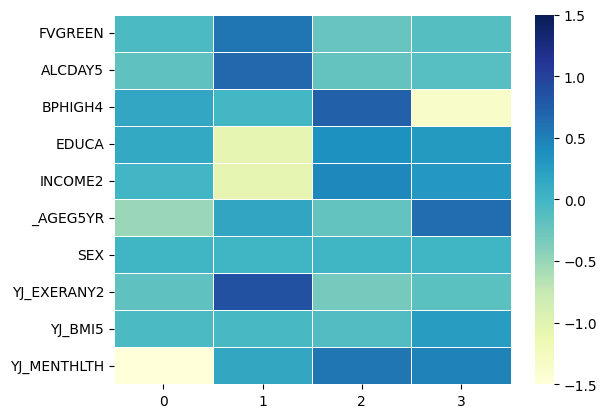

In [ ]:
#Cluster Profiling
# Show cluster centroids
model.cluster_centers_
# Create a DataFrame of cluster centroids.
clust_means = pd.DataFrame(model.cluster_centers_, columns=non_diabetic_df_prepared.columns)
print(clust_means)

#Generate heatmap

# Prepare to generate heatmap
import seaborn as sns
# Show heatmap of clusters.
# "clust_means.T" means that we will transpose the 'clust_means' DataFrame,
# so that the rows become columns, and the columns become rows.
# Each column is a cluster centroid,
# each row is a variable in the dataset,
# and the average value is represented as a color
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu", vmin=-1.5, vmax=1.5)

## Cluster Interpretation

### **Cluster 0:**
Individuals in Cluster 0 exhibit a **slightly lower intake of green vegetables (FVGREEN)** and **lower alcohol consumption (ALCDAY5)**, indicating a moderate lifestyle choice. They are **somewhat more likely to have high blood pressure (BPHIGH4)**, suggesting potential health concerns. This group has a **slightly higher education level (EDUCA)** and **household income near average (INCOME2)**, reflecting stable socioeconomic status. The individuals in this cluster are **younger than average (_AGEG5YR)**, which may contribute to their health profile. They engage in **less physical activity (YJ_EXERANY2)** and have a **slightly below-average BMI (YJ_BMI5)**, indicating a generally healthy weight. Additionally, they experience **significantly more poor mental health days (YJ_MENTHLTH)**, suggesting a need for mental health support.

### **Cluster 1:**
Cluster 1 individuals demonstrate a **high intake of green vegetables (FVGREEN)** and **significantly higher alcohol consumption (ALCDAY5)**, reflecting a lifestyle that may pose some health risks. They are **less likely to experience high blood pressure (BPHIGH4)**, indicating better cardiovascular health. This group has a **lower education level (EDUCA)** and **household income significantly below average (INCOME2)**, which may impact their overall well-being. The individuals are **younger than average (_AGEG5YR)**, which might contribute to their lifestyle choices. They are **highly physically active (YJ_EXERANY2)** but have a **slightly below-average BMI (YJ_BMI5)**, indicating a generally healthy weight. Their **mental health (YJ_MENTHLTH)** is relatively stable, showing minimal issues.

### **Cluster 2:**
In Cluster 2, individuals show a **lower intake of green vegetables (FVGREEN)** and **lower alcohol consumption (ALCDAY5)**, indicating healthier dietary choices. They are **more likely to have high blood pressure (BPHIGH4)**, suggesting health risks that need monitoring. This group has a **moderately higher education level (EDUCA)** and **household income above average (INCOME2)**, reflecting a better socioeconomic status. The members of this cluster are **younger than average (_AGEG5YR)**, which may influence their health outcomes positively. They engage in **less physical activity (YJ_EXERANY2)** and have a **slightly below-average BMI (YJ_BMI5)**, indicating a generally healthy weight. Their **mental health (YJ_MENTHLTH)** is notably positive, reflecting a generally stable mental state.

### **Cluster 3:**
Individuals in Cluster 3 demonstrate a **lower intake of green vegetables (FVGREEN)** and **low alcohol consumption (ALCDAY5)**, reflecting healthier lifestyle choices. They are **significantly more likely to experience high blood pressure (BPHIGH4)**, which is a health concern. This cluster has a **moderately high education level (EDUCA)** and **household income that is slightly above average (INCOME2)**, indicating a stable financial situation. The members of this cluster are **older (_AGEG5YR)**, which may contribute to their overall health profile. They engage in **less physical activity (YJ_EXERANY2)** and have a **slightly above-average BMI (YJ_BMI5)**, indicating some potential weight concerns. Their **mental health (YJ_MENTHLTH)** is positively skewed, suggesting a generally stable mental state.

# Diabetic Clustering (Whole) : Si Yu

## Step 1: Select variables for clustering, also split df into male and female

In [ ]:
# List of columns to include in the new DataFrame
columns_to_include = [
    'FVGREEN', 'EXERANY2', 'ALCDAY5', 'BPHIGH4', '_BMI5',
    'MENTHLTH', 'EDUCA', 'INCOME2', '_AGEG5YR', 'SEX', 'diabetic_type'
]

# Create a new DataFrame with only the specified columns
clustering_df = cleaned_diabetes_df[columns_to_include]

# Create DataFrame for diabetic individuals
diabetic_df = clustering_df[clustering_df['diabetic_type'] == 'diabetic']
diabetic_df = diabetic_df.drop(['diabetic_type'], axis=1)

# Convert all columns in the DataFrame to numeric types
diabetic_df = diabetic_df.apply(pd.to_numeric, errors='coerce')

# Create a DataFrame for males where SEX == 1
clustering_male_diabetic_df = diabetic_df[diabetic_df['SEX'] == 1]

# Create a DataFrame for females where SEX == 2
clustering_female_diabetic_df = diabetic_df[diabetic_df['SEX'] == 2]

# Display the first few rows of both DataFrames
print("Male DataFrame:")
print(clustering_male_diabetic_df.head())

print("\nFemale DataFrame:")
print(clustering_female_diabetic_df.info())

diabetic_df.describe()


Male DataFrame:
     FVGREEN  EXERANY2  ALCDAY5  BPHIGH4   _BMI5  MENTHLTH  EDUCA  INCOME2  \
21     310.0       1.0    201.0      3.0  2468.0      88.0    6.0      8.0   
67     302.0       2.0    888.0      1.0  3723.0      88.0    6.0      5.0   
69     310.0       2.0    888.0      1.0  2789.0      88.0    2.0      4.0   
155    201.0       1.0    888.0      1.0  3496.0      88.0    5.0      8.0   
255    207.0       1.0    888.0      1.0  2441.0      88.0    4.0      6.0   

     _AGEG5YR  SEX  
21       13.0  1.0  
67       10.0  1.0  
69       12.0  1.0  
155       8.0  1.0  
255      12.0  1.0  

Female DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 12934 entries, 33 to 441451
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FVGREEN   12934 non-null  float64
 1   EXERANY2  12934 non-null  float64
 2   ALCDAY5   12934 non-null  float64
 3   BPHIGH4   12934 non-null  float64
 4   _BMI5     12934 non-null 

,FVGREEN,EXERANY2,ALCDAY5,BPHIGH4,_BMI5,MENTHLTH,EDUCA,INCOME2,_AGEG5YR,SEX
count,24018.000000,24018.000000,24018.000000,24018.000000,24018.000000,24018.000000,24018.000000,24018.000000,24018.000000,24018.000000
mean,263.498001,1.386585,666.114789,1.492880,3153.994088,64.669206,4.630194,4.805604,9.800566,1.538513
std,123.478234,0.486977,328.668936,0.870785,732.332628,35.120684,1.099182,2.206266,2.586318,0.498525
min,101.000000,1.000000,101.000000,1.000000,1263.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,202.000000,1.000000,206.000000,1.000000,2663.000000,30.000000,4.000000,3.000000,8.000000,1.000000
50%,205.000000,1.000000,888.000000,1.000000,3030.000000,88.000000,5.000000,5.000000,10.000000,2.000000
75%,310.000000,2.000000,888.000000,1.000000,3497.000000,88.000000,6.000000,6.000000,12.000000,2.000000
max,555.000000,2.000000,888.000000,4.000000,9765.000000,88.000000,6.000000,8.000000,13.000000,2.000000


## Step 2: Check for highly skewed variables and transformed them

In [ ]:
diabetic_df.skew()

# # Seeing as BPHIGH4, _BMI5 are highly skewed variables with skew > 1, we will transform it.


# # Perform log transformation on BPHIGH4 and _BMI5
# diabetic_df['Log_BPHIGH4'] = np.log(diabetic_df['BPHIGH4'])
# diabetic_df['Log_BMI5'] = np.log(diabetic_df['_BMI5'])

# # Check for skew after log transformation
# print(diabetic_df[['BPHIGH4', '_BMI5', 'Log_BPHIGH4', 'Log_BMI5']].skew())

# # Since Log_BPHIGH4 is still skewed, we will try other transformations

# # Try 1: RobustScaler
# from sklearn.preprocessing import RobustScaler

# # Create a RobustScaler
# scaler = RobustScaler()

# # Apply the scaling
# diabetic_df[['RS_BPHIGH4', 'RS_BMI5']] = scaler.fit_transform(diabetic_df[['BPHIGH4', '_BMI5']])
# # Check for skew after transformation
# print(diabetic_df[['BPHIGH4', '_BMI5', 'RS_BPHIGH4', 'RS_BMI5']].skew())

# # Results: All variables are still skewed

# # Try 2: Winsorizing (capping extreme values)
# from scipy.stats.mstats import winsorize

# # Apply Winsorizing with limits, e.g., capping 5% of extreme values
# diabetic_df['Winsorized_BPHIGH4'] = winsorize(diabetic_df['BPHIGH4'], limits=[0.05, 0.05])
# diabetic_df['Winsorized_BMI5'] = winsorize(diabetic_df['_BMI5'], limits=[0.05, 0.05])
# # Check for skew after transformation
# print(diabetic_df[['BPHIGH4', '_BMI5', 'Winsorized_BPHIGH4', 'Winsorized_BMI5']].skew())

# Results: Winsorized_BPHIGH4 is still skewed

# Try 3: Yeo-Johnson Transformation
from sklearn.preprocessing import PowerTransformer

# Create a Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation
diabetic_df[['YJ_BPHIGH4', 'YJ_BMI5']] = pt.fit_transform(diabetic_df[['BPHIGH4', '_BMI5']])
# Check for skew after transformation
print(diabetic_df[['BPHIGH4', '_BMI5', 'YJ_BPHIGH4', 'YJ_BMI5']].skew())

#Results: If any variables are still skewed, note the transformation effects, choose Yeo-Johnson transformation for reducing skewness the most

# Drop original variables
diabetic_df_transformed = diabetic_df.drop(['BPHIGH4', '_BMI5'], axis=1)
print(diabetic_df_transformed)


BPHIGH4       1.234186
_BMI5         1.657890
YJ_BPHIGH4    1.186051
YJ_BMI5      -0.022544
dtype: float64
        FVGREEN  EXERANY2  ALCDAY5  MENTHLTH  EDUCA  INCOME2  _AGEG5YR  SEX  \
21        310.0       1.0    201.0      88.0    6.0      8.0      13.0  1.0   
33        301.0       2.0    201.0      88.0    4.0      6.0      11.0  2.0   
56        101.0       1.0    888.0      88.0    5.0      4.0      13.0  2.0   
67        302.0       2.0    888.0      88.0    6.0      5.0      10.0  1.0   
69        310.0       2.0    888.0      88.0    2.0      4.0      12.0  1.0   
...         ...       ...      ...       ...    ...      ...       ...  ...   
441407    201.0       1.0    888.0      88.0    2.0      3.0      11.0  1.0   
441419    101.0       2.0    888.0      88.0    4.0      1.0       6.0  2.0   
441432    204.0       2.0    888.0      88.0    3.0      6.0      10.0  1.0   
441436    303.0       2.0    888.0      15.0    6.0      4.0      13.0  2.0   
441451    555.0       2.

## Step 3: Deciding the optimal clusters with Elbow, Silhouette and Euclidean Distance Plots

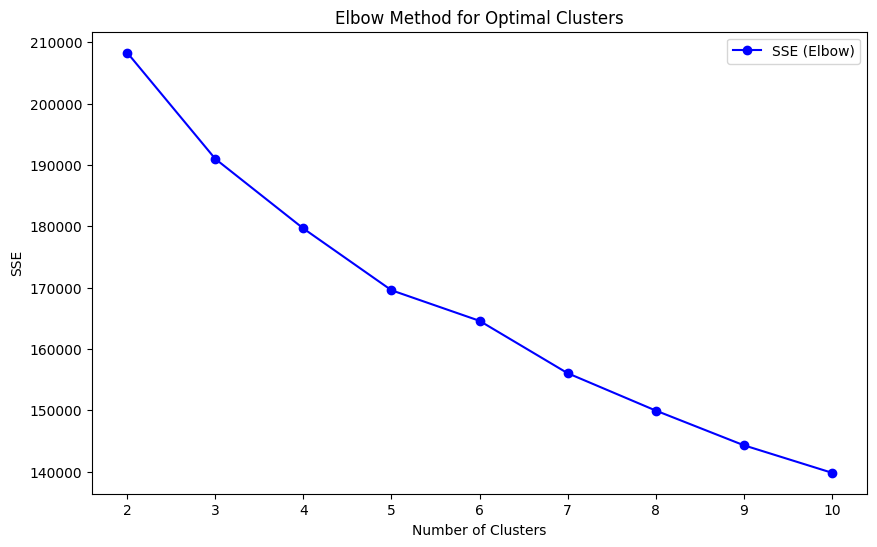

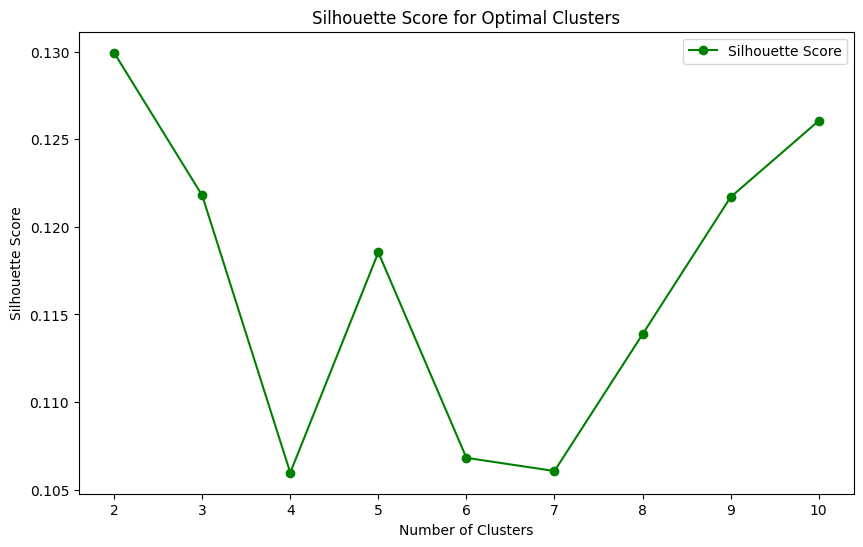

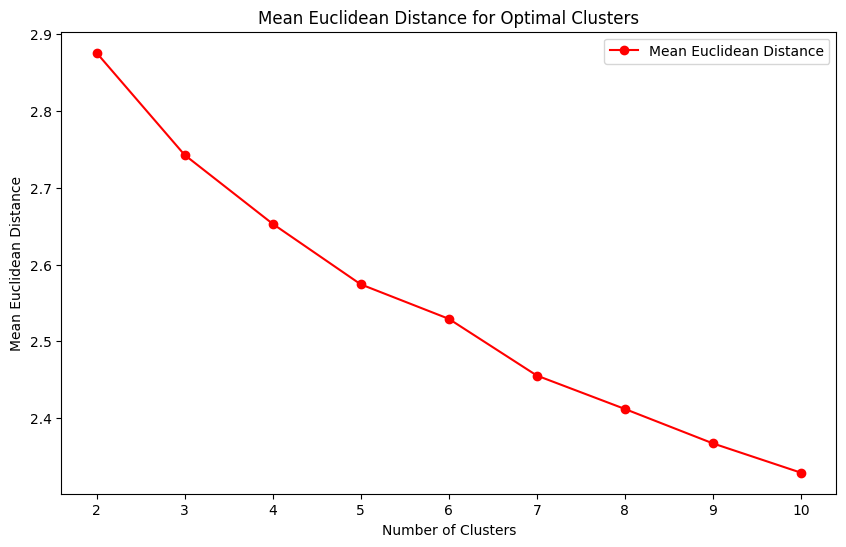

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_clustering_df = scaler.fit_transform(diabetic_df_transformed)

# Create a new dataset, using the scaled dataset, with the same column names as the transformed dataset
diabetic_df_prepared = pd.DataFrame(scaled_clustering_df, columns=diabetic_df_transformed.columns)

# Step 2: Define a range of possible clusters for evaluation
range_n_clusters = list(range(2, 11))  # You can adjust the range

# Step 3: Elbow Method, Silhouette Score, and Euclidean distance calculation
SSE = []
silhouette_avg = []
euclidean_distances = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_clustering_df)

    # Inertia (Elbow Method)
    SSE.append(kmeans.inertia_)

    # Silhouette Score
    silhouette_avg.append(silhouette_score(scaled_clustering_df, cluster_labels))

    # Euclidean distance calculation for all clusters
    centers = kmeans.cluster_centers_
    distances = cdist(scaled_clustering_df, centers, 'euclidean')
    euclidean_distances.append(np.mean(np.min(distances, axis=1)))

# Step 4: Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, SSE, 'bo-', label='SSE (Elbow)')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend()
plt.show()

# Step 5: Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, 'go-', label='Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

# Step 6: Plot Mean Euclidean Distance
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, euclidean_distances, 'ro-', label='Mean Euclidean Distance')
plt.title('Mean Euclidean Distance for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Euclidean Distance')
plt.legend()
plt.show()


4 clusters provides the best balance according to both metrics. The Elbow Method suggests that the reduction in error slows significantly after 4 clusters, making it a practical choice. Although 2 clusters yield the highest silhouette score, it might lead to oversimplified results, whereas 4 clusters offer a more interpretable and meaningful grouping without overfitting.

## Step 4: Clustering with chosen number of clusters

In [ ]:
# Step 1: Choose the optimal number of clusters based on the results
optimal_n_clusters = 4

# Step 2: Perform KMeans clustering with the optimal number of clusters

model = KMeans(n_clusters = optimal_n_clusters, max_iter=300, tol=0.0001, n_init=10, random_state=99)
model.fit(scaled_clustering_df)

# Print the SSE, number of interations run, and the centroids
print("Attributes of the clustering solution for k=3:")
print("SSE :", round(model.inertia_, 1))
print("Num of iterations :" , model.n_iter_)
print("\nCluster centers :" , model.cluster_centers_)

# Therefore the clustering solution converged: as 31 iterations < max_iter which is 300

between_ss = SSE[0] - model.inertia_
improvement = (between_ss / SSE[0])*100
print('The improvement of SSE due to clustering (k=3) is: ' + str(round(improvement,2)) + '%')

diabetic_df_transformed['Cluster'] = kmeans.fit_predict(scaled_clustering_df)

print(f"Optimal number of clusters: {optimal_n_clusters}")
print(diabetic_df_transformed.head())

Attributes of the clustering solution for k=3:
SSE : 177486.5
Num of iterations : 34

Cluster centers : [[-0.1221989  -0.33128149 -0.66239785  0.37681477  0.61946362  0.77378334
   0.07088698 -0.59544298 -0.56970302 -0.03464167]
 [ 0.11438364  0.2765054   0.29604406 -1.45228652 -0.28505019 -0.51042613
  -0.26344117  0.37053624 -0.31932691  0.31080322]
 [-0.10339256 -0.24174685 -0.19753897  0.18517248  0.23130139  0.32750116
  -0.32984303 -0.15372978  1.7554758  -0.30540793]
 [ 0.09427535  0.2544451   0.50638312  0.65679489 -0.50005664 -0.53206941
   0.37327284  0.35735535 -0.47754574  0.00551623]]
The improvement of SSE due to clustering (k=3) is: 14.79%
Optimal number of clusters: 4
    FVGREEN  EXERANY2  ALCDAY5  MENTHLTH  EDUCA  INCOME2  _AGEG5YR  SEX  \
21    310.0       1.0    201.0      88.0    6.0      8.0      13.0  1.0   
33    301.0       2.0    201.0      88.0    4.0      6.0      11.0  2.0   
56    101.0       1.0    888.0      88.0    5.0      4.0      13.0  2.0   
67    3

## Step 5: Clusters Profiling

In [ ]:
# Add a new "cluster" column to the original dataset to indicate in which cluster each record belongs to
diabetic_df['cluster'] = model.labels_

# Show all possible "cluster" values and how often each one occurs
cluster_counts = diabetic_df['cluster'].value_counts()
print("Cluster Counts:\n", cluster_counts)

# Calculate the proportion of males in each cluster
# Assuming 'sex' column is coded as 1 for male and 2 for female
proportion_males = diabetic_df.groupby('cluster').agg(
    total=('SEX', 'count'),
    males=('SEX', lambda x: (x == 1).sum())  # Count of males
).reset_index()

# Calculate the proportion of males in each cluster
proportion_males['proportion_males'] = proportion_males['males'] / proportion_males['total']

# Show the result
print("Proportion of Males in Each Cluster:\n", proportion_males)


Cluster Counts:
 cluster
3    7098
0    6401
1    5512
2    5007
Name: count, dtype: int64
Proportion of Males in Each Cluster:
    cluster  total  males  proportion_males
0        0   6401   4855          0.758475
1        1   5512   1525          0.276669
2        2   5007   2696          0.538446
3        3   7098   2008          0.282897


Cluster 3 is the largest cluster accounting for 29.55%, cluster 0 accounts for 26.65%, cluster 1 accounts for 22.95%, cluster 2 accounts for 20.85%

## Step 6: Heatmap Generation

    FVGREEN  EXERANY2   ALCDAY5  MENTHLTH     EDUCA   INCOME2  _AGEG5YR  \
0 -0.122199 -0.331281 -0.662398  0.376815  0.619464  0.773783  0.070887   
1  0.114384  0.276505  0.296044 -1.452287 -0.285050 -0.510426 -0.263441   
2 -0.103393 -0.241747 -0.197539  0.185172  0.231301  0.327501 -0.329843   
3  0.094275  0.254445  0.506383  0.656795 -0.500057 -0.532069  0.373273   

        SEX  YJ_BPHIGH4   YJ_BMI5  
0 -0.595443   -0.569703 -0.034642  
1  0.370536   -0.319327  0.310803  
2 -0.153730    1.755476 -0.305408  
3  0.357355   -0.477546  0.005516  


<Axes: >

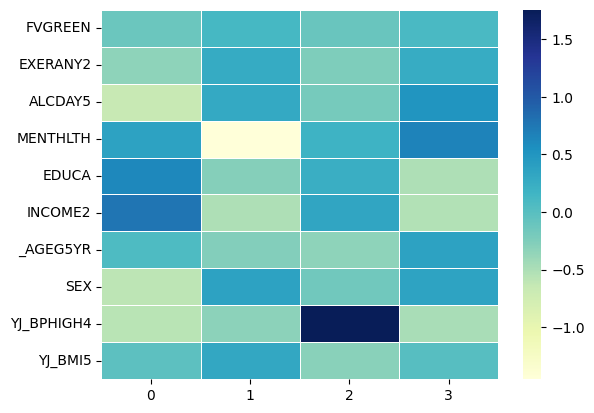

In [ ]:
#Cluster Profiling
# Show cluster centroids
model.cluster_centers_
# Create a DataFrame of cluster centroids.
clust_means = pd.DataFrame(model.cluster_centers_, columns=diabetic_df_prepared.columns)
print(clust_means)

#Generate heatmap

# Prepare to generate heatmap
import seaborn as sns
# Show heatmap of clusters.
# "clust_means.T" means that we will transpose the 'clust_means' DataFrame,
# so that the rows become columns, and the columns become rows.
# Each column is a cluster centroid,
# each row is a variable in the dataset,
# and the average value is represented as a color
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu")

**Cluster 0** comprises individuals with a **FVGREEN** score indicating low fruit and vegetable consumption. They have an **EXERANY2** score reflecting limited exercise activity, and an **ALCDAY5** score suggesting low alcohol consumption. This group experiences moderate mental health challenges, as evidenced by a **MENTHLTH** score. Their **EDUCA** score indicates a high level of education, while an **INCOME2** score reflects a high income. They belong to a younger age group, as shown by their **_AGEG5YR** score, and are predominantly male, with a **SEX** score. Furthermore, this cluster shows a low prevalence of high blood pressure (**YJ_BPHIGH4**) and an average body mass index (**YJ_BMI5**). This combination suggests that, despite their good education and financial stability, their unhealthy lifestyle choices may contribute to their moderate mental health challenges, highlighting the need for health promotion strategies focusing on diet and exercise.

**Cluster 1** features individuals with a **FVGREEN** score indicating high fruit and vegetable consumption and an **EXERANY2** score reflecting moderate exercise levels. Their **ALCDAY5** score suggests moderate alcohol consumption, while a notably low **MENTHLTH** score indicates very few poor mental health days experienced. The **EDUCA** score reflects a lower level of education, and an **INCOME2** score indicates low income. They belong to a younger age group, as shown by the **_AGEG5YR** score, and are predominantly female, as indicated by a **SEX** score. Additionally, this cluster shows a low prevalence of high blood pressure (**YJ_BPHIGH4**) and a below-average body mass index (**YJ_BMI5**). This group highlights the protective effects of healthy lifestyle choices on mental well-being, suggesting that promoting healthy behaviors can be beneficial, even among those with lower socioeconomic status.

**Cluster 2** includes individuals with a **FVGREEN** score indicating low fruit and vegetable consumption and an **EXERANY2** score suggesting limited exercise. Their **ALCDAY5** score reflects low alcohol consumption, while their **MENTHLTH** score indicates some poor mental health days. They have a moderate **EDUCA** score and an **INCOME2** score reflecting moderate income levels. Members of this cluster are characterized by an **_AGEG5YR** score indicating an older age group. The **SEX** score reflects mixed gender representation. This group exhibits a high prevalence of high blood pressure (**YJ_BPHIGH4**) and a lower-than-average body mass index (**YJ_BMI5**). These patterns suggest that while this cluster has some mental health challenges, targeted interventions to improve dietary habits and physical activity could be beneficial.

**Cluster 3** is characterized by individuals with a **FVGREEN** score indicating high fruit and vegetable consumption and an **EXERANY2** score reflecting regular exercise activity. Their **ALCDAY5** score suggests moderate alcohol consumption, while a **MENTHLTH** score indicates a higher number of poor mental health days. This cluster has a **EDUCA** score suggesting low education levels and an **INCOME2** score indicating low income. Members belong to a mixed age group, as shown by their **_AGEG5YR** score, and display mixed gender representation with a **SEX** score. They show low prevalence of high blood pressure (**YJ_BPHIGH4**) and an average body mass index (**YJ_BMI5**). This cluster illustrates that despite maintaining healthy lifestyle habits, significant mental health challenges remain, suggesting that mental health support and access to educational resources could greatly enhance their overall well-being.


# Diabetic Clustering (Female)

## Step 1: Check for skewness and transform accordingly

In [ ]:
# Check skewness of the DataFrame
clustering_female_diabetic_df.skew()

# # Seeing as FVGREEN, ALCDAY5, BPHIGH4, _BMI5 are highly skewed variables with skew > 1, we will transform them.

# # Log transformation
# clustering_female_diabetic_df['Log_FVGREEN'] = np.log(clustering_female_diabetic_df['FVGREEN'])
# clustering_female_diabetic_df['Log_ALCDAY5'] = np.log(clustering_female_diabetic_df['ALCDAY5'])
# clustering_female_diabetic_df['Log_BPHIGH4'] = np.log(clustering_female_diabetic_df['BPHIGH4'])
# clustering_female_diabetic_df['Log_BMI5'] = np.log(clustering_female_diabetic_df['_BMI5'])

# # Check for skew after log transformation
# print(clustering_female_diabetic_df.skew())

# Since Log_ALCDAY5, Log_BPHIGH4 are still skewed, we will try other transformations

# # Try 1: RobustScaler
# from sklearn.preprocessing import RobustScaler

# # Create a RobustScaler
# scaler = RobustScaler()

# # Apply the scaling
# clustering_female_diabetic_df[['RS_FVGREEN', 'RS_ALCDAY5', 'RS_BPHIGH4', 'RS_BMI5']] = scaler.fit_transform(
#     clustering_female_diabetic_df[['FVGREEN', 'ALCDAY5', 'BPHIGH4', '_BMI5']]
# )

# # Check for skew after transformation
# print(clustering_female_diabetic_df.skew())

# Results: All variables are still skewed

# # Try 2: Winsorizing (capping extreme values)
# from scipy.stats.mstats import winsorize

# # Apply Winsorizing with limits, e.g., capping 5% of extreme values
# clustering_female_diabetic_df['Winsorized_FVGREEN'] = winsorize(clustering_female_diabetic_df['FVGREEN'], limits=[0.05, 0.05])
# clustering_female_diabetic_df['Winsorized_ALCDAY5'] = winsorize(clustering_female_diabetic_df['ALCDAY5'], limits=[0.05, 0.05])
# clustering_female_diabetic_df['Winsorized_BPHIGH4'] = winsorize(clustering_female_diabetic_df['BPHIGH4'], limits=[0.05, 0.05])
# clustering_female_diabetic_df['Winsorized_BMI5'] = winsorize(clustering_female_diabetic_df['_BMI5'], limits=[0.05, 0.05])

# # Check for skew after transformation
# print(clustering_female_diabetic_df.skew())

# Results: Winsorized_FVGREEN, Winsorized_ALCDAY5, Winsorized_BPHIGH4 are still skewed

# Try 3: Yeo-Johnson Transformation
from sklearn.preprocessing import PowerTransformer

# Create a Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson')

# Apply the transformation
clustering_female_diabetic_df[['YJ_FVGREEN', 'YJ_ALCDAY5', 'YJ_BPHIGH4', 'YJ_BMI5']] = pt.fit_transform(
    clustering_female_diabetic_df[['FVGREEN', 'ALCDAY5', 'BPHIGH4', '_BMI5']]
)

# Check for skew after transformation
print(clustering_female_diabetic_df.skew())

# Results: YJ_ALCDAY5, YJ_BPHIGH4 still skewed

# # Choose the Yeo-Johnson Transformation as it leads to the most difference in decreasing skewness

# Drop original variables
diabetic_df_transformed = clustering_female_diabetic_df.drop(['FVGREEN', 'ALCDAY5', 'BPHIGH4', '_BMI5'], axis=1)
print(diabetic_df_transformed)


FVGREEN       1.039871
EXERANY2      0.291307
ALCDAY5      -1.342113
BPHIGH4       1.286118
_BMI5         1.530911
MENTHLTH     -0.635459
EDUCA        -0.402621
INCOME2       0.214926
_AGEG5YR     -0.951998
SEX           0.000000
YJ_FVGREEN   -0.008270
YJ_ALCDAY5   -1.326654
YJ_BPHIGH4    1.237138
YJ_BMI5      -0.014517
dtype: float64
        EXERANY2  MENTHLTH  EDUCA  INCOME2  _AGEG5YR  SEX  YJ_FVGREEN  \
33           2.0      88.0    4.0      6.0      11.0  2.0    0.546786   
56           1.0      88.0    5.0      4.0      13.0  2.0   -1.636552   
79           2.0      88.0    3.0      3.0      12.0  2.0    0.553979   
89           2.0      88.0    4.0      4.0      13.0  2.0    0.610805   
107          2.0      88.0    4.0      2.0      11.0  2.0   -0.262550   
...          ...       ...    ...      ...       ...  ...         ...   
441333       1.0       6.0    2.0      2.0      11.0  2.0    0.610805   
441360       2.0      88.0    4.0      3.0      10.0  2.0    1.935591   
441419

<ipython-input-133-26b44f0fb548>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_female_diabetic_df[['YJ_FVGREEN', 'YJ_ALCDAY5', 'YJ_BPHIGH4', 'YJ_BMI5']] = pt.fit_transform(
<ipython-input-133-26b44f0fb548>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_female_diabetic_df[['YJ_FVGREEN', 'YJ_ALCDAY5', 'YJ_BPHIGH4', 'YJ_BMI5']] = pt.fit_transform(
<ipython-input-133-26b44f0fb548>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

## Step 2: Deciding the optimal clusters with Elbow, Silhouette and Euclidean Distance Plots

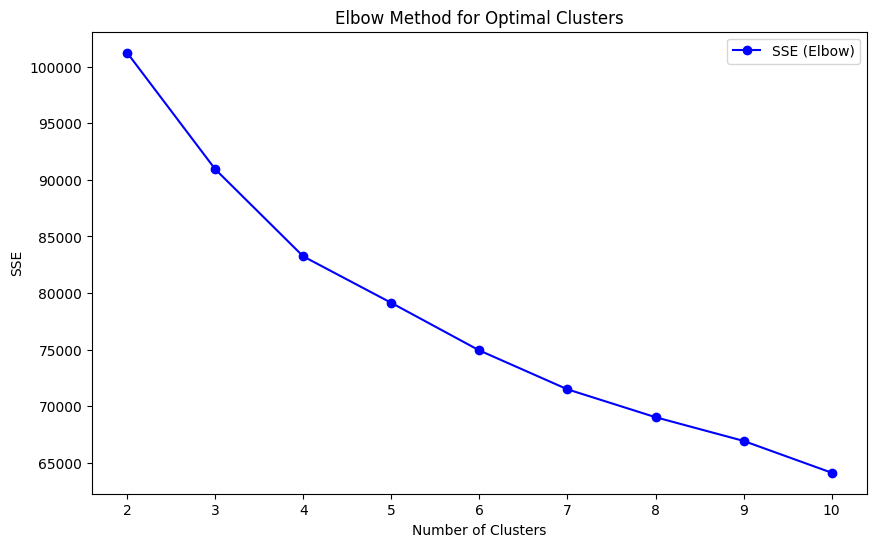

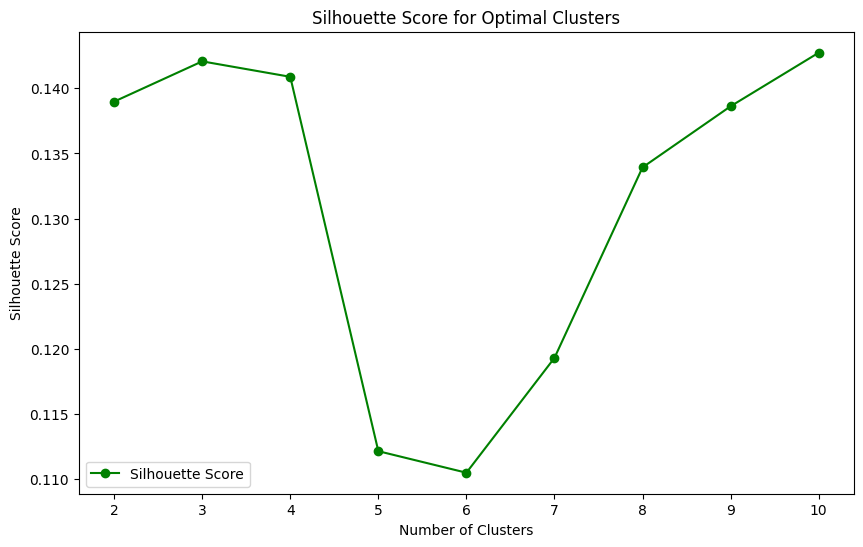

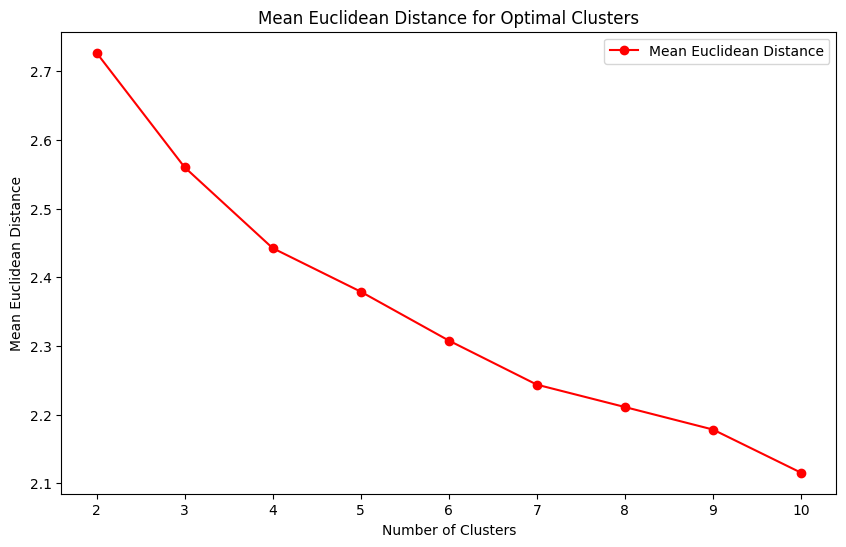

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_clustering_df = scaler.fit_transform(diabetic_df_transformed)

# Create a new dataset, using the scaled dataset, with the same column names as the transformed dataset
diabetic_df_prepared = pd.DataFrame(scaled_clustering_df, columns=diabetic_df_transformed.columns)

# Step 2: Define a range of possible clusters for evaluation
range_n_clusters = list(range(2, 11))  # You can adjust the range

# Step 3: Elbow Method, Silhouette Score, and Euclidean distance calculation
SSE = []
silhouette_avg = []
euclidean_distances = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_clustering_df)

    # Inertia (Elbow Method)
    SSE.append(kmeans.inertia_)

    # Silhouette Score
    silhouette_avg.append(silhouette_score(scaled_clustering_df, cluster_labels))

    # Euclidean distance calculation for all clusters
    centers = kmeans.cluster_centers_
    distances = cdist(scaled_clustering_df, centers, 'euclidean')
    euclidean_distances.append(np.mean(np.min(distances, axis=1)))

# Step 4: Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, SSE, 'bo-', label='SSE (Elbow)')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend()
plt.show()

# Step 5: Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, 'go-', label='Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

# Step 6: Plot Mean Euclidean Distance
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, euclidean_distances, 'ro-', label='Mean Euclidean Distance')
plt.title('Mean Euclidean Distance for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Euclidean Distance')
plt.legend()
plt.show()


Based on both plots, the optimal number of clusters is either **2 or 4**. The silhouette score peaks at 2 clusters, indicating the best-defined and most distinct clusters, but this might lead to oversimplified groupings. On the other hand, the Elbow Method shows that after 4 clusters, the SSE reduction slows down, suggesting diminishing returns with more clusters. Therefore,**4 clusters** provide a more balanced solution between model simplicity and capturing more data variation.

## Step 4: Clustering with chosen number of clusters

In [ ]:
# Step 1: Choose the optimal number of clusters based on the results
optimal_n_clusters = 4

# Step 2: Perform KMeans clustering with the optimal number of clusters

model = KMeans(n_clusters = optimal_n_clusters, max_iter=300, tol=0.0001, n_init=10, random_state=99)
model.fit(scaled_clustering_df)

# Print the SSE, number of interations run, and the centroids
print("Attributes of the clustering solution for k=3:")
print("SSE :", round(model.inertia_, 1))
print("Num of iterations :" , model.n_iter_)
print("\nCluster centers :" , model.cluster_centers_)

# Therefore the clustering solution converged: as 31 iterations < max_iter which is 300

between_ss = SSE[0] - model.inertia_
improvement = (between_ss / SSE[0])*100
print('The improvement of SSE due to clustering (k=3) is: ' + str(round(improvement,2)) + '%')

diabetic_df_transformed['Cluster'] = kmeans.fit_predict(scaled_clustering_df)

print(f"Optimal number of clusters: {optimal_n_clusters}")
print(diabetic_df_transformed.head())

Attributes of the clustering solution for k=3:
SSE : 83238.7
Num of iterations : 22

Cluster centers : [[ 1.15618599 -0.05032317 -0.24396529 -0.25775499  0.21251763  0.
   0.18593941  0.49524754 -0.55494429  0.19321058]
 [-0.23660683 -0.04601986  0.41558715  0.50011638 -0.24106128  0.
  -0.10419151 -1.86300167  0.12028161 -0.0626657 ]
 [-0.05342457  0.02348402 -0.03029349 -0.03540449 -0.28478087  0.
  -0.03527453  0.51339126  1.79375317 -0.17965609]
 [-0.86491275  0.06443216 -0.04387148 -0.08607759  0.12616753  0.
  -0.07942539  0.53616603 -0.55745177 -0.03530805]]
The improvement of SSE due to clustering (k=3) is: 17.78%
Optimal number of clusters: 4
     EXERANY2  MENTHLTH  EDUCA  INCOME2  _AGEG5YR  SEX  YJ_FVGREEN  \
33        2.0      88.0    4.0      6.0      11.0  2.0    0.546786   
56        1.0      88.0    5.0      4.0      13.0  2.0   -1.636552   
79        2.0      88.0    3.0      3.0      12.0  2.0    0.553979   
89        2.0      88.0    4.0      4.0      13.0  2.0    0.

## Step 5: Clusters Profiling

In [ ]:
# Add a new "cluster" column to the original dataset to indicate in which cluster each record belongs to
clustering_female_diabetic_df['cluster'] = model.labels_
clustering_female_diabetic_df

# Show all possible "cluster" values, and how often each one occurs
cluster_counts = clustering_female_diabetic_df['cluster'].value_counts()
print(cluster_counts)


cluster
3    4117
0    3758
1    2804
2    2255
Name: count, dtype: int64


<ipython-input-95-cb71b563f871>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_female_diabetic_df['cluster'] = model.labels_


Cluster 3 is the largest cluster at 31.83%. Cluster 0 accounts for 29.06%, cluster 1 accounts for 21.68%, cluster 2 accounts for 17.43%.


## Step 6: Heatmap Generation

    ALCDAY5   BPHIGH4  MENTHLTH     EDUCA   INCOME2  _AGEG5YR       SEX  \
0  1.156186 -0.050323 -0.243965 -0.257755  0.212518       0.0  0.185939   
1 -0.236607 -0.046020  0.415587  0.500116 -0.241061       0.0 -0.104192   
2 -0.053425  0.023484 -0.030293 -0.035404 -0.284781       0.0 -0.035275   
3 -0.864913  0.064432 -0.043871 -0.086078  0.126168       0.0 -0.079425   

   YJ_FVGREEN  YJ_EXERANY2   YJ_BMI5  
0    0.495248    -0.554944  0.193211  
1   -1.863002     0.120282 -0.062666  
2    0.513391     1.793753 -0.179656  
3    0.536166    -0.557452 -0.035308  


<Axes: >

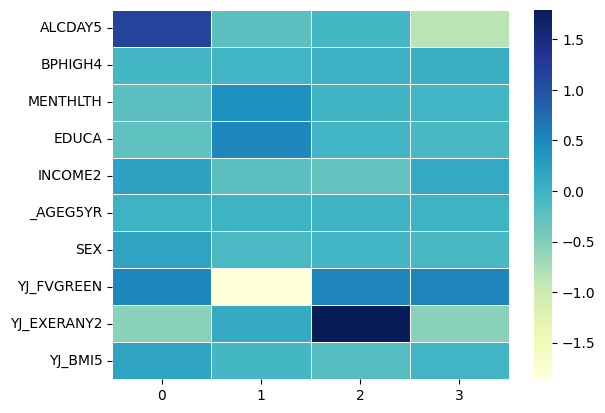

In [ ]:
#Cluster Profiling
# Show cluster centroids
model.cluster_centers_
# Create a DataFrame of cluster centroids.
clust_means = pd.DataFrame(model.cluster_centers_, columns=non_diabetic_df_prepared.columns)
print(clust_means)

#Generate heatmap

# Prepare to generate heatmap
import seaborn as sns
# Show heatmap of clusters.
# "clust_means.T" means that we will transpose the 'clust_means' DataFrame,
# so that the rows become columns, and the columns become rows.
# Each column is a cluster centroid,
# each row is a variable in the dataset,
# and the average value is represented as a color
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu")

## Cluster Interpretation

**Cluster 0:**  
Individuals in this cluster have a **high alcohol consumption** (ALCDAY5) and are generally **less likely to experience high blood pressure** (BPHIGH4). They report relatively **fewer days of poor mental health** (MENTHLTH), suggesting overall **better mental health** compared to other clusters. The education level (EDUCA) in this group is **slightly below average**, and they possess a **moderate household income** (INCOME2). The individuals are characterized by a **younger age** (_AGEG5YR) and a **slightly higher intake of green vegetables** (YJ_FVGREEN). However, they show **less physical activity** (YJ_EXERANY2) and have a **higher body mass index (BMI)** (YJ_BMI5), indicating potential concerns regarding weight management.

**Cluster 1:**  
This cluster consists of individuals who have **low alcohol consumption** (ALCDAY5) and are also **less likely to have high blood pressure** (BPHIGH4). They experience **more days of poor mental health** (MENTHLTH), indicating significant mental health challenges. Education levels in this group are **above average** (EDUCA) with **below-average household income** (INCOME2), suggesting a potential disconnect between education and financial status. The age distribution is **younger** (_AGEG5YR), and they have a **lower intake of green vegetables** (YJ_FVGREEN), with **moderate physical activity** (YJ_EXERANY2). Their **BMI is slightly below average** (YJ_BMI5), which may reflect a healthier weight status.

**Cluster 2:**  
Individuals in this cluster show a **moderate intake of alcohol** (ALCDAY5) and experience a **slight likelihood of high blood pressure** (BPHIGH4). They report **minimal days of poor mental health** (MENTHLTH), indicating relatively stable mental health. This group has **average educational attainment** (EDUCA) and a **below-average household income** (INCOME2). The age distribution remains **younger** (_AGEG5YR), with a **higher intake of green vegetables** (YJ_FVGREEN) and **high physical activity levels** (YJ_EXERANY2). Their **BMI is slightly below average** (YJ_BMI5), suggesting a healthy weight.

**Cluster 3:**  
This cluster is characterized by **very low alcohol consumption** (ALCDAY5) and a **slight likelihood of high blood pressure** (BPHIGH4). They experience a **stable mental health status** (MENTHLTH) with **fewer poor mental health days** compared to others. Education levels in this group are **slightly below average** (EDUCA), and they have a **moderate household income** (INCOME2). Individuals are typically **younger** (_AGEG5YR) and exhibit a **moderate intake of green vegetables** (YJ_FVGREEN). They show **less physical activity** (YJ_EXERANY2) and have a **lower body mass index (BMI)** (YJ_BMI5), indicating overall health awareness.

# Diabetic Clustering (Male)

## Step 1: Check for skewness and transform accordingly

In [ ]:
# Check for skewness in the dataset
clustering_male_diabetic_df.skew()

# # Seeing as BPHIGH4, _BMI5, MENTHLTH are highly skewed variables with skew > 1, we will transform them.

# # Log transformation
# clustering_male_diabetic_df['Log_BPHIGH4'] = np.log(clustering_male_diabetic_df['BPHIGH4'])
# clustering_male_diabetic_df['Log_BMI5'] = np.log(clustering_male_diabetic_df['_BMI5'])
# clustering_male_diabetic_df['Log_MENTHLTH'] = np.log(clustering_male_diabetic_df['MENTHLTH'])

# # # Check for skew after log transformation
# print(clustering_male_diabetic_df.skew())

# # # Since Log_MENTHLTH and Log_BPHIGH4 are still skewed, we will try other transformations

# # # Try 1: RobustScaler
# from sklearn.preprocessing import RobustScaler

# # # Create a RobustScaler
# scaler = RobustScaler()

# # # Apply the scaling
# clustering_male_diabetic_df[['RS_BPHIGH4', 'RS_BMI5', 'RS_MENTHLTH']] = scaler.fit_transform(clustering_male_diabetic_df[['BPHIGH4', '_BMI5', 'MENTHLTH']])
# # # Check for skew after transformation
# print(clustering_male_diabetic_df.skew())

# # # Results: All variables are still skewed

# # # Try 2: Winsorizing (capping extreme values)
# from scipy.stats.mstats import winsorize

# # # Apply Winsorizing with limits, e.g., capping 5% of extreme values
# clustering_male_diabetic_df['Winsorized_BPHIGH4'] = winsorize(clustering_male_diabetic_df['BPHIGH4'], limits=[0.05, 0.05])
# clustering_male_diabetic_df['Winsorized_BMI5'] = winsorize(clustering_male_diabetic_df['_BMI5'], limits=[0.05, 0.05])
# clustering_male_diabetic_df['Winsorized_MENTHLTH'] = winsorize(clustering_male_diabetic_df['MENTHLTH'], limits=[0.05, 0.05])
# # # Check for skew after transformation
# print(clustering_male_diabetic_df.skew())

# # # Results: Winsorized_BPHIGH4, Winsorized_MENTHLTH are still skewed

# # Try 3: Yeo-Johnson Transformation
from sklearn.preprocessing import PowerTransformer

# # Create a Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson')

# # Apply the transformation
clustering_male_diabetic_df[['YJ_BPHIGH4', 'YJ_BMI5', 'YJ_MENTHLTH']] = pt.fit_transform(clustering_male_diabetic_df[['BPHIGH4', '_BMI5', 'MENTHLTH']])
# # Check for skew after transformation
print(clustering_male_diabetic_df.skew())

# # Results: YJ_MENTHLTH and YJ_BPHIGH4  still skewed,

# # # Choose the Yeo-Johnson Transformation as it leads to the most difference in decreasing skewness

# # Drop original variables
diabetic_df_transformed = clustering_male_diabetic_df.drop(['BPHIGH4', '_BMI5', 'MENTHLTH'], axis=1)
print(diabetic_df_transformed)



FVGREEN        0.914669
EXERANY2       0.683503
ALCDAY5       -0.347812
BPHIGH4        1.175117
_BMI5          1.792012
MENTHLTH      -1.274066
EDUCA         -0.583300
INCOME2       -0.302962
_AGEG5YR      -0.942639
SEX            0.000000
YJ_BPHIGH4     1.128483
YJ_BMI5       -0.031387
YJ_MENTHLTH   -1.208926
dtype: float64
        FVGREEN  EXERANY2  ALCDAY5  EDUCA  INCOME2  _AGEG5YR  SEX  YJ_BPHIGH4  \
21        310.0       1.0    201.0    6.0      8.0      13.0  1.0    1.710577   
67        302.0       2.0    888.0    6.0      5.0      10.0  1.0   -0.584012   
69        310.0       2.0    888.0    2.0      4.0      12.0  1.0   -0.584012   
155       201.0       1.0    888.0    5.0      8.0       8.0  1.0   -0.584012   
255       207.0       1.0    888.0    4.0      6.0      12.0  1.0   -0.584012   
...         ...       ...      ...    ...      ...       ...  ...         ...   
441255    315.0       1.0    210.0    6.0      8.0      10.0  1.0   -0.584012   
441269    201.0       2.0

<ipython-input-135-0bb9693f71a6>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_male_diabetic_df[['YJ_BPHIGH4', 'YJ_BMI5', 'YJ_MENTHLTH']] = pt.fit_transform(clustering_male_diabetic_df[['BPHIGH4', '_BMI5', 'MENTHLTH']])
<ipython-input-135-0bb9693f71a6>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_male_diabetic_df[['YJ_BPHIGH4', 'YJ_BMI5', 'YJ_MENTHLTH']] = pt.fit_transform(clustering_male_diabetic_df[['BPHIGH4', '_BMI5', 'MENTHLTH']])
<ipython-input-135-0bb9693f71a6>:48: Setti

## Step 2: Deciding the optimal clusters with Elbow, Silhouette and Euclidean Distance Plots

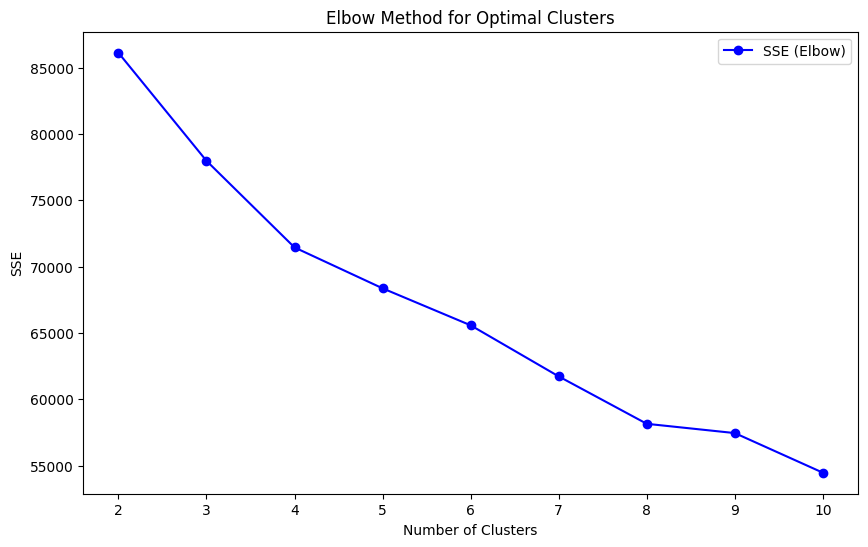

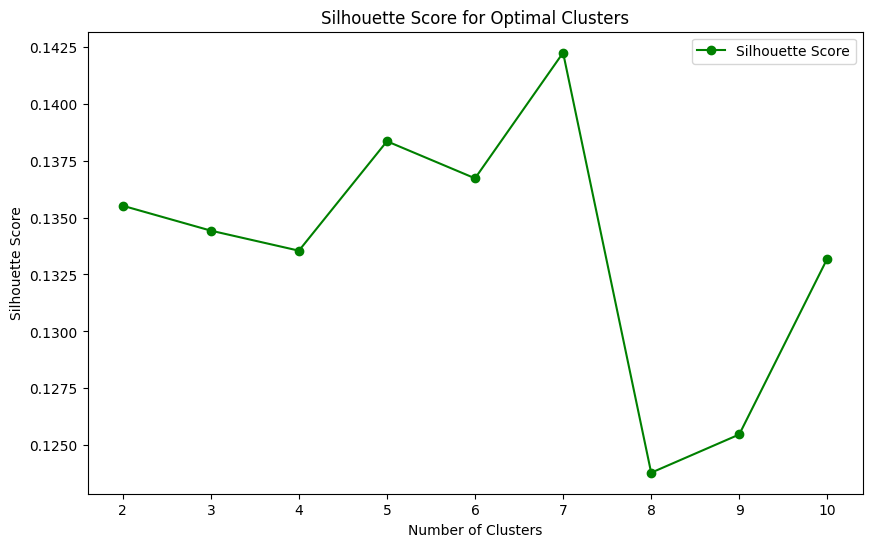

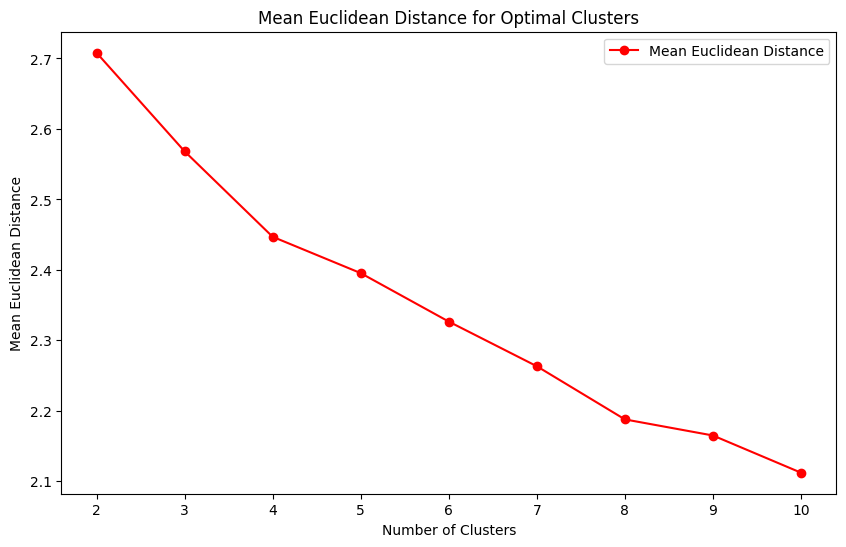

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_clustering_df = scaler.fit_transform(diabetic_df_transformed)

# Create a new dataset, using the scaled dataset, with the same column names as the transformed dataset
diabetic_df_prepared = pd.DataFrame(scaled_clustering_df, columns=diabetic_df_transformed.columns)

# Step 2: Define a range of possible clusters for evaluation
range_n_clusters = list(range(2, 11))  # You can adjust the range

# Step 3: Elbow Method, Silhouette Score, and Euclidean distance calculation
SSE = []
silhouette_avg = []
euclidean_distances = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_clustering_df)

    # Inertia (Elbow Method)
    SSE.append(kmeans.inertia_)

    # Silhouette Score
    silhouette_avg.append(silhouette_score(scaled_clustering_df, cluster_labels))

    # Euclidean distance calculation for all clusters
    centers = kmeans.cluster_centers_
    distances = cdist(scaled_clustering_df, centers, 'euclidean')
    euclidean_distances.append(np.mean(np.min(distances, axis=1)))

# Step 4: Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, SSE, 'bo-', label='SSE (Elbow)')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.legend()
plt.show()

# Step 5: Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg, 'go-', label='Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

# Step 6: Plot Mean Euclidean Distance
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, euclidean_distances, 'ro-', label='Mean Euclidean Distance')
plt.title('Mean Euclidean Distance for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Mean Euclidean Distance')
plt.legend()
plt.show()


The optimal number of clusters appears to be **5 or 6** based on both the elbow and silhouette plots. The elbow method suggests 5 clusters, as the SSE reduction slows significantly after this point, indicating diminishing returns with additional clusters. Meanwhile, the silhouette score peaks at 6 clusters, suggesting better-defined clusters. Therefore, 5 clusters are chosen.

## Step 4: Clustering with chosen number of clusters

In [ ]:
# Step 1: Choose the optimal number of clusters based on the results
optimal_n_clusters = 5

# Step 2: Perform KMeans clustering with the optimal number of clusters

model = KMeans(n_clusters = optimal_n_clusters, max_iter=300, tol=0.0001, n_init=10, random_state=99)
model.fit(scaled_clustering_df)

# Print the SSE, number of interations run, and the centroids
print("Attributes of the clustering solution for k=3:")
print("SSE :", round(model.inertia_, 1))
print("Num of iterations :" , model.n_iter_)
print("\nCluster centers :" , model.cluster_centers_)

# Therefore the clustering solution converged: as 31 iterations < max_iter which is 300

between_ss = SSE[0] - model.inertia_
improvement = (between_ss / SSE[0])*100
print('The improvement of SSE due to clustering (k=3) is: ' + str(round(improvement,2)) + '%')

diabetic_df_transformed['Cluster'] = kmeans.fit_predict(scaled_clustering_df)

print(f"Optimal number of clusters: {optimal_n_clusters}")
print(diabetic_df_transformed.head())

Attributes of the clustering solution for k=3:
SSE : 67235.3
Num of iterations : 24

Cluster centers : [[ 8.10105780e-02 -7.15064440e-01  5.12555370e-01 -5.61905593e-01
  -5.94642284e-01  2.64054666e-01  0.00000000e+00 -3.93709067e-01
  -6.92015019e-02  5.65707799e-01]
 [ 1.27120993e-01  1.90738332e-01  2.15436429e-01 -2.59388011e-01
  -4.83224344e-01 -2.96234565e-01  0.00000000e+00 -2.78977703e-01
   2.38850507e-01 -1.73891135e+00]
 [ 2.85731970e-01  1.39847536e+00  3.26211311e-01 -4.18976903e-01
  -3.58815719e-01  2.08161383e-01  0.00000000e+00 -1.94131694e-01
   1.16128840e-01  5.68622508e-01]
 [-2.17261397e-01 -3.61030528e-01 -2.91840259e-01  3.94752300e-01
   4.96477081e-01 -3.15636841e-01  0.00000000e+00  1.71236473e+00
  -3.28624012e-01  2.59705115e-01]
 [-2.43144079e-01 -4.58264088e-01 -6.40627966e-01  7.15678311e-01
   8.13285512e-01  1.22495121e-01  0.00000000e+00 -5.84011813e-01
  -2.19998720e-04  4.26791847e-01]]
The improvement of SSE due to clustering (k=3) is: 21.94%
Opt

## Step 5: Clusters Profiling

In [ ]:
# Add a new "cluster" column to the original dataset to indicate in which cluster each record belongs to
clustering_male_diabetic_df['cluster'] = model.labels_
clustering_male_diabetic_df

# Show all possible "cluster" values, and how often each one occurs
cluster_counts = clustering_male_diabetic_df['cluster'].value_counts()
print(cluster_counts)


cluster
4    2609
1    2300
2    2116
0    2077
3    1982
Name: count, dtype: int64


<ipython-input-138-4d6a2b161dd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_male_diabetic_df['cluster'] = model.labels_


## Step 6: Heatmap Generation

    FVGREEN  EXERANY2   ALCDAY5     EDUCA   INCOME2  _AGEG5YR  SEX  \
0  0.081011 -0.715064  0.512555 -0.561906 -0.594642  0.264055  0.0   
1  0.127121  0.190738  0.215436 -0.259388 -0.483224 -0.296235  0.0   
2  0.285732  1.398475  0.326211 -0.418977 -0.358816  0.208161  0.0   
3 -0.217261 -0.361031 -0.291840  0.394752  0.496477 -0.315637  0.0   
4 -0.243144 -0.458264 -0.640628  0.715678  0.813286  0.122495  0.0   

   YJ_BPHIGH4   YJ_BMI5  YJ_MENTHLTH  
0   -0.393709 -0.069202     0.565708  
1   -0.278978  0.238851    -1.738911  
2   -0.194132  0.116129     0.568623  
3    1.712365 -0.328624     0.259705  
4   -0.584012 -0.000220     0.426792  


<Axes: >

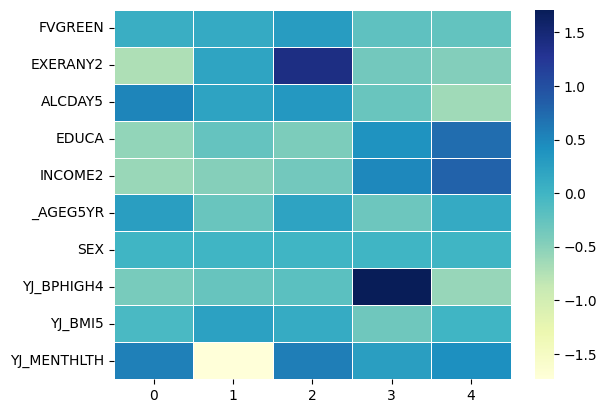

In [ ]:
#Cluster Profiling
# Show cluster centroids
model.cluster_centers_
# Create a DataFrame of cluster centroids.
clust_means = pd.DataFrame(model.cluster_centers_, columns=diabetic_df_prepared.columns)
print(clust_means)

#Generate heatmap

# Prepare to generate heatmap
import seaborn as sns
# Show heatmap of clusters.
# "clust_means.T" means that we will transpose the 'clust_means' DataFrame,
# so that the rows become columns, and the columns become rows.
# Each column is a cluster centroid,
# each row is a variable in the dataset,
# and the average value is represented as a color
sns.heatmap(clust_means.T,  linewidths=.5, cmap="YlGnBu")

### Cluster Interpretations

**Cluster 0:**  
This cluster consists of individuals with a **low intake of green vegetables (FVGREEN)** and significantly **low levels of physical activity (EXERANY2)**. They exhibit **moderate alcohol consumption (ALCDAY5)** and have **below-average education (EDUCA)** and **income levels (INCOME2)**. Although they are **younger (_AGEG5YR)**, they display a slightly increased likelihood of experiencing **high blood pressure (YJ_BPHIGH4)**, alongside a higher number of **poor mental health days (YJ_MENTHLTH)**, indicating potential concerns regarding both physical and mental health.

**Cluster 1:**  
Members of this cluster show a **moderate intake of green vegetables (FVGREEN)** and slightly elevated levels of **physical activity (EXERANY2)**. They have **low alcohol consumption (ALCDAY5)** and slightly below-average **education (EDUCA)**, coupled with **below-average household income (INCOME2)**. Despite being **younger (_AGEG5YR)**, they report significantly fewer **poor mental health days (YJ_MENTHLTH)**, suggesting better overall mental health, and maintain a low likelihood of **high blood pressure (YJ_BPHIGH4)**, indicating a generally healthier profile.

**Cluster 2:**  
Individuals in this cluster demonstrate a **higher intake of green vegetables (FVGREEN)** and **high levels of physical activity (EXERANY2)**. They engage in **moderate alcohol consumption (ALCDAY5)**, with **average educational attainment (EDUCA)** and **below-average income levels (INCOME2)**. Their **younger age group (_AGEG5YR)** and low likelihood of **high blood pressure (YJ_BPHIGH4)**, along with a moderate number of **poor mental health days (YJ_MENTHLTH)**, suggest they are relatively healthy, both physically and mentally.

**Cluster 3:**  
This cluster features individuals with a **low intake of green vegetables (FVGREEN)** and **low physical activity levels (EXERANY2)**. They have **very low alcohol consumption (ALCDAY5)** and **above-average education (EDUCA)** and **income levels (INCOME2)**. Despite being **younger (_AGEG5YR)**, they present a high likelihood of **high blood pressure (YJ_BPHIGH4)**, along with a moderate number of **poor mental health days (YJ_MENTHLTH)**, indicating potential health concerns that may not align with their socioeconomic status.

**Cluster 4:**  
Members of this cluster exhibit a **low intake of green vegetables (FVGREEN)**, **low physical activity (EXERANY2)**, and **significant alcohol consumption (ALCDAY5)**. They have **above-average education (EDUCA)** and **income levels (INCOME2)**, are slightly **younger (_AGEG5YR)**, and show a low likelihood of **high blood pressure (YJ_BPHIGH4)**. Their report of a moderate number of **poor mental health days (YJ_MENTHLTH)** suggests that, despite their socioeconomic advantages, mental health challenges may still be present.



## For Non-diabetic clustering: Check what variables to exclude that can improve silhouette score

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Assuming non_diabetic_df is already defined
# Specify the number of clusters
n_clusters = 4

# List of columns to include in the clustering
columns_to_include = non_diabetic_df.columns.tolist()

# Standardize the data
scaler = StandardScaler()
non_diabetic_df_scaled = scaler.fit_transform(non_diabetic_df)

# Initialize a list to store silhouette scores
results = []

# Iterate through each column
for column in columns_to_include:
    # Create subset including the current column
    included_features = [col for col in columns_to_include if col != column]

    # Clustering with the included features
    kmeans_included = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels_included = kmeans_included.fit_predict(non_diabetic_df_scaled[:, non_diabetic_df.columns.isin(included_features)])
    silhouette_score_included = silhouette_score(non_diabetic_df_scaled[:, non_diabetic_df.columns.isin(included_features)], cluster_labels_included)

    # Clustering with the excluded features
    kmeans_excluded = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels_excluded = kmeans_excluded.fit_predict(non_diabetic_df_scaled[:, non_diabetic_df.columns.isin([column])])
    silhouette_score_excluded = silhouette_score(non_diabetic_df_scaled[:, non_diabetic_df.columns.isin([column])], cluster_labels_excluded)

    # Store the results
    results.append({
        'Feature': column,
        'Included Silhouette Score': silhouette_score_included,
        'Excluded Silhouette Score': silhouette_score_excluded
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


        Feature  Included Silhouette Score  Excluded Silhouette Score
0       FVGREEN                   0.128705                   0.959235
1      EXERANY2                   0.099504                   1.000000
2       ALCDAY5                   0.150618                   0.906175
3       BPHIGH4                   0.128621                   1.000000
4         _BMI5                   0.136747                   0.540017
5      MENTHLTH                   0.129975                   0.933207
6         EDUCA                   0.133738                   0.978735
7       INCOME2                   0.127948                   0.826708
8      _AGEG5YR                   0.127410                   0.637188
9           SEX                   0.155451                   1.000000
10   YJ_FVGREEN                   0.136602                   0.963060
11  YJ_EXERANY2                   0.099504                   1.000000
12      YJ_BMI5                   0.127251                   0.522129


## Drop EXERANY2 and BPHIGH4 for clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd

# List of columns to include in the new DataFrame
columns_to_include = [
      '_BMI5', 'INCOME2', '_AGEG5YR', 'SEX', 'diabetic_type'
]

# Create a new DataFrame with only the specified columns
clustering_df = cleaned_diabetes_df[columns_to_include]

# Create DataFrame for non-diabetic
non_diabetic_df = clustering_df[clustering_df['diabetic_type'] == 'non-diabetic']

# Drop 'diabetic_type' column as it's not used for clustering
non_diabetic_df = non_diabetic_df.drop(['diabetic_type'], axis=1)

# Convert all columns in the DataFrame to numeric types
non_diabetic_df = non_diabetic_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values (optional depending on your strategy)
non_diabetic_df = non_diabetic_df.dropna()

# Standardize the features
scaler = StandardScaler()
scaled_non_diabetic_df = scaler.fit_transform(non_diabetic_df)

# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_non_diabetic_df)

# Add the cluster labels to the DataFrame
non_diabetic_df['Cluster'] = cluster_labels

# Compute Silhouette Score
silhouette_avg = silhouette_score(scaled_non_diabetic_df, cluster_labels)

# Output the clustering results and silhouette score
print("Clustering completed with 4 clusters.")
print(f"Silhouette Score: {silhouette_avg}")

# Print the first few rows with the assigned clusters
print(non_diabetic_df.head())


Clustering completed with 4 clusters.
Silhouette Score: 0.28597701791463537
     _BMI5  INCOME2  _AGEG5YR  SEX  Cluster
5   2652.0      6.0      11.0  2.0        0
9   2522.0      8.0      10.0  1.0        1
15  2500.0      4.0      11.0  2.0        0
19  2407.0      3.0       8.0  1.0        1
22  3433.0      1.0      10.0  2.0        0


# Classification: Raine

These features are selected based on background knowledge of the factors and how it may affect diabetes in people and hence were selected for classification

**1. Demographic and Socioeconomic Factors**

AGEG5YR: Age group in 5-year intervals

SEX: Respondent’s sex

INCOME2: Household income category

_RACE: Race/ethnicity categories

**2. Health-Related Factors**

GENHLTH: General health status reported by respondent

BPHIGH4: Ever told you had high blood pressure

BLOODCHO: Ever told you had high cholesterol

CVDINFR4: Ever had a heart attack

CVDCRHD4: Ever had coronary heart disease

CVDSTRK3: Ever had a stroke

HAVARTH3: Ever told you had arthritis

CHCKIDNY: Ever told you had kidney disease

**3. Lifestyle and Behavioral Factors**

ALCDAY5: Frequency of alcohol consumption

EXERANY2: Engages in any physical activity or exercise

**4. Anthropometric Data**

_BMI5: Body mass index (BMI) calculated from weight and height

_BMI5CAT: Body mass index category

**Target Variable**

diabetic_type: Ever told you had diabetes

## Further cleaning for classification



In [ ]:
cleaned_diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186593 entries, 5 to 441452
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   _AGEG5YR       186593 non-null  object 
 1   SEX            186593 non-null  float64
 2   INCOME2        186593 non-null  object 
 3   EDUCA          186593 non-null  object 
 4   _RACE          186593 non-null  object 
 5   ALCDAY5        186593 non-null  object 
 6   EXERANY2       186593 non-null  object 
 7   _BMI5          186593 non-null  float64
 8   _BMI5CAT       186593 non-null  float64
 9   _RFHYPE5       186593 non-null  object 
 10  CHCKIDNY       186593 non-null  object 
 11  _TOTINDA       186593 non-null  object 
 12  GENHLTH        186593 non-null  object 
 13  BPHIGH4        186593 non-null  object 
 14  BLOODCHO       186593 non-null  object 
 15  CVDINFR4       186593 non-null  object 
 16  CVDCRHD4       186593 non-null  object 
 17  CVDSTRK3       186593 non-null  ob

In [ ]:
cleaned_diabetes_df["diabetic_type"].value_counts()

,count
diabetic_type,
non-diabetic,159437
diabetic,24018
pre-diabetic,3138


With the large number of features we will be using for classification, pre-diabetics has too little rows to not result in sparse data if classified using the features, hence we decide to drop it. We also made the columns into numeric as most classification models prefer numeric inputs

In [ ]:
# remove pre-diabetic
binary_df = cleaned_diabetes_df.loc[cleaned_diabetes_df["diabetic_type"] != "pre-diabetic"]

binary_df["diabetic_type"] = pd.factorize(binary_df["diabetic_type"])[0]

# Convert all columns of type object to numeric
binary_df = binary_df.apply(lambda col: pd.to_numeric(col, errors='coerce') if col.dtype == 'object' else col)

binary_df.info()

<ipython-input-9-9e8e0c2ce5e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_df["diabetic_type"] = pd.factorize(binary_df["diabetic_type"])[0]


<class 'pandas.core.frame.DataFrame'>
Index: 183455 entries, 5 to 441452
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   _AGEG5YR       183455 non-null  float64
 1   SEX            183455 non-null  float64
 2   INCOME2        183455 non-null  float64
 3   EDUCA          183455 non-null  float64
 4   _RACE          183455 non-null  float64
 5   ALCDAY5        183455 non-null  float64
 6   EXERANY2       183455 non-null  float64
 7   _BMI5          183455 non-null  float64
 8   _BMI5CAT       183455 non-null  float64
 9   _RFHYPE5       183455 non-null  float64
 10  CHCKIDNY       183455 non-null  float64
 11  _TOTINDA       183455 non-null  float64
 12  GENHLTH        183455 non-null  float64
 13  BPHIGH4        183455 non-null  float64
 14  BLOODCHO       183455 non-null  float64
 15  CVDINFR4       183455 non-null  float64
 16  CVDCRHD4       183455 non-null  float64
 17  CVDSTRK3       183455 non-null  fl

We then dropped the variables that we think are not as useful to classification

In [ ]:
binary_df = binary_df.drop(["EDUCA", "_RFHYPE5", "_TOTINDA", "CHCOCNCR", "FVGREEN", "MENTHLTH"], axis = 1)
binary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183455 entries, 5 to 441452
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   _AGEG5YR       183455 non-null  float64
 1   SEX            183455 non-null  float64
 2   INCOME2        183455 non-null  float64
 3   _RACE          183455 non-null  float64
 4   ALCDAY5        183455 non-null  float64
 5   EXERANY2       183455 non-null  float64
 6   _BMI5          183455 non-null  float64
 7   _BMI5CAT       183455 non-null  float64
 8   CHCKIDNY       183455 non-null  float64
 9   GENHLTH        183455 non-null  float64
 10  BPHIGH4        183455 non-null  float64
 11  BLOODCHO       183455 non-null  float64
 12  CVDINFR4       183455 non-null  float64
 13  CVDCRHD4       183455 non-null  float64
 14  CVDSTRK3       183455 non-null  float64
 15  HAVARTH3       183455 non-null  float64
 16  diabetic_type  183455 non-null  int64  
dtypes: float64(16), int64(1)
memory us

In [ ]:
# using all variables for features
X = binary_df.drop(["diabetic_type"], axis = 1)
y = binary_df["diabetic_type"]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183455 entries, 5 to 441452
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _AGEG5YR  183455 non-null  float64
 1   SEX       183455 non-null  float64
 2   INCOME2   183455 non-null  float64
 3   _RACE     183455 non-null  float64
 4   ALCDAY5   183455 non-null  float64
 5   EXERANY2  183455 non-null  float64
 6   _BMI5     183455 non-null  float64
 7   _BMI5CAT  183455 non-null  float64
 8   CHCKIDNY  183455 non-null  float64
 9   GENHLTH   183455 non-null  float64
 10  BPHIGH4   183455 non-null  float64
 11  BLOODCHO  183455 non-null  float64
 12  CVDINFR4  183455 non-null  float64
 13  CVDCRHD4  183455 non-null  float64
 14  CVDSTRK3  183455 non-null  float64
 15  HAVARTH3  183455 non-null  float64
dtypes: float64(16)
memory usage: 23.8 MB


Testing Assumption: Independent Observation

In [ ]:
from statsmodels.tsa.stattools import acf
import pandas as pd

# Dictionary to store the max autocorrelation for each column
max_acf_values = {}

# Calculate and store the maximum autocorrelation value for each column
for col in X.columns:
    try:
        acf_values = acf(X[col], fft=False)
        max_acf_values[col] = max(acf_values[1:])  # Exclude lag 0 (self-correlation)
    except Exception as e:
        max_acf_values[col] = None  # Handle any errors gracefully

# Convert the results into a DataFrame for better visualization
acf_results_df = pd.DataFrame(list(max_acf_values.items()), columns=["Variable", "Max ACF Value"])

# Display the results
print(acf_results_df)


    Variable  Max ACF Value
0   _AGEG5YR       0.212863
1        SEX       0.020212
2    INCOME2       0.081621
3      _RACE       0.305082
4    ALCDAY5       0.065847
5   EXERANY2       0.029089
6      _BMI5       0.152110
7   _BMI5CAT       0.020267
8   CHCKIDNY       0.009156
9    GENHLTH       0.038275
10   BPHIGH4       0.049034
11  BLOODCHO       0.048641
12  CVDINFR4       0.014263
13  CVDCRHD4       0.013569
14  CVDSTRK3       0.013251
15  HAVARTH3       0.048936


Testing Assumption 2: linearity of independent variables and log odds

In [ ]:
from statsmodels.api import Logit
from statsmodels.tools import add_constant
import numpy as np

# Add a small constant to handle potential zero values
X_with_constant = add_constant(X)
X_log_transformed = X_with_constant.copy()

# Add interaction terms for Box-Tidwell test
for col in X.columns:
    X_log_transformed[f"log_{col}"] = np.log(X[col] + 1)  # Handle 0 by adding 1
    X_log_transformed[f"{col}_interaction"] = X[col] * X_log_transformed[f"log_{col}"]

# Fit a logistic regression model with interaction terms
logit_model = Logit(y, X_log_transformed).fit()

# Convert the summary to text
summary_text = logit_model.summary().as_text()
lines = summary_text.split('\n')

# Find where the header begins (look for the row containing "coef")
header_start = next(i for i, line in enumerate(lines) if "coef" in line)
headers = lines[header_start:header_start + 2]  # Extract the headers (usually 2 lines)
interaction_rows = [line for line in lines if '_interaction' in line]

# Combine headers and interaction rows
output = '\n'.join(headers + interaction_rows)
print(output)

## Logistic Regression without down sampling

In [ ]:
# Log reg model with all features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=200000)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200000)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8713853533564089
Confusion Matrix:
[[31098   732]
 [ 3987   874]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93     31830
           1       0.54      0.18      0.27      4861

    accuracy                           0.87     36691
   macro avg       0.72      0.58      0.60     36691
weighted avg       0.84      0.87      0.84     36691



ROC AUC Score: 0.84


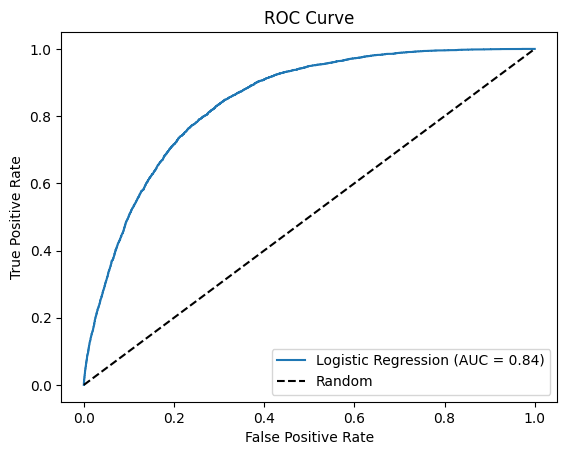

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = logreg.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Step 8: Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Downsampling non-diabetic

Downsampling the non-diabetic gave us better predictive abilities on the diabetics.

Previously, when training the model without downsampling, models tend to perform very well when predicting non-diabetics, but performed badly when predicting diabetics.

This can be seen through the low recall (0.18) and f1 scores (0.27) for predicting diabetic individuals using the logistic regression model.

Since we are more concerned with predicting who might be diabetic, we decided to downsample so that the model have access to equal number of rows of both classes.

In [ ]:
# downsampling non-diabetic
from sklearn.utils import resample

df_majority = binary_df[binary_df['diabetic_type'] == 0]
df_minority = binary_df[binary_df['diabetic_type'] == 1]

df_majority_downsampled = resample(df_majority,
                                    replace=False,    # sample without replacement
                                    n_samples=len(df_minority),  # to match minority class
                                    random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

print(df_balanced['diabetic_type'].value_counts())

diabetic_type
0    24018
1    24018
Name: count, dtype: int64


## Evaluation metrics used for evaluating classification models

1. Recall
  
    Measures the model's ability to correctly identify diabetic individuals

    Reduces cases where a diabetic person is misclassified as not diabetic

2. F1

    Balanced metric to minimize both false positives and false negatives

    Ensures that both recall and precision are considered

3. Area Under Receiving Operating Characteristic (AUROC)

    Measures how well a model can distinguish between classes

    High AUROC indicates that the model is able to separate both classes across various thresholds

## All features model training

In [ ]:
# using all variables for features
X = df_balanced.drop(["diabetic_type"], axis = 1)
y = df_balanced["diabetic_type"]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48036 entries, 49333 to 441451
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   _AGEG5YR  48036 non-null  float64
 1   SEX       48036 non-null  float64
 2   INCOME2   48036 non-null  float64
 3   _RACE     48036 non-null  float64
 4   ALCDAY5   48036 non-null  float64
 5   EXERANY2  48036 non-null  float64
 6   _BMI5     48036 non-null  float64
 7   _BMI5CAT  48036 non-null  float64
 8   CHCKIDNY  48036 non-null  float64
 9   GENHLTH   48036 non-null  float64
 10  BPHIGH4   48036 non-null  float64
 11  BLOODCHO  48036 non-null  float64
 12  CVDINFR4  48036 non-null  float64
 13  CVDCRHD4  48036 non-null  float64
 14  CVDSTRK3  48036 non-null  float64
 15  HAVARTH3  48036 non-null  float64
dtypes: float64(16)
memory usage: 6.2 MB


### Logistic Regression Model

#### K-Fold validation

We wanted to see whether performing K-Fold validation on the logistic regression model would give us better predictive abilities on the classes.

Using Area Under Receiving Operating Characteristic (AUROC) as evaluation metric

In [ ]:
# Log reg model with all features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=200000)

k = 5  # For 5-fold validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Evaluate the model
scores = cross_val_score(logreg, X, y, cv=kf,scoring='roc_auc')
print(f"RUC AOC scores: {scores}")
scores = cross_val_score(logreg, X, y, cv=kf,scoring='recall')
print(f"Recall scores: {scores}")
scores = cross_val_score(logreg, X, y, cv=kf,scoring='f1')
print(f"F1-scores: {scores}")

#### Normal model training

In [ ]:
# Log reg model with all features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=200000)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200000)

In [ ]:
from sklearn.metrics import roc_auc_score, recall_score, f1_score

# Predict on the test set
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_pred_prob)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results in the requested format
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Recall Score: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

ROC AUC Score: 0.85


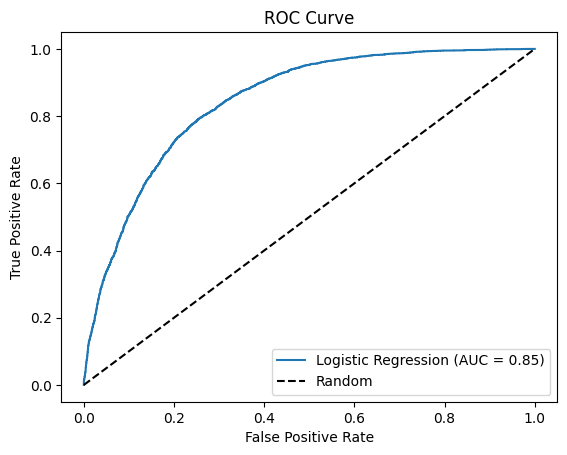

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = logreg.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Step 8: Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Since the ROC AUC and other evaluation metrics of K-Fold validation and Single-split are relatively similar, we have decided to use single-split as K-Fold validation is computationally more expensive

### Perceptron

In [ ]:
# Perceptron model with all features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

perceptron = Perceptron()

perceptron.fit(X_train, y_train)

Perceptron()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = perceptron.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7100333055786844
Confusion Matrix:
[[3517 1218]
 [1568 3305]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.72      4735
           1       0.73      0.68      0.70      4873

    accuracy                           0.71      9608
   macro avg       0.71      0.71      0.71      9608
weighted avg       0.71      0.71      0.71      9608



ROC AUC Score: 0.78


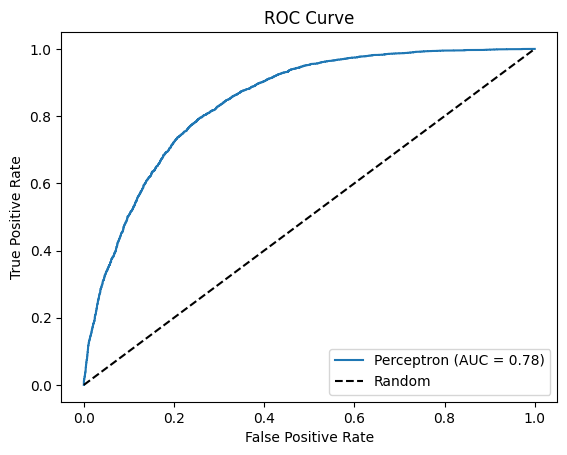

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_dec_func = perceptron.decision_function(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_dec_func)
roc_auc = roc_auc_score(y_test, y_dec_func)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Step 8: Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"Perceptron (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Naive Bayes

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = X.columns

# Increase figure size for larger plots
plt.figure(figsize=(20, 30))
for i, column in enumerate(columns):
    plt.subplot(4, 4, i + 1)  # Create a grid of 4x4 subplots
    sns.kdeplot(X[column], color='blue', fill=True, alpha=0.5)
    plt.title(f"Distribution of {column}", fontsize=16)  # Increase title font size
    plt.xlabel(column, fontsize=12)  # Increase x-axis label font size
    plt.ylabel("Density", fontsize=12)  # Increase y-axis label font size

plt.tight_layout()
plt.show()


Based on the distribution and nature of the variables (Discrete, Boolean, Continuous), the independent variables would be assigned to different Naive Bayes models

#### Gaussian Naive Bayes (Continuous variables)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Subset for Gaussian Naive Bayes
X_gaussian = X[['_AGEG5YR', '_BMI5']]

# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X_gaussian, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluate
y_pred = nb.predict(X_test)
print("Gaussian Naive Bayes Accuracy:", nb.score(X_test, y_test))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


GaussianNB()

#### BernoulliNB (Boolean variables)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Subset with binary features
X_bernoulli = X[['SEX', 'EXERANY2', 'CHCKIDNY', 'BLOODCHO', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'HAVARTH3']]

# Ensure binary features are encoded as 0 and 1
X_bernoulli = X_bernoulli.apply(lambda col: col.map({1: 0, 2: 1}) if col.nunique() == 2 else col)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_bernoulli, y, test_size=0.2, random_state=42)

# Train BernoulliNB
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = bernoulli_nb.predict(X_test)
print("Bernoulli Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


#### Multinomial Naive Bayes (Discrete categorical variables)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

# Subset for Multinomial Naive Bayes
X_multinomial = X[['_BMI5CAT', 'GENHLTH', 'INCOME2', '_RACE', 'BPHIGH4']]

# Encode categorical variables as integers
le = LabelEncoder()
for col in X_multinomial.columns:
    X_multinomial[col] = le.fit_transform(X_multinomial[col])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_multinomial, y, test_size=0.2, random_state=42)

# Train Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate
y_pred = nb.predict(X_test)
print("Multinomial Naive Bayes Accuracy:", nb.score(X_test, y_test))


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assume nb is your trained Multinomial Naive Bayes model and y_test is your target
# Get predicted probabilities for the positive class (class 1)
y_pred_prob = nb.predict_proba(X_test)[:, 1]  # Use the probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot the ROC Curve
plt.plot(fpr, tpr, label=f"MultinomialNB (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dtree = DecisionTreeClassifier(random_state=42)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = dtree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.6793297252289758
Confusion Matrix:
[[3228 1507]
 [1574 3299]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68      4735
           1       0.69      0.68      0.68      4873

    accuracy                           0.68      9608
   macro avg       0.68      0.68      0.68      9608
weighted avg       0.68      0.68      0.68      9608



ROC AUC Score: 0.68


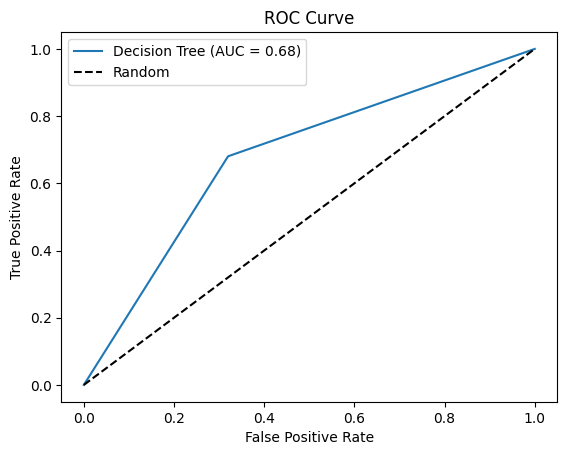

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = dtree.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Step 8: Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Support Vector Machine

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Determine the best kernel
param_grid = {'kernel': ['linear', 'rbf', 'poly'], 'C': [1], 'gamma': ['scale', 'auto']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Kernel:", grid_search.best_params_['kernel'])

In [ ]:
# Train using rbf kernel

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC(kernel='rbf', probability=True, random_state=42)

svm.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

ROC AUC Score: 0.84


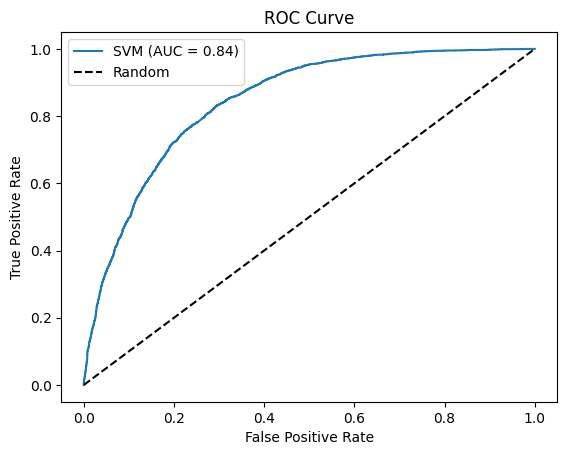

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

y_pred_prob = svm.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Step 8: Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### CatBoost

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.6 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

catboost = CatBoostClassifier(learning_rate = 0.1, random_state = 42, verbose = False)
catboost.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = catboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7666527893422148
Confusion Matrix:
[[3454 1281]
 [ 961 3912]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      4735
           1       0.75      0.80      0.78      4873

    accuracy                           0.77      9608
   macro avg       0.77      0.77      0.77      9608
weighted avg       0.77      0.77      0.77      9608



ROC AUC Score: 0.85


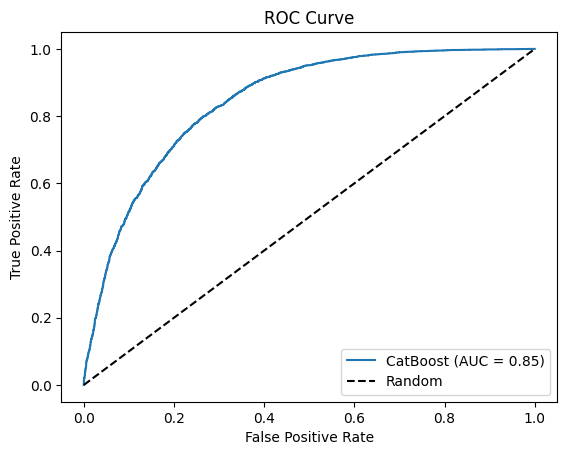

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

y_pred_prob = catboost.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Step 8: Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"CatBoost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### XGBoost

In [ ]:
pip install xgboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgb = XGBClassifier(learning_rate = 0.1, random_state = 42)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.769879267277269
Confusion Matrix:
[[3438 1297]
 [ 914 3959]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      4735
           1       0.75      0.81      0.78      4873

    accuracy                           0.77      9608
   macro avg       0.77      0.77      0.77      9608
weighted avg       0.77      0.77      0.77      9608



ROC AUC Score: 0.85


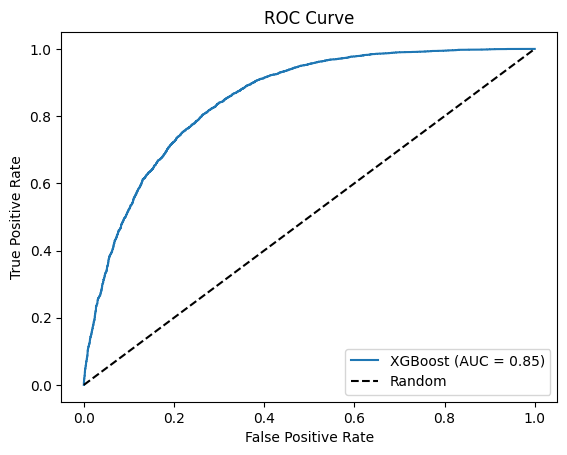

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

y_pred_prob = xgb.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Step 8: Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Importance of features in XGBoost

We then utilized the feature importance in XGBoost to gauge which features are more likely to hold greater importance when training a model.

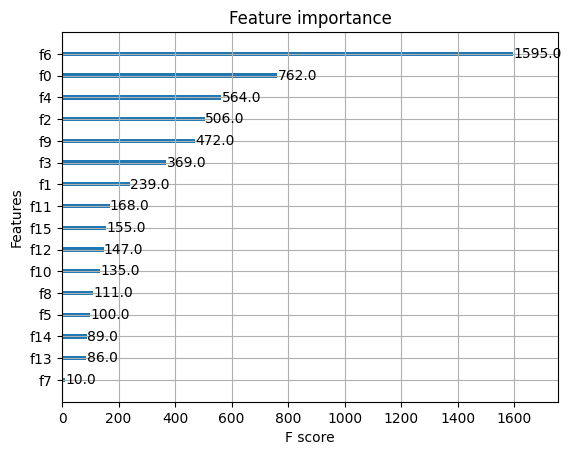

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plot_importance(xgb)
plt.show()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48036 entries, 49333 to 441451
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   _AGEG5YR  48036 non-null  float64
 1   SEX       48036 non-null  float64
 2   INCOME2   48036 non-null  float64
 3   _RACE     48036 non-null  float64
 4   ALCDAY5   48036 non-null  float64
 5   EXERANY2  48036 non-null  float64
 6   _BMI5     48036 non-null  float64
 7   _BMI5CAT  48036 non-null  float64
 8   CHCKIDNY  48036 non-null  float64
 9   GENHLTH   48036 non-null  float64
 10  BPHIGH4   48036 non-null  float64
 11  BLOODCHO  48036 non-null  float64
 12  CVDINFR4  48036 non-null  float64
 13  CVDCRHD4  48036 non-null  float64
 14  CVDSTRK3  48036 non-null  float64
 15  HAVARTH3  48036 non-null  float64
dtypes: float64(16)
memory usage: 6.2 MB


We decided to continue with Logistic Regression, Support Vector Machine, CatBoost and XGBoost to train on the 14 features that contribute the most to model training.

We chose these models as the have an AUROC > 0.83, a recall of > 0.80, and an f1-score > 0.76

## Using 13 features which are of the highest importance in XGBoost

These 13 features are chosen as they are the top 14 that contributes most to the XGBoost.

The other 3 were not chosen as they did not increase XGBoost model performance even after addition of the 3 features. Hence they were omitted.

**1. Demographic and Socioeconomic Factors**

_AGEG5YR: Age group in 5-year intervals

SEX: Respondent’s sex

INCOME2: Household income category

_RACE: Race/ethnicity categories

**2. Health-Related Factors**

GENHLTH: General health status reported by respondent

BPHIGH4: Ever told you had high blood pressure

BLOODCHO: Ever told you had high cholesterol

CVDINFR4: Ever had a heart attack

HAVARTH3: Ever told you had arthritis

CHCKIDNY: Ever told you had kidney disease

**3. Lifestyle and Behavioral Factors**

ALCDAY5: Frequency of alcohol consumption

EXERANY2: Engages in any physical activity or exercise

**4. Anthropometric Data**

_BMI5: Body mass index (BMI) calculated from weight and height

**Target Variable**

diabetic_type: Ever told you had diabetes

In [ ]:
# using only 13 features
X = df_balanced[["_BMI5", "_AGEG5YR", "ALCDAY5", "INCOME2", "GENHLTH", "_RACE", "SEX", "HAVARTH3", "BLOODCHO", "CVDINFR4", "EXERANY2", "CHCKIDNY", "BPHIGH4"]]
y = df_balanced["diabetic_type"]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48036 entries, 49333 to 441451
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   _BMI5     48036 non-null  float64
 1   _AGEG5YR  48036 non-null  float64
 2   ALCDAY5   48036 non-null  float64
 3   INCOME2   48036 non-null  float64
 4   GENHLTH   48036 non-null  float64
 5   _RACE     48036 non-null  float64
 6   SEX       48036 non-null  float64
 7   HAVARTH3  48036 non-null  float64
 8   BLOODCHO  48036 non-null  float64
 9   CVDINFR4  48036 non-null  float64
 10  EXERANY2  48036 non-null  float64
 11  CHCKIDNY  48036 non-null  float64
 12  BPHIGH4   48036 non-null  float64
dtypes: float64(13)
memory usage: 5.1 MB


### Logistic Regression

Checking Assumptions

In [ ]:
# (1) Autocorrelation of observations via ACF values

from statsmodels.tsa.stattools import acf
import pandas as pd

max_acf_values = {}

# Calculate and store the maximum autocorrelation value for each column
for col in X.columns:
    try:
        acf_values = acf(X[col], fft=False)
        max_acf_values[col] = max(acf_values[1:])  # Exclude lag 0 (self-correlation)
    except Exception as e:
        max_acf_values[col] = None  # Handle any errors gracefully

# Convert the results into a DataFrame for better visualization
acf_results_df = pd.DataFrame(list(max_acf_values.items()), columns=["Variable", "Max ACF Value"])

# Display the results
print(acf_results_df)


In [ ]:
# (2) Linearity of independent variables with log odds

from statsmodels.api import Logit
from statsmodels.tools import add_constant
import numpy as np

# Add a small constant to handle potential zero values
X_with_constant = add_constant(X)
X_log_transformed = X_with_constant.copy()

# Add interaction terms for Box-Tidwell test
for col in X.columns:
    X_log_transformed[f"log_{col}"] = np.log(X[col] + 1)  # Handle 0 by adding 1
    X_log_transformed[f"{col}_interaction"] = X[col] * X_log_transformed[f"log_{col}"]

# Fit a logistic regression model with interaction terms
logit_model = Logit(y, X_log_transformed).fit()

# Convert the summary to text
summary_text = logit_model.summary().as_text()
lines = summary_text.split('\n')

# Find where the header begins (look for the row containing "coef")
header_start = next(i for i, line in enumerate(lines) if "coef" in line)
headers = lines[header_start:header_start + 2]  # Extract the headers (usually 2 lines)
interaction_rows = [line for line in lines if '_interaction' in line]

# Combine headers and interaction rows
output = '\n'.join(headers + interaction_rows)
print(output)

Train model

In [ ]:
# Log reg model with 10 variables
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=200000)

# L2 regularization
# logreg = LogisticRegression(penalty='l2', C=0.5, max_iter=200000)

# L1 regularization
# logreg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

# Elastic Net regularization
# logreg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0)

logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200000)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7631140716069942
Confusion Matrix:
[[3522 1213]
 [1063 3810]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      4735
           1       0.76      0.78      0.77      4873

    accuracy                           0.76      9608
   macro avg       0.76      0.76      0.76      9608
weighted avg       0.76      0.76      0.76      9608



ROC AUC Score: 0.84


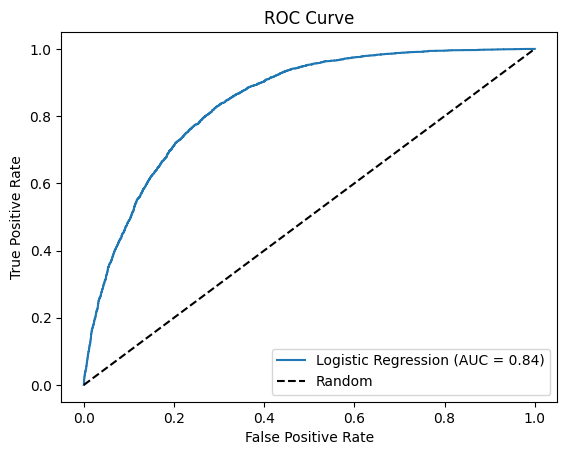

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

y_pred_prob = logreg.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Step 8: Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgb = XGBClassifier(learning_rate = 0.1, random_state = 42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_test_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7722731057452124
Confusion Matrix:
[[3461 1274]
 [ 914 3959]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      4735
           1       0.76      0.81      0.78      4873

    accuracy                           0.77      9608
   macro avg       0.77      0.77      0.77      9608
weighted avg       0.77      0.77      0.77      9608



ROC AUC Score: 0.85


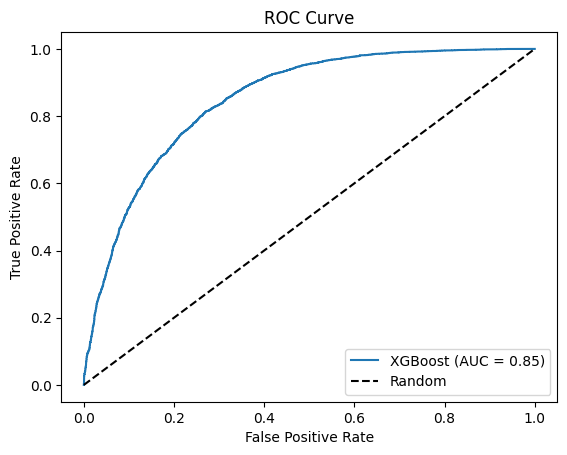

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_test_pred_prob = xgb.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_test_pred_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Step 8: Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### GridSearchCV for XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgb = XGBClassifier(learning_rate = 0.1, random_state = 42)

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.4f}")

# Make predictions with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Best Score: 0.8473
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      4735
           1       0.76      0.81      0.78      4873

    accuracy                           0.77      9608
   macro avg       0.77      0.77      0.77      9608
weighted avg       0.77      0.77      0.77      9608



### XGBoost using parameters from GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgb = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.1, max_depth = 3, n_estimators = 150, subsample = 0.8, random_state = 42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7712323064113239
Confusion Matrix:
[[3458 1277]
 [ 921 3952]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      4735
           1       0.76      0.81      0.78      4873

    accuracy                           0.77      9608
   macro avg       0.77      0.77      0.77      9608
weighted avg       0.77      0.77      0.77      9608



ROC AUC Score: 0.85


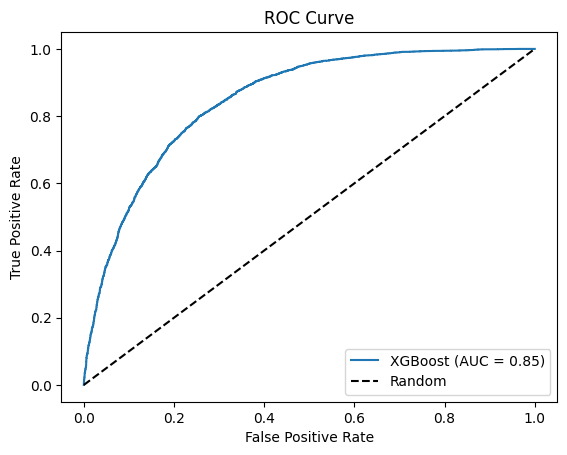

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = xgb.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Step 8: Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Support Vector Machine

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm = SVC(kernel='linear', probability=True, random_state=42)

svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7662364696086594
Confusion Matrix:
[[3390 1345]
 [ 901 3972]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      4735
           1       0.75      0.82      0.78      4873

    accuracy                           0.77      9608
   macro avg       0.77      0.77      0.77      9608
weighted avg       0.77      0.77      0.77      9608



ROC AUC Score: 0.84


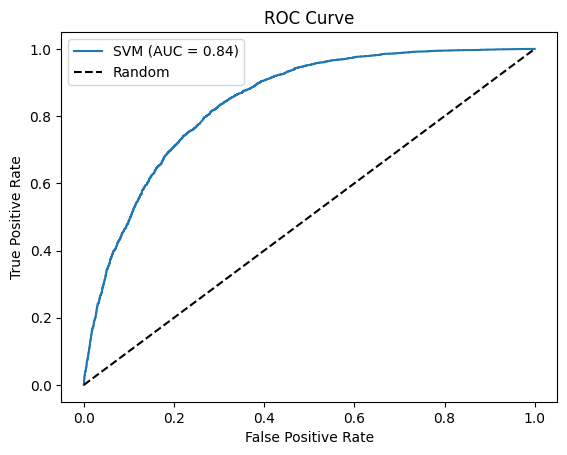

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

y_pred_prob = svm.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Step 8: Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"SVM (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### CatBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

catboost = CatBoostClassifier(learning_rate = 0.1, random_state = 42, verbose = False)
catboost.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = catboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.7661323896752706
Confusion Matrix:
[[3434 1301]
 [ 946 3927]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.73      0.75      4735
           1       0.75      0.81      0.78      4873

    accuracy                           0.77      9608
   macro avg       0.77      0.77      0.77      9608
weighted avg       0.77      0.77      0.77      9608



ROC AUC Score: 0.84


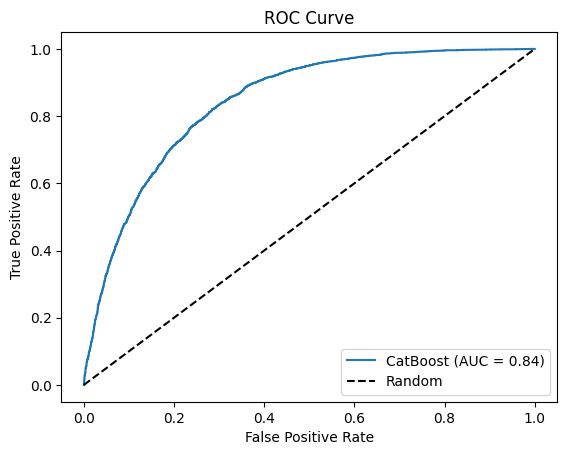

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

y_pred_prob = catboost.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Step 8: Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"CatBoost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Findings

### Final features chosen

**1. Demographic and Socioeconomic Factors**

_AGEG5YR: Age group in 5-year intervals

SEX: Respondent’s sex

INCOME2: Household income category

_RACE: Race/ethnicity categories

**2. Health-Related Factors**

GENHLTH: General health status reported by respondent

BPHIGH4: Ever told you had high blood pressure

BLOODCHO: Ever told you had high cholesterol

CVDINFR4: Ever had a heart attack

HAVARTH3: Ever told you had arthritis

CHCKIDNY: Ever told you had kidney disease

**3. Lifestyle and Behavioral Factors**

ALCDAY5: Frequency of alcohol consumption

EXERANY2: Engages in any physical activity or exercise

**4. Anthropometric Data**

_BMI5: Body mass index (BMI) calculated from weight and height

**Target Variable**

diabetic_type: Ever told you had diabetes

### Final model chosen

We have chosen XGBoost to predict our model's performance on 14 features

Parameters: learning_rate = 0.1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

xgb = XGBClassifier(learning_rate = 0.1, random_state = 42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.769150707743547
Confusion Matrix:
[[3442 1293]
 [ 925 3948]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      4735
           1       0.75      0.81      0.78      4873

    accuracy                           0.77      9608
   macro avg       0.77      0.77      0.77      9608
weighted avg       0.77      0.77      0.77      9608



ROC AUC Score: 0.85


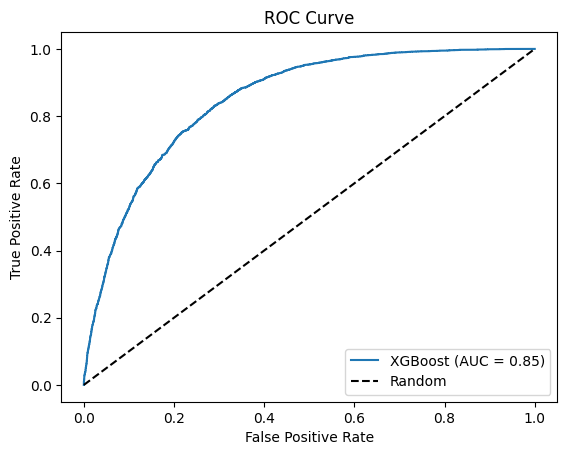

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = xgb.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Step 8: Plot the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()